# Прогнозная модель рисков беременных женщин

## Описание проекта

Проект для портфолио, показывающий на практике навыки EDA, построение и оценку моделей многоклассовой классификации, интерпретацию признаков, проверку гипотез и подготовку рекомендаций для врачей. Данные взяты с платформы Kaggle

Цель проекта — построить модель машинного обучения, определяющую уровень риска беременных женщин (RiskLevel) на основе физиологических (медицинских) показателей . Модель должна классифицировать каждую запись в один из трёх классов риска:
- low risk
- mid risk
- high risk

Проект демонстрирует навыки:
- загрузки и предобработки данных
- исследовательского анализа (EDA)
- построения и сравнения моделей классификации
- выбора метрик и интерпретации результатов
- визуализации и анализа ошибок модели

Особенность задачи: многоклассовая классификация (3 класса)
- классы могут быть несбалансированными.

__Метрика оценки:__ 
- Рекомендую использовать macro F1-score как основную метрику выбора лучшей модели, так как:
  - Важно хорошо предсказывать все три класса риска
  - Классы могут быть несбалансированы
  - F1 учитывает как точность, так и полноту
- Также акцент будет сделан на полноту (Recall) для класса "высокий риск", так как с практической точки зрения не пропустить опасный случай критически важнее, чем ложное предупреждение
  - Критическая проверка: Recall для high risk > 0.8
- Дополнительно:  матрица ошибок (Confusion Matrix), Precision, ROC-AUC (OvR)

Практическая ценность модели: 
- автоматическая предварительная оценка и сортировка по группам риска.
- поддержка врачебных решений: выделение ключевых факторов риска для каждого случая.
- профилактика: раннее выявление пациенток в группе высокого риска для назначения дополнительных обследований.
- ресурсное планирование: помощь в оптимизации нагрузки на медицинский персонал.

## Описание данных

Датасет «Maternal Health Risk Data» взят с платформы Kaggle: https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data

Данные были собраны в различных больницах, районных поликлиниках и центрах охраны материнства с помощью системы мониторинга рисков 

Датасет содержит физиологические показатели беременных женщин и целевую переменную — уровень риска.

__Признаки:__
- Age: возраст женщины в годах на момент беременности
- SystolicBP: верхнее значение артериального давления в мм рт. ст., важный показатель во время беременности.
- DiastolicBP: нижнее значение артериального давления в мм рт. ст., также значимый показатель в период беременности.
- BS: концентрация глюкозы в крови в миллимолях на литр (ммоль/л)
- BodyTemp: Температура тела, скорее всего в °F
- HeartRate: нормальная частота сердцебиения (пульс) в состоянии покоя (ударов в минуту).
- RiskLevel: Целевая переменная: low / mid / high risk -прогнозируемая степень риска во время беременности с учётом перечисленных выше показателей.

## Цели исследования

Постановка задачи и бизнес‑контекст
- Цель: построить модель, предсказывающую уровень риска беременности (RiskLevel) на основе физиологических показателей.
- Тип задачи: многоклассовая классификация (low / mid / high risk).
- Формат сдачи: Google Colab + выводы + матрицы ошибок на train и test.
- Метрика: выбираю F1‑macro(равномерно учитывает все классы) + Confusion Matrix (так как классы могут быть несбалансированы, а важно одинаково хорошо предсказывать все уровни риска).
- Дополнительные метрики: ROC-AUC (One-vs-Rest), Precision и Recall (по классам, особенно для high risk).
- Выявление ключевых факторов риска.
- Сформировать выводы и рекомендации
  - Какие показатели сильнее всего влияют на риск.
  - Какие пороговые значения наиболее опасны.
  - Как модель может использоваться в медицинской практике.

## Ход исследования

__Шаг 1. Загрузка данных:__
- Загрузка датасета через gdown или Google Drive.
- Первичный просмотр структуры данных (head, info, shape).
- Проверка типов данных.
- Вывод первых, случайных и последних строк.

__Шаг 2. Предобработка данных:__
- Приведение названий столбцов к единому стилю (snake_case)
- Уникальные значения категориальных признаков
- Проверка пропусков
- Проверка дубликатов
- Кодирование категориальной целевой переменной:
  - low risk → 0
  - mid risk → 1
  - high risk → 2
- Создание новых признаков (Feature Engineering ):
  - Аномальный пульс (норма: 60-100 уд/мин)
  - Медицинский индекс: MAP (Mean Arterial Pressure) = DiastolicBP + (SystolicBP - DiastolicBP)/3.
  - Пульсовое давление: PulsePressure = SystolicBP - DiastolicBP.
  - Категории давления: 'Normal','Elevated','Stage1_Hypertension','Stage2_Hypertension'
  - Отклонение температуры от нормы (98.6°F): TempDeviation = abs(BodyTemp - 98.6)
  - Категоризация возраста: age_group (например, '<20', '20-30', '30-40', '40-50', '50+').
  - Отношение глюкозы к возрасту
  - Гипергликемия (BS > 7.0 mmol/L натощак)

__Шаг 3. Исследовательский анализ данных (EDA):__
- Анализ целевой переменной
  - Распределение классов RiskLevel.
  - Проверка баланса классов
- Анализ количественных признаков
  - Гистограммы.
  - Boxplots.
  - Анализ выборосов на основе нормальных диапазонов из медицинских знаний
    - SystolicBP: норма 90-120, >140 гипертензия
    - DiastolicBP: норма 60-80, >90 гипертензия
    - BS: норма 3.9-7.8 ммоль/л
    - HeartRate: норма 60-100 уд/мин
    - BodyTemp: норма 97-99°F
- Анализ категориальных признаков
- Корреляционный анализ
  - Heatmap для числовых признаков.
  - Проверка на мультиколлинеарность
- Попарные графики (pairplot) для признаков
- Анализ признаков по классам риска
  - Средние значения показателей для каждого уровня риска
  - Сравнение low / mid / high risk
- Выявление ключевых паттернов
   - Какие показатели чаще встречаются у high risk.
   - Какие комбинации признаков наиболее опасны.

__Шаг 4. Проверка статистических гипотез__:
- H1: Средние значения признаков отличаются между группами
  - Тест: ANOVA или Краскел-Уоллис
- H2: Распределение артериального давления отличается между high risk и low risk
  - Тест: Манн-Уитни U-тест
- H3: Пациентки с high risk имеют более высокое давление, чем остальные
  - Тест: Односторонний t-test или Манн-Уитни
- H4: Уровень риска не зависит от возрастной группы
  - Тест: Хи-квадрат (χ²)
- H5: Комбинация высокого давления и высокой глюкозы увеличивает риск сильнее, чем каждый фактор по отдельности 
  - Тест: Хи-квадрат для взаимодействия факторов

__Шаг 5. Подготовка данных к моделированию__:
- Выбо признаков для моделирования
- Разделение данных на признаки и целевую переменную
- Разделение на train/test
  - Стратификация (stratify=y) критически важна
- Масштабирование признаков
  - StandardScaler для числовых признаков
  - Кодирование категориальных признаков

__Шаг 6. Обучение моделей__
- Модели
  - Если классы несбалансированы: использовать class_weight="balanced"
  - Базовая модель: DummyClassifier (стратегия: most_frequent)
  - Линейные модели: Logistic Regression (multinomial)
  - Decision Tree
  - Ансамбли: RandomForest, XGBoost / LightGBM / CatBoost
- Подбор гиперпараметров
  - GridSearchCV с 5-кратной стратифицированной кросс-валидацией (StratifiedKFold).
  - Основная метрика: F1-macro.
  - Если несколько моделей имеют близкие F1-macro, предпочтение отдается модели с более высоким Recall для класса 'high risk'."
- Выбор лучшей модели на кросс-валидации
  - Сравнение по F1-macro,Recall. Дополнительно Precision и ROC-AUC (OvR)
    - Фокус на Recall для класса high risk (важно не пропустить опасный случай)
- Проверка устойчивости модели
  - Построение Learning Curve (кривой обучения) на основе кросс-валидации

__Шаг 7. Оценка модели__
- Оценка лучшей модели на тестовой выборке:
  - Использовать лучшую модель (обученную на всем трейне) для предсказания на X_test.
  - Рассчитать все метрики на тесте и сравнить с результатами на кросс-валидации (проверка переобучения)
  - Построение и визуализация матрицы ошибок (Confusion Matrix) для теста: confusion_matrix(y_test, y_pred_test)
  - ROC-AUC для multiclass (One-vs-Rest)
- Анализ ошибок модели
  - Количество и процент ошибочных предсказаний
  - Типы ошибок (какие классы путаются чаще)
  - Критические ошибки: high risk → low risk
- Интерпретация
  - Feature importance 
  - Какие признаки сильнее всего влияют на риск.  
  - Какие признаки характерны для low risk

__Шаг 8. Выводы и рекомендации__
- Аналитические инсайты
  - Ключевые факторы риска
  - Критические пороги
  - Какие комбинации факторов усиливают риск.
  - Профили риска
- Рекомендации для врачей / системы мониторинга
- Ограничения исследования
- Дальнейшие улучшения
- На тренировочной выборке для лучшей модели
  - Метрики
  - Classification report.
  - Матрица ошибок Confusion matrix.
- На тестовой выборке для лучшей модели
  - Метрики
  - Classification report.
  - Матрица ошибок Confusion matrix.

## Ожидаемые результаты

- Полностью очищенный и подготовленный датасет.
- Наглядный EDA с графиками распределений, корреляциями и анализом выбросов.
- Сравнение нескольких моделей классификации.
- Выбор лучшей модели по метрике F1-macro.
- Матрицы ошибок на train и test (обязательное требование).
- Интерпретация важности признаков.
- Аналитические выводы о факторах риска беременности.
- Готовый Google Colab со структурой и выводами.

## Содержание:
* [Шаг 1. Загрузка данных](#ch1)
* [Шаг 2. Предобработка данных](#ch2)
* [Шаг 3. Исследовательский анализ данных (EDA)](#ch3)
* [Шаг 4. Проверка статистических гипотез](#ch4)
* [Шаг 5. Подготовка данных к моделированию](#ch5)
* [Шаг 6. Обучение моделей](#ch6)
* [Шаг 7. Оценка модели](#ch7)
* [Шаг 8. Выводы и рекомендации](#ch8)

## Выполнение проекта

Технический стек
- проект написан на Python с использованием следующих библиотек:

In [1]:
# Установка библиотек
!pip install gdown -q


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 📁 Работа с файлами и API
import os, zipfile, requests, re
from kaggle.api.kaggle_api_extended import KaggleApi
from charset_normalizer import from_path

# 📁 Работа с файлами и API
import gdown

# 📊 Базовые библиотеки анализа данных
import pandas as pd
import numpy as np
import re

# 📈 Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# 🔍 Корреляционный анализ
from phik import phik_matrix

# 🧪 Статистика
import time
from scipy.stats import kruskal, mannwhitneyu
import scipy.stats as stats

# 🤖 Машинное обучение
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score,KFold,RandomizedSearchCV,StratifiedKFold,learning_curve
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.utils.class_weight import compute_sample_weight

# 📏 Метрики качества
from sklearn.metrics import (
    recall_score, precision_score, f1_score, accuracy_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc,
    precision_recall_curve, roc_auc_score, average_precision_score,
    precision_score, recall_score,
    fbeta_score, make_scorer
)


import warnings
warnings.filterwarnings('ignore')

## Шаг 1: Загрузка данных <a class="anchor" id="ch1"></a>

In [3]:
# 🔍 Определение кодировки файла
def detect_encoding(file_path):
    result = from_path(file_path).best()
    if result is None:
        print("⚠️ Кодировка не определена, используем utf-8 по умолчанию.")
        return "utf-8"
    print(f"🔍 Определена кодировка: {result.encoding}")
    return result.encoding

# 📂 Загрузка и первичный анализ CSV-файла
def process_dataframe(file_name, data_dir="datasets", sep=",", decimal="."):
    local_path = os.path.join(data_dir, file_name)   # путь к локальному файлу
    url_path = f'https://code.net/datasets/{file_name}'  # пример URL для загрузки

    if os.path.exists(local_path):
        print("📂 Загружаем локальный файл...")
        encoding = detect_encoding(local_path)  # определяем кодировку
        print("📁 Абсолютный путь к файлу:", os.path.abspath(local_path))
        df = pd.read_csv(local_path, sep=sep, decimal=decimal, encoding=encoding)
    else:
        print("🌐 Локальный файл не найден, проверяем URL...")
        response = requests.get(url_path)
        if response.status_code == 200:
            print("✅ Файл найден по URL, загружаем...")
            df = pd.read_csv(url_path, sep=sep, decimal=decimal, encoding="utf-8")
        else:
            print("❌ Ошибка: файл не найден ни локально, ни по URL.")
            return None

    # 📊 Первичный анализ датафрейма
    print("\n🔎 Первые 5 строк датафрейма:")
    display(df.head())
    print("\n🎲 Любые 5 строк датафрейма:")
    display(df.sample(5))
    print("\n📉 Последние 5 строк датафрейма:")
    display(df.tail())

    print("\n🧠 Информация о датафрейме:")
    df.info()
    print("\n📐 Размер датафрейма:")
    print(df.shape)
    print("\n🏷️ Названия столбцов:")
    print(df.columns)

    return df

# 📥 Скачивание и обработка датасета с Kaggle
def fetch_and_process_kaggle_dataset(dataset_slug, target_csv_name, data_dir="datasets"):
    os.makedirs(data_dir, exist_ok=True)  # создаём папку для датасетов, если её нет

    # 🔑 Инициализация Kaggle API
    api = KaggleApi()
    api.authenticate()

    print("📥 Скачиваем архив с Kaggle...")
    api.dataset_download_files(dataset_slug, path=data_dir, unzip=False)

    # 🔍 Поиск zip-файла в папке
    zip_files = [f for f in os.listdir(data_dir) if f.endswith(".zip")]
    if not zip_files:
        print("❌ Архив не найден.")
        return None

    zip_path = os.path.join(data_dir, zip_files[0])

    print("📦 Распаковываем архив...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_dir)

    # 🔍 Проверка наличия нужного CSV
    target_path = os.path.join(data_dir, target_csv_name)
    if not os.path.exists(target_path):
        print(f"❌ CSV-файл '{target_csv_name}' не найден после распаковки.")
        return None

    # 📊 Загружаем и анализируем CSV
    return process_dataframe(target_csv_name, data_dir=data_dir)

In [4]:
df = fetch_and_process_kaggle_dataset(
    dataset_slug="csafrit2/maternal-health-risk-data",
    target_csv_name="Maternal Health Risk Data Set.csv",
    data_dir=r"C:\Users\HP\my_data\kaggle_datasets\05_Kaggle_maternal_health"
)

📥 Скачиваем архив с Kaggle...
Dataset URL: https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data
📦 Распаковываем архив...
📂 Загружаем локальный файл...
🔍 Определена кодировка: utf_8
📁 Абсолютный путь к файлу: C:\Users\HP\my_data\kaggle_datasets\05_Kaggle_maternal_health\Maternal Health Risk Data Set.csv

🔎 Первые 5 строк датафрейма:


Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


🎲 Любые 5 строк датафрейма:


Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
368   54         140          100  15.0      98.0         66  high risk
208   25         120           80   7.0      98.0         66   low risk
26    19         120           75   7.2      98.0         66   low risk
776   50         120           80   7.8      98.0         70   mid risk
657   27         140           90  15.0      98.0         90  high risk


📉 Последние 5 строк датафрейма:


Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk


🧠 Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB

📐 Размер датафрейма:
(1014, 7)

🏷️ Названия столбцов:
Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')


In [5]:
df['BodyTemp'].describe()

count    1014.000000
mean       98.665089
std         1.371384
min        98.000000
25%        98.000000
50%        98.000000
75%        98.000000
max       103.000000
Name: BodyTemp, dtype: float64

температура скорее всего представлена в градусах Фаренгейта
- Медицинская практика: В американских больницах, историях болезней и медкартах нормальная температура тела указывается как 98.6°F.

Особенности данных:
- Датасет небольшой (≈1000 строк), что требует аккуратной валидации.
- Признаки числовые (int64, float64), что упрощает предобработку.
- Целевая переменная категориальная(object), вероятно несбалансированная.
- Возможны выбросы (особенно в BP, BS, HeartRate).

---

__Выводы по Шагу 1:__
- Датасет успешно загружен
  - Размер данных: 1014 строк × 7 столбцов — компактный  небольшой медицинский датасет, требующий строгой кросс‑валидации.
  - 6 числовых признаков и 1 категориальный целевой признак (RiskLevel)
- Пропусков нет
- Все признаки загружены без ошибок: int64, float64, object
- Первичный осмотр данных показал корректность значений признаков
  - Температура указана в градусах Фаренгейта
  - Целевая переменная содержит три класса: low risk, mid risk, high risk
  
Данные готовы к дальнейшей предобработке

## Шаг 2. Предобработка данных <a class="anchor" id="ch2"></a>

In [6]:
# Сохраняем копию для возможного возврата
df_original = df.copy()

### Приведение названий столбцов к единому стилю

In [7]:
def to_snake(name: str) -> str:
    # убираем пробелы по краям и заменяем пробелы внутри на "_"
    name = re.sub(r'\s+', '_', name.strip())
    # добавляем "_" перед группой заглавных букв, если перед ними малая буква или цифра
    name = re.sub(r'(?<=[a-z0-9])([A-Z]+)', r'_\1', name)
    return name.lower()

df.columns = [to_snake(col) for col in df.columns]

In [8]:
df.columns

Index(['age', 'systolic_bp', 'diastolic_bp', 'bs', 'body_temp', 'heart_rate',
       'risk_level'],
      dtype='object')

In [9]:
df_original.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

названия столбцоы приведены к snake_case

### Уникальные значения категориальных признаков

In [10]:
temp = df.copy()

list_c = temp.select_dtypes(include=['object']).columns
print(temp[list_c].info())

for col_l in list_c:
    print('-' * 25)
    print(col_l, temp[col_l].sort_values().unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   risk_level  1014 non-null   object
dtypes: object(1)
memory usage: 8.0+ KB
None
-------------------------
risk_level ['high risk' 'low risk' 'mid risk']


- Подтверждено 3 класса: high risk, low risk, mid risk

### Проверка пропусков

In [11]:
def analyze_missing_values(df):
    temp = df.copy()  # 📋 Создаем копию входного DataFrame
    missing = pd.DataFrame({
        'n_missing': temp.isnull().sum(),
        'missing_share': temp.isnull().mean().round(4)
    })
    # 📊 Сортируем столбцы по количеству пропусков (по убыванию)
    missing = missing.sort_values(by='n_missing', ascending=False)
    
    # 🎨 Визуализация пропусков
    return missing.style.background_gradient(cmap='coolwarm')

In [12]:
analyze_missing_values(df)

- Подтверждено: пропусков нет

### Проверка дубликатов

In [13]:
# Проверяем дубликаты по всем столбцам
n_duplicates_full = df.duplicated().sum()
print(f"Дубликаты по ВСЕМ столбцам (включая risk_level): {n_duplicates_full}")

Дубликаты по ВСЕМ столбцам (включая risk_level): 562


In [14]:
# Проверяем дубликаты только по признакам (без целевой)
feature_cols = df.columns.drop(['risk_level'])
n_duplicates_features = df.duplicated(subset=feature_cols).sum()
print(f"Дубликаты по ПРИЗНАКАМ (без risk_level): {n_duplicates_features}")

Дубликаты по ПРИЗНАКАМ (без risk_level): 598


In [15]:
# Уникальные комбинации признаков
n_unique_rows = df.drop_duplicates(subset=feature_cols).shape[0]
print(f"\nУникальных комбинаций признаков: {n_unique_rows}")
print(f"Всего строк: {df.shape[0]}")
print(f"Доля уникальных: {n_unique_rows / df.shape[0]:.1%}")
print(f"Доля дубликатов: {(df.shape[0] - n_unique_rows) / df.shape[0]:.1%}")


Уникальных комбинаций признаков: 416
Всего строк: 1014
Доля уникальных: 41.0%
Доля дубликатов: 59.0%


In [16]:
# Примеры дубликатов
if n_duplicates_features > 0:
    print(f"\n📋 Примеры дубликатов (первые 6 строк):")
    dup_examples = df[df.duplicated(subset=feature_cols, keep=False)].sort_values(
        by=feature_cols.tolist()
    ).head(6)
    print(dup_examples[['age', 'systolic_bp', 'diastolic_bp', 'bs', 
                         'body_temp', 'heart_rate', 'risk_level']])


📋 Примеры дубликатов (первые 6 строк):
     age  systolic_bp  diastolic_bp   bs  body_temp  heart_rate risk_level
670   10          100            50  6.0       99.0          70   mid risk
849   10          100            50  6.0       99.0          70   mid risk
552   12           90            60  7.5      102.0          60   low risk
940   12           90            60  7.5      102.0          60   low risk
543   12           90            60  7.5      102.0          66   low risk
588   12           90            60  7.5      102.0          66   mid risk


In [17]:
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())

age  systolic_bp  diastolic_bp    bs  body_temp  heart_rate risk_level
670   10          100            50   6.0       99.0          70   mid risk
849   10          100            50   6.0       99.0          70   mid risk
552   12           90            60   7.5      102.0          60   low risk
940   12           90            60   7.5      102.0          60   low risk
543   12           90            60   7.5      102.0          66   low risk
..   ...          ...           ...   ...        ...         ...        ...
553   60          120            85  15.0       98.0          60   mid risk
772   60          120            85  15.0       98.0          60   mid risk
818   60          120            85  15.0       98.0          60   mid risk
114   63          140            90  15.0       98.0          90  high risk
502   63          140            90  15.0       98.0          90  high risk

[866 rows x 7 columns]

→ 562 явных дубликатов

Поскольку у нас нет колонки с дополнительной информацией об пациентке, будь то ФИО, номер телефона или емэйл, то для данной задачи возможно эти строки не являются дубликатами. Также датасет синтетический, что норма для Kaggle. Конечно вероятность, что две различные пациентки имеют абсолютно одинаоквые 6 показателей, крайне мала, а точне нулевая. 

ТО есть это либо технические дубликаты, либо ошибки в данных
- Для ML-задачи важнее иметь уникальные примеры


__Как дубликаты влияют на модель:__
- Переобучение (Overfitting)
  - Модель будет "запоминать" повторяющиеся паттерны
  - Одни и те же примеры могут попасть и в train, и в test → утечка данных
- Искажение метрик:
- Смещение важности признаков:
  - Признаки, характерные для дублирующихся записей, получат завышенную важность
- Проблема с train/test split:
  - Если одинаковые записи попадут в обе выборки → data leakage

Как вариант можно и ID добавить (или какой-то еще признак) , но он абсолютно не информативен для модели (а остальные признаки будут являться неявными дубликатами) и придется его исключать перед обучением

In [18]:
# Баланс классов ДО удаления
print("📊 БАЛАНС КЛАССОВ ДО УДАЛЕНИЯ ДУБЛИКАТОВ")
class_dist_before = df['risk_level'].value_counts(normalize=True) * 100
print(class_dist_before.round(1))

📊 БАЛАНС КЛАССОВ ДО УДАЛЕНИЯ ДУБЛИКАТОВ
low risk     40.0
mid risk     33.1
high risk    26.8
Name: risk_level, dtype: float64


Вывод: Дубликаты неравномерно распределены по классам
- У low risk больше повторений

In [19]:
df_before_dd = df.shape[0]
df = df.drop_duplicates(subset=feature_cols).reset_index(drop=True)
df_after_dd = df.shape[0]
n_removed = df_before_dd - df_after_dd

print(f"✅ Дубликаты удалены")
print(f"   Было строк: {df_before_dd}")
print(f"   Осталось строк: {df_after_dd}")
print(f"   Удалено: {n_removed} ({n_removed/df_before_dd*100:.1f}%)")

✅ Дубликаты удалены
   Было строк: 1014
   Осталось строк: 416
   Удалено: 598 (59.0%)


In [20]:
# Баланс классов ПОСЛЕ удаления
print("📊 БАЛАНС КЛАССОВ ПОСЛЕ УДАЛЕНИЯ ДУБЛИКАТОВ")
class_dist_after = df['risk_level'].value_counts(normalize=True) * 100
print(class_dist_after.round(1))

📊 БАЛАНС КЛАССОВ ПОСЛЕ УДАЛЕНИЯ ДУБЛИКАТОВ
low risk     53.4
high risk    25.0
mid risk     21.6
Name: risk_level, dtype: float64


In [21]:
# Анализ изменения баланса
print("📈 ИЗМЕНЕНИЕ БАЛАНСА КЛАССОВ")
comparison = pd.DataFrame({
    'До (%)': class_dist_before,
    'После (%)': class_dist_after,
    'Изменение': class_dist_after - class_dist_before
}).round(1)
print(comparison)

📈 ИЗМЕНЕНИЕ БАЛАНСА КЛАССОВ
           До (%)  После (%)  Изменение
high risk    26.8       25.0       -1.8
low risk     40.0       53.4       13.3
mid risk     33.1       21.6      -11.5


### Кодирование категориальной целевой переменной

In [22]:
mapping = {
    'low risk': 0,
    'mid risk': 1,
    'high risk': 2
}

df['target'] = df['risk_level'].map(mapping)

In [23]:
df[['risk_level', 'target']].drop_duplicates()

risk_level  target
0  high risk       2
4   low risk       0
6   mid risk       1

### Создание новых признаков (Feature Engineering 

- Аномальный пульс (норма 60–100) - бинарный признак аномального пульса

In [24]:
df['abnormal_pulse'] = ((df['heart_rate'] < 60) | (df['heart_rate'] > 100)).astype(int)

- MAP (Mean Arterial Pressure) -  среднее артериальное давление 

$$
MAP = \text{diastolic_bp} + \frac{\text{systolic_bp} - \text{diastolic_bp}}{3}
$$

In [25]:
df['map'] = round(
    df['diastolic_bp'] + (df['systolic_bp'] - df['diastolic_bp']) / 3,
    2
)

- Pulse Pressure -  пульсовое давление

$$
\text{pulse_pressure} = \text{systolic_bp} - \text{diastolic_bp}
$$

In [26]:
df['pulse_pressure'] = df['systolic_bp'] - df['diastolic_bp']

- Категории давления (AHA classification) - 4 уровня

In [27]:
def bp_category(row):
    sbp = row['systolic_bp']
    dbp = row['diastolic_bp']
    
    if sbp < 120 and dbp < 80:
        return 'Normal'
    elif 120 <= sbp < 130 and dbp < 80:
        return 'Elevated'
    elif (130 <= sbp < 140) or (80 <= dbp < 90):
        return 'Stage1_Hypertension'
    else:
        return 'Stage2_Hypertension'

df['bp_category'] = df.apply(bp_category, axis=1)

- Отклонение температуры от нормы (98.6°F)

In [28]:
df['temp_deviation'] = abs(df['body_temp'] - 98.6)

- Категоризация возраста (5 категорий)

In [29]:
def age_group(age):
    if age < 20:
        return '<20'
    elif 20 <= age < 30:
        return '20-30'
    elif 30 <= age < 40:
        return '30-40'
    elif 40 <= age < 50:
        return '40-50'
    else:
        return '50+'

df['age_group'] = df['age'].apply(age_group)

- Отношение глюкозы к возрасту

In [30]:
df['bs_to_age'] = round(
    df['bs'] / df['age'],
    3
)

- Гипергликемия (BS > 7.0 ммоль/л) - бинарный признак гипергликемии

In [31]:
df['hyperglycemia'] = (df['bs'] > 7.0).astype(int)

In [32]:
temp = df.copy()

list_c = temp.select_dtypes(include=['object']).columns
print(temp[list_c].info())

for col_l in list_c:
    print('-' * 25)
    print(col_l, temp[col_l].sort_values().unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   risk_level   416 non-null    object
 1   bp_category  416 non-null    object
 2   age_group    416 non-null    object
dtypes: object(3)
memory usage: 9.9+ KB
None
-------------------------
risk_level ['high risk' 'low risk' 'mid risk']
-------------------------
bp_category ['Elevated' 'Normal' 'Stage1_Hypertension' 'Stage2_Hypertension']
-------------------------
age_group ['20-30' '30-40' '40-50' '50+' '<20']


**Медицинская обоснованность:**
- ✅ **MAP** —  стандарт оценки перфузии органов
- ✅ **Pulse Pressure** — индикатор артериальной жесткости
- ✅ **bp_category** — классификация AHA (American Heart Association)
- ✅ **hyperglycemia** — критический порог диабета

Все признаки имеют клиническое значение

### Проверка перед EDA

In [33]:
analyze_missing_values(df)

In [34]:
# Проверяем дубликаты по всем столбцам
n_duplicates_full = df.duplicated().sum()
print(f"Дубликаты по ВСЕМ столбцам (включая risk_level): {n_duplicates_full}")

Дубликаты по ВСЕМ столбцам (включая risk_level): 0


In [35]:
cols = df.columns.tolist()
cols_reordered = [c for c in cols if c not in ['target', 'risk_level']] + ['target', 'risk_level']
df = df[cols_reordered]

In [36]:
print("Размер орининального датасета:", df_original.shape)

Размер орининального датасета: (1014, 7)


In [37]:
print("Размер датасета после предобработки:", df.shape)

Размер датасета после предобработки: (416, 16)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             416 non-null    int64  
 1   systolic_bp     416 non-null    int64  
 2   diastolic_bp    416 non-null    int64  
 3   bs              416 non-null    float64
 4   body_temp       416 non-null    float64
 5   heart_rate      416 non-null    int64  
 6   abnormal_pulse  416 non-null    int32  
 7   map             416 non-null    float64
 8   pulse_pressure  416 non-null    int64  
 9   bp_category     416 non-null    object 
 10  temp_deviation  416 non-null    float64
 11  age_group       416 non-null    object 
 12  bs_to_age       416 non-null    float64
 13  hyperglycemia   416 non-null    int32  
 14  target          416 non-null    int64  
 15  risk_level      416 non-null    object 
dtypes: float64(5), int32(2), int64(6), object(3)
memory usage: 48.9+ KB


In [39]:
df.iloc[:, list(range(9)) + [-1]]

age  systolic_bp  diastolic_bp    bs  body_temp  heart_rate  \
0     25          130            80  15.0       98.0          86   
1     35          140            90  13.0       98.0          70   
2     29           90            70   8.0      100.0          80   
3     30          140            85   7.0       98.0          70   
4     35          120            60   6.1       98.0          76   
..   ...          ...           ...   ...        ...         ...   
411   12          100            50   6.4       98.0          70   
412   15          100            60   6.0       98.0          80   
413   15          100            49   7.6       98.0          77   
414   12          100            50   6.0       98.0          70   
415   21          100            50   6.8       98.0          60   

     abnormal_pulse     map  pulse_pressure risk_level  
0                 0   96.67              50  high risk  
1                 0  106.67              50  high risk  
2                 0   76.67              20  high risk  
3                 0  103.33              55  high risk  
4                 0   80.00              60   low risk  
..              ...     ...             ...        ...  
411               0   66.67              50   mid risk  
412               0   73.33              40   low risk  
413               0   66.00              51   low risk  
414               0   66.67              50   mid risk  
415               0   66.67              50   low risk  

[416 rows x 10 columns]

In [40]:
df.iloc[:, list(range(9, df.shape[1]))]

bp_category  temp_deviation age_group  bs_to_age  hyperglycemia  \
0    Stage1_Hypertension             0.6     20-30      0.600              1   
1    Stage2_Hypertension             0.6     30-40      0.371              1   
2                 Normal             1.4     20-30      0.276              1   
3    Stage1_Hypertension             0.6     30-40      0.233              0   
4               Elevated             0.6     30-40      0.174              0   
..                   ...             ...       ...        ...            ...   
411               Normal             0.6       <20      0.533              0   
412               Normal             0.6       <20      0.400              0   
413               Normal             0.6       <20      0.507              1   
414               Normal             0.6       <20      0.500              0   
415               Normal             0.6     20-30      0.324              0   

     target risk_level  
0         2  high risk  
1         2  high risk  
2         2  high risk  
3         2  high risk  
4         0   low risk  
..      ...        ...  
411       1   mid risk  
412       0   low risk  
413       0   low risk  
414       1   mid risk  
415       0   low risk  

[416 rows x 7 columns]

In [41]:
# сохранил очищенный датасет перед EDA
df_clean = df.copy()

---

__Выводы по Шагу 2__

Предобработка данных была выполнена полностью и привела датасет к чистому, структурированному и расширенному виду, готовому для дальнейшего анализа и моделирования.

1. Приведение структуры данных к единому формату
   - Названия всех столбцов преобразованы в стиль snake_case
   - Типы данных корректны, категориальные признаки определены верно.
2. Пропуски и качество данных
   - Проверка показала полное отсутствие пропусков во всех столбцах
   
3. Анализ и обработка дубликатов
   - В исходном датасете обнаружено 59% дубликатов (598 строк).
   - Уникальных комбинаций признаков — 416, что составляет лишь 41% от исходного объёма.
   - Дубликаты оказались неравномерно распределены по классам, что искажало баланс:
   - После удаления баланс классов изменился:
     - low risk: 40% → 53.4%
     - mid risk: 33.1% → 21.6%
     - high risk: 26.8% → 25.0%
     - Возможно понадобится class_weight='balanced' при обучении
   - Итоговый датасет содержит 416 строк, полностью очищенных от повторов.
   - Данные были очищены от дубликатов, что снижает риск переобучения и искажения метрик
4. Кодирование целевой переменной
   - Целевая переменная risk_level преобразована в числовой формат (target) по схеме:
     - low risk → 0
     - mid risk → 1
     - high risk → 2

5. Создание новых медицинских признаков (Feature Engineering)
   - Добавлено 8 новых информативных признаков, усиливающих модель и отражающих клинические зависимости:
     - abnormal_pulse — бинарный индикатор аномального пульса
     - map — среднее артериальное давление
     - pulse_pressure — пульсовое давление
     - bp_category — категория давления по AHA
     - temp_deviation — отклонение температуры от нормы
     - age_group — возрастные категории
     - bs_to_age — отношение глюкозы к возрасту
     - hyperglycemia — индикатор повышенной глюкозы
     - Эти признаки добавляют медицинский контекст и повышают интерпретируемость будущей модели.

6. Итоговая структура датасета
   - Было: 1014 строк × 7 признаков
   - Стало: 416 строк × 16 признаков
     - Исходных: 6
     - Созданных: 8
     - Целевых: 2 (target + risk_level)
   - Типы данных: числовые (int, float) и категориальные (object)
   - Целевая переменная: target (кодированная) и risk_level (оригинальная)

**Рекомендации:**
- Использовать `class_weight='balanced'` в моделях
- Стратификация при split **обязательна**
- Понадобится **тщательная валидация** (StratifiedKFold с 5-10 фолдами)
- Основная метрика: **F1-macro** (правильный выбор!)
- Фокус на **Recall для high risk** (критично не пропустить)

## Шаг 3. Исследовательский анализ данных (EDA) <a class="anchor" id="ch3"></a>

### Анализ целевой переменной

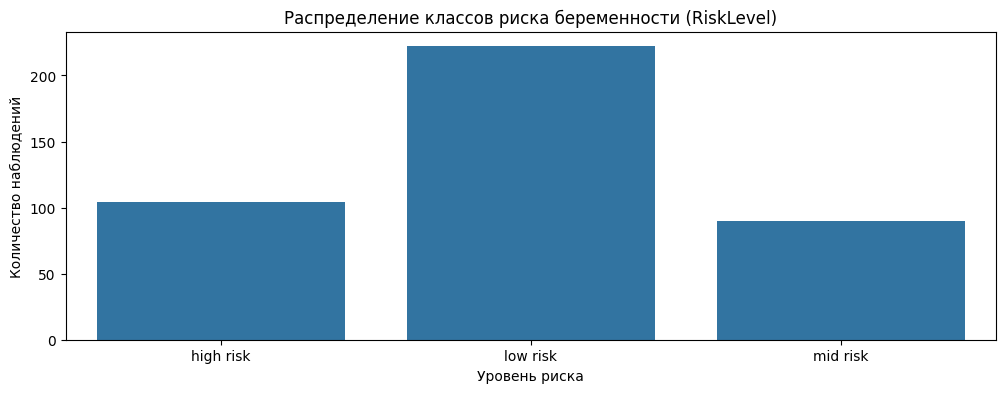

Абсолютные значения по целевой переменной RiskLevel:
low risk     222
high risk    104
mid risk      90
Name: risk_level, dtype: int64

Доли по целевой переменной RiskLevel:
low risk     0.5337
high risk    0.2500
mid risk     0.2163
Name: risk_level, dtype: float64


In [42]:
# Визуализация распределения целевой переменной RiskLevel
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='risk_level')
plt.title('Распределение классов риска беременности (RiskLevel)')
plt.xlabel('Уровень риска')
plt.ylabel('Количество наблюдений')
plt.show()

# Абсолютные значения
risk_counts = df_clean['risk_level'].value_counts()
print("Абсолютные значения по целевой переменной RiskLevel:")
print(risk_counts)

# Доли (нормализованные значения, округление до 2 знаков)
risk_rate = df_clean['risk_level'].value_counts(normalize=True).round(4)
print("\nДоли по целевой переменной RiskLevel:")
print(risk_rate)


### Признаки для анализа

Для каждого типа признака построим графики

- Количественные признаки датасета df:

In [43]:
# Количественные переменные (обычно числовые типы)
numerical = df.select_dtypes(include=['number']).columns.tolist()

print("Количественные переменные в датасета df:", numerical)

Количественные переменные в датасета df: ['age', 'systolic_bp', 'diastolic_bp', 'bs', 'body_temp', 'heart_rate', 'abnormal_pulse', 'map', 'pulse_pressure', 'temp_deviation', 'bs_to_age', 'hyperglycemia', 'target']


но по сути признаки abnormal_pulse и hyperglycemia тоже категориальные

- Категориальные признаки датасета df:

In [44]:
# Категориальные переменные (обычно тип object или category)
categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Категориальные переменные в датасета df:", categorical)

Категориальные переменные в датасета df: ['bp_category', 'age_group', 'risk_level']


### Анализ количественных признаков

In [45]:
df.describe().T

count        mean        std     min       25%       50%  \
age             416.0   29.192308  13.753651  10.000  19.00000   25.0000   
systolic_bp     416.0  110.600962  18.182194  70.000  90.00000  120.0000   
diastolic_bp    416.0   75.274038  13.849167  49.000  65.00000   80.0000   
bs              416.0    8.354014   2.838362   6.000   6.90000    7.5000   
body_temp       416.0   98.713942   1.419723  98.000  98.00000   98.0000   
heart_rate      416.0   73.850962   8.197672   7.000  70.00000   76.0000   
abnormal_pulse  416.0    0.002404   0.049029   0.000   0.00000    0.0000   
map             416.0   87.049111  14.541769  56.670  73.33000   90.0000   
pulse_pressure  416.0   35.326923  10.937890   8.000  30.00000   35.0000   
temp_deviation  416.0    1.043750   0.967774   0.000   0.60000    0.6000   
bs_to_age       416.0    0.332531   0.136213   0.099   0.23175    0.3185   
hyperglycemia   416.0    0.605769   0.489273   0.000   0.00000    1.0000   
target          416.0    0.716346   0.839577   0.000   0.00000    0.0000   

                      75%      max  
age              35.00000   70.000  
systolic_bp     120.00000  160.000  
diastolic_bp     86.00000  100.000  
bs                7.90000   19.000  
body_temp        98.00000  103.000  
heart_rate       80.00000   90.000  
abnormal_pulse    0.00000    1.000  
map              97.42000  120.000  
pulse_pressure   40.00000   75.000  
temp_deviation    0.60000    4.400  
bs_to_age         0.40725    0.917  
hyperglycemia     1.00000    1.000  
target            1.25000    2.000

In [46]:
def compare_box_and_hist(df, feature='age', title=None, bins=30):
    # Удаляем пропуски
    data = df[feature].dropna()

    # Общая статистика
    print(f"\n📊 Статистика по признаку '{feature}':")
    print(data.describe())

    # Заголовок
    if title is None:
        title = f'Распределение признака "{feature}"'

    # Два графика рядом
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(title, fontsize=20, fontweight='bold')

    # Boxplot
    sns.boxplot(y=data, ax=axes[0], color='skyblue')
    axes[0].set_title('Boxplot', fontsize=18)
    axes[0].set_ylabel(feature, fontsize=16)
    axes[0].tick_params(axis='y', labelsize=14)

    # Гистограмма (частота)
    sns.histplot(data, bins=bins, stat='count', color='steelblue',
                 ax=axes[1], alpha=0.6, edgecolor='gray')
    axes[1].set_title('Гистограмма (частота)', fontsize=18)
    axes[1].set_xlabel(feature, fontsize=16)
    axes[1].set_ylabel('Частота', fontsize=16)
    axes[1].tick_params(axis='x', labelsize=14)
    axes[1].tick_params(axis='y', labelsize=14)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [47]:
def plot_all_four(df, feature='age', target='risk_level', bins=40, title=None):
    # Удаляем пропуски
    data = df[[feature, target]].dropna()

    # Общая статистика
    print(f"\n📊 Общая статистика по '{feature}':")
    print(data[feature].describe())

    # Статистика по группам
    for val in sorted(data[target].unique()):
        print(f"\n{target} = {val}:")
        print(data.loc[data[target] == val, feature].describe())

    # Заголовок
    if title is None:
        title = f'Распределение "{feature}" (общие и по целевой переменной) женщин на момент беременности'

    # 4 графика
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(title, fontsize=20, fontweight='bold')

    # --- 1. Boxplot общий ---
    sns.boxplot(y=data[feature], ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Boxplot (общий)', fontsize=16)

    # --- 2. Гистограмма общая ---
    sns.histplot(
        data[feature], bins=bins, stat='count',
        color='steelblue', ax=axes[0, 1],
        alpha=0.6, edgecolor='gray'
    )
    axes[0, 1].set_title('Гистограмма (общая)', fontsize=16)

    # --- 3. Boxplot по target ---
    sns.boxplot(
        data=data, x=target, y=feature, hue=target,
        ax=axes[1, 0], palette='Set2', legend=False
    )
    axes[1, 0].set_title('Boxplot по целевой переменной', fontsize=16)

    # --- 4. Гистограмма по target ---
    sns.histplot(
        data=data, x=feature, hue=target,
        bins=bins, stat="density", common_norm=False,
        palette='muted', ax=axes[1, 1]
    )
    axes[1, 1].set_title('Гистограмма по целевой переменной', fontsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

#### age

- __age__ - возраст женщины на момент беременности


📊 Общая статистика по 'age':
count    416.000000
mean      29.192308
std       13.753651
min       10.000000
25%       19.000000
50%       25.000000
75%       35.000000
max       70.000000
Name: age, dtype: float64

risk_level = high risk:
count    104.000000
mean      33.509615
std       13.310333
min       12.000000
25%       25.000000
50%       32.500000
75%       40.500000
max       65.000000
Name: age, dtype: float64

risk_level = low risk:
count    222.000000
mean      27.567568
std       14.049764
min       10.000000
25%       18.000000
50%       22.500000
75%       35.000000
max       70.000000
Name: age, dtype: float64

risk_level = mid risk:
count    90.000000
mean     28.211111
std      12.550567
min      10.000000
25%      19.000000
50%      26.500000
75%      32.000000
max      60.000000
Name: age, dtype: float64


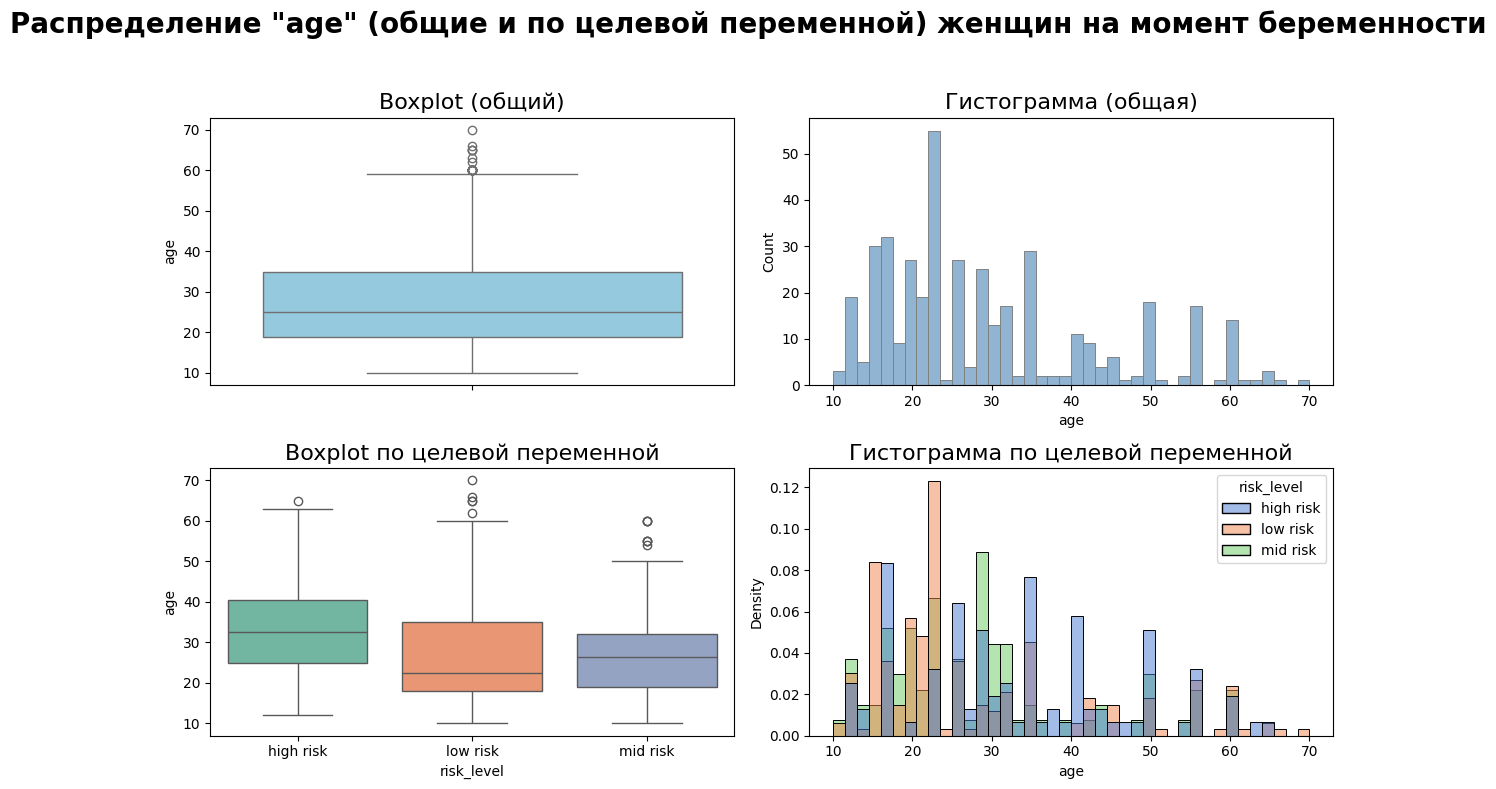

In [48]:
plot_all_four(df, feature='age', target='risk_level')

In [49]:
df['age'].value_counts().head()

23    32
15    30
25    26
35    26
17    26
Name: age, dtype: int64

low risk:  mean = 27.6 лет

mid risk:  mean = 28.2 лет

high risk: mean = 33.5 лет

__Возраст (age)__
- Средний возраст: ~29 лет
- Диапазон: 10–70 лет
- Распределение широкое, с заметной группой подростков и женщин старшего возраста
- high risk → старше (среднее ~33.5)
- low risk → моложе (среднее ~27.5)
- Mid risk: промежуточный (mean ≈ 28.2)

___Вывод: Увеличение возраста связано с ростом риска осложнений беременности - возраст является фактором риска___

#### systolic_bp

- systolic_bp: верхнее значение артериального давления в мм рт. ст., важный показатель во время беременности.


📊 Общая статистика по 'systolic_bp':
count    416.000000
mean     110.600962
std       18.182194
min       70.000000
25%       90.000000
50%      120.000000
75%      120.000000
max      160.000000
Name: systolic_bp, dtype: float64

risk_level = high risk:
count    104.000000
mean     120.365385
std       21.174292
min       83.000000
25%       98.750000
50%      120.000000
75%      140.000000
max      160.000000
Name: systolic_bp, dtype: float64

risk_level = low risk:
count    222.000000
mean     105.121622
std       15.585658
min       70.000000
25%       90.000000
50%      100.000000
75%      120.000000
max      129.000000
Name: systolic_bp, dtype: float64

risk_level = mid risk:
count     90.000000
mean     112.833333
std       15.103575
min       70.000000
25%      100.000000
50%      120.000000
75%      120.000000
max      140.000000
Name: systolic_bp, dtype: float64


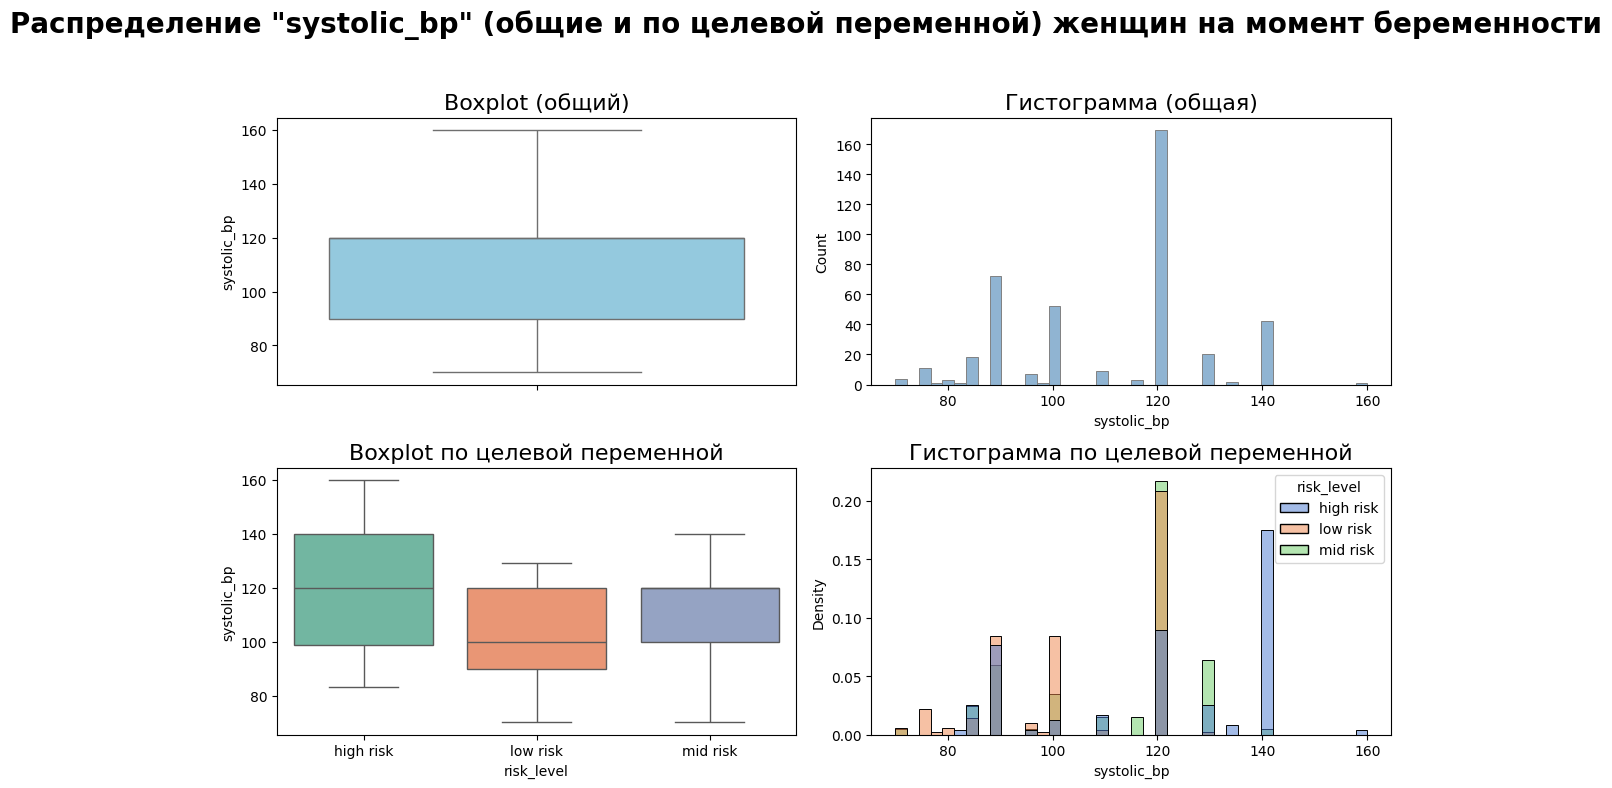

In [50]:
plot_all_four(df, feature='systolic_bp', target='risk_level')

In [51]:
df['systolic_bp'].value_counts().head()

120    169
90      72
100     52
140     42
130     19
Name: systolic_bp, dtype: int64

low risk:  mean = 105.1

mid risk:  mean = 112.8

high risk: mean = 120.4 (гипертензия)

__SystolicBP (систолическое давление)__
- Среднее: 110 мм рт. ст.
- High risk: значительно выше (среднее ~120 мм рт. ст.)
- Low risk: ниже (среднее ~105 мм рт. ст.)
- Четкая прогрессия. High risk → гипертензия.

___Вывод: систолическое давление является одним из ключевых факторов риска.___

#### diastolic_bp

- diastolic_bp : нижнее значение артериального давления в мм рт. ст., также значимый показатель в период беременности.


📊 Общая статистика по 'diastolic_bp':
count    416.000000
mean      75.274038
std       13.849167
min       49.000000
25%       65.000000
50%       80.000000
75%       86.000000
max      100.000000
Name: diastolic_bp, dtype: float64

risk_level = high risk:
count    104.000000
mean      81.701923
std       14.970443
min       60.000000
25%       68.000000
50%       80.000000
75%      100.000000
max      100.000000
Name: diastolic_bp, dtype: float64

risk_level = low risk:
count    222.000000
mean      72.608108
std       13.122966
min       49.000000
25%       60.000000
50%       75.000000
75%       80.000000
max       95.000000
Name: diastolic_bp, dtype: float64

risk_level = mid risk:
count     90.000000
mean      74.422222
std       11.857750
min       50.000000
25%       65.000000
50%       75.000000
75%       80.000000
max      100.000000
Name: diastolic_bp, dtype: float64


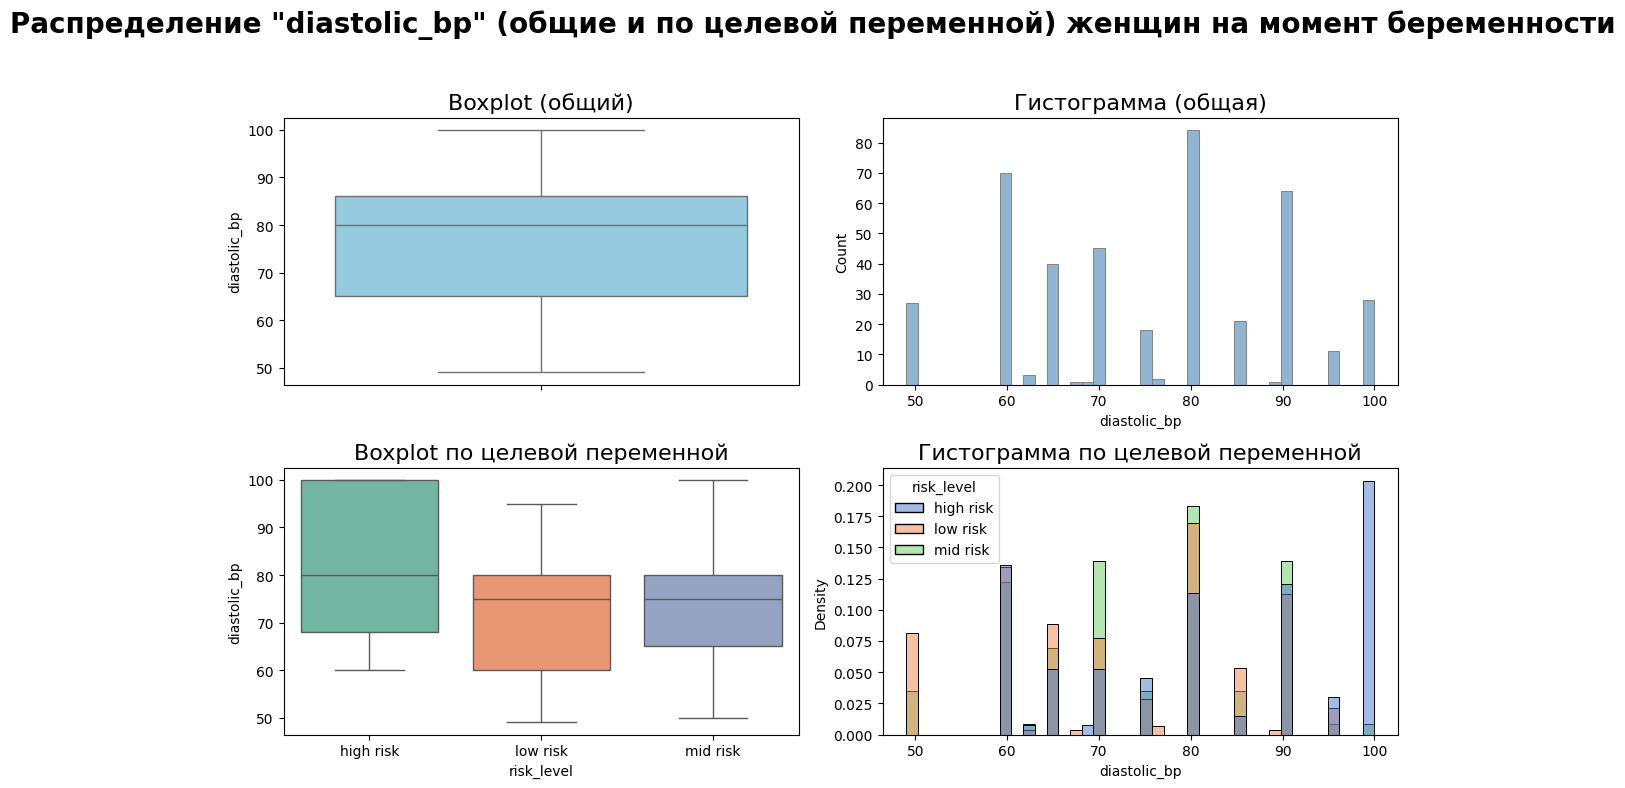

In [52]:
plot_all_four(df, feature='diastolic_bp', target='risk_level')

In [53]:
df['diastolic_bp'].value_counts().head()

80    84
60    70
90    64
70    45
65    40
Name: diastolic_bp, dtype: int64

__DiastolicBP (диастолическое давление)__
- Среднее: 75 мм рт. ст.
- High risk: ~81.7 мм рт. ст.
- Low risk: ~72.6 мм рт. ст.
- Mid risk: 74.4 мм рт. ст.
- High risk чаще попадает в диапазон предгипертензии и гипертензии (>90).

___Вывод: диастолическое давление - важный предиктор высокого риска___

#### bs

 - bs: концентрация глюкозы в крови в миллимолях на литр (ммоль/л)


📊 Общая статистика по 'bs':
count    416.000000
mean       8.354014
std        2.838362
min        6.000000
25%        6.900000
50%        7.500000
75%        7.900000
max       19.000000
Name: bs, dtype: float64

risk_level = high risk:
count    104.000000
mean      11.350192
std        3.954801
min        6.100000
25%        7.800000
50%       11.000000
75%       15.000000
max       19.000000
Name: bs, dtype: float64

risk_level = low risk:
count    222.000000
mean       7.200586
std        0.515367
min        6.000000
25%        6.900000
50%        7.200000
75%        7.500000
max        8.000000
Name: bs, dtype: float64

risk_level = mid risk:
count    90.000000
mean      7.736889
std       2.147535
min       6.000000
25%       6.800000
50%       6.900000
75%       7.800000
max      18.000000
Name: bs, dtype: float64


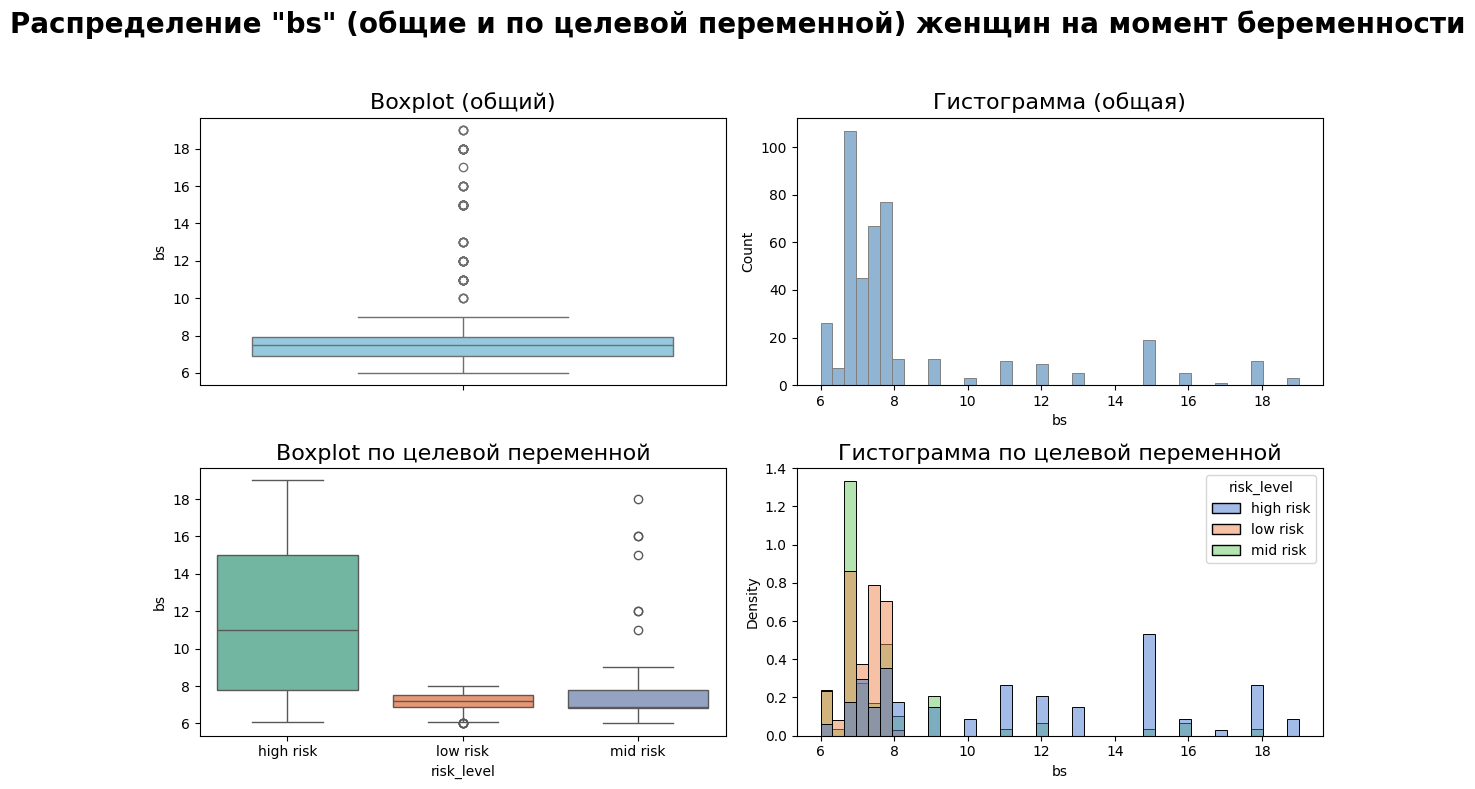

In [54]:
plot_all_four(df, feature='bs', target='risk_level')

In [55]:
df['bs'].value_counts().head()

7.5    66
6.9    58
6.8    36
7.8    31
7.9    26
Name: bs, dtype: int64

low risk:  mean = 7.20, std = 0.52  (норма)

mid risk:  mean = 7.74, std = 2.15  (слегка повышена)

high risk: mean = 11.35, std = 3.95 (ЗНАЧИТЕЛЬНО повышена!)

__BS (глюкоза)__
- Среднее: 8.35 ммоль/л
- High risk: сильно выше (среднее ~11.35 ммоль/л)
- Low risk: нормальная (среднее ~7.2 ммоль/л)
- Критическая разниц
- High risk имеет резкое смещение вправо, вплоть до 19 ммоль/л
  - имеет выраженную гипергликемию, что является сильным фактором риска.

Гипергликемия — известный фактор риска осложнений беременности (гестационный диабет, преэклампсия).

___Вывод: глюкоза это значимый и информативный признак для классификации!___

#### body_temp

- body_temp: Температура тела, скорее всего в °F


📊 Общая статистика по 'body_temp':
count    416.000000
mean      98.713942
std        1.419723
min       98.000000
25%       98.000000
50%       98.000000
75%       98.000000
max      103.000000
Name: body_temp, dtype: float64

risk_level = high risk:
count    104.000000
mean      99.255769
std        1.718987
min       98.000000
25%       98.000000
50%       98.000000
75%      101.000000
max      103.000000
Name: body_temp, dtype: float64

risk_level = low risk:
count    222.000000
mean      98.380180
std        1.133754
min       98.000000
25%       98.000000
50%       98.000000
75%       98.000000
max      103.000000
Name: body_temp, dtype: float64

risk_level = mid risk:
count     90.000000
mean      98.911111
std        1.458369
min       98.000000
25%       98.000000
50%       98.000000
75%      100.000000
max      102.000000
Name: body_temp, dtype: float64


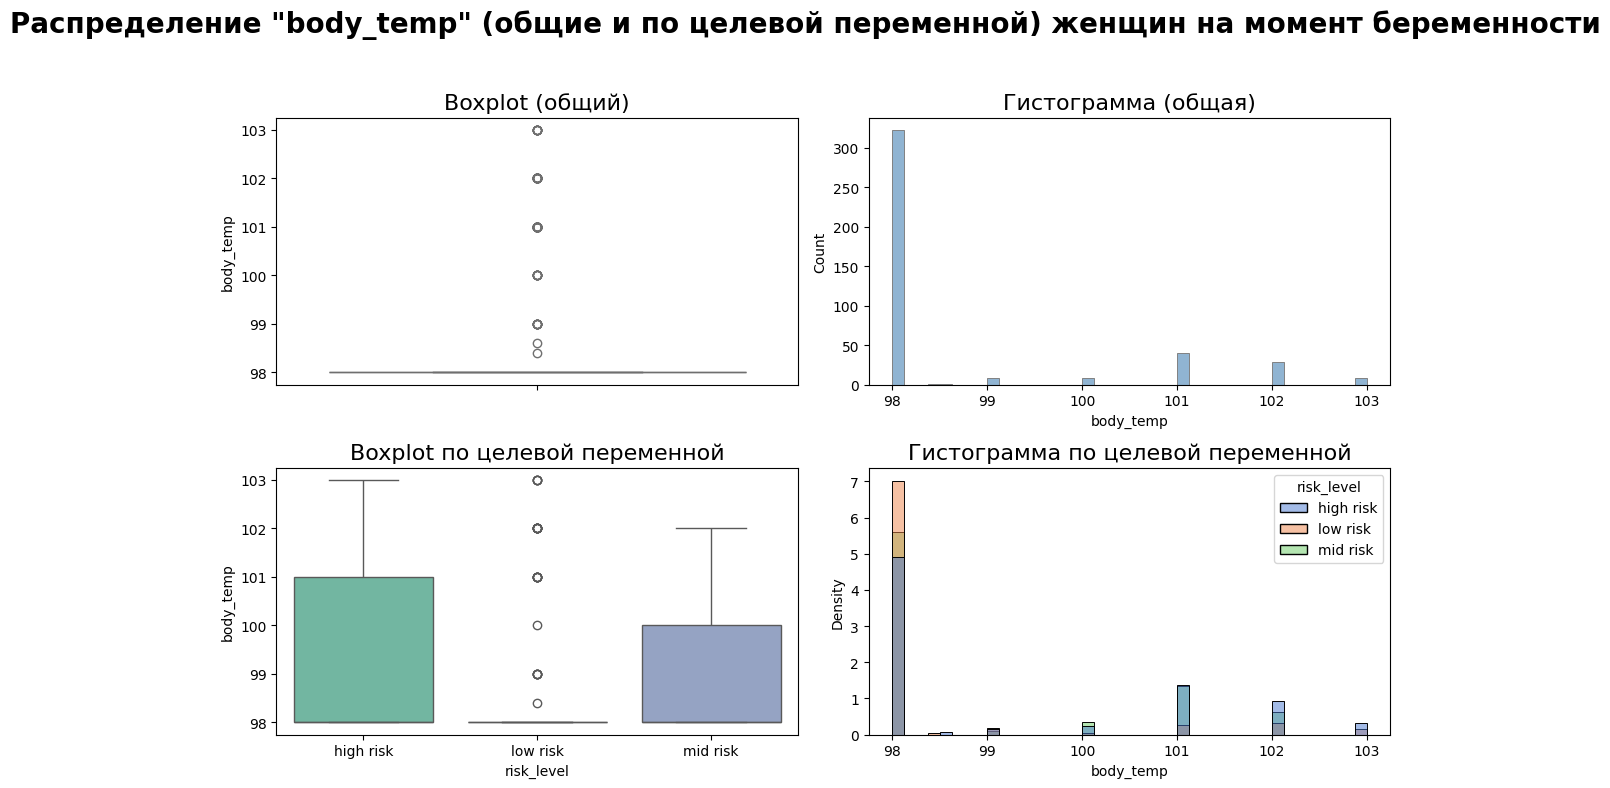

In [56]:
plot_all_four(df, feature='body_temp', target='risk_level')

In [57]:
df['body_temp'].value_counts()

98.0     322
101.0     40
102.0     28
100.0      8
103.0      8
99.0       8
98.4       1
98.6       1
Name: body_temp, dtype: int64

low risk:  mean = 98.38°F (норма)

mid risk:  mean = 98.91°F

high risk: mean = 99.26°F (лихорадка)


__Температура (body_temp)__
- Большинство значений — 98°F
- High risk чаще имеет повышенную температуру (99–101°F)
  - Возможный признак воспалительных процессов или осложнений.
- low risk → почти всегда 98°F

Вывод: Повышенная температура может указывать на воспалительные процессы, инфекции или осложнения  →  дополнительный риск.

#### heart_rate

- heart_rate: нормальная частота сердцебиения (пульс) в состоянии покоя (ударов в минуту).


📊 Общая статистика по 'heart_rate':
count    416.000000
mean      73.850962
std        8.197672
min        7.000000
25%       70.000000
50%       76.000000
75%       80.000000
max       90.000000
Name: heart_rate, dtype: float64

risk_level = high risk:
count    104.000000
mean      76.230769
std        8.451151
min       60.000000
25%       70.000000
50%       77.000000
75%       80.000000
max       90.000000
Name: heart_rate, dtype: float64

risk_level = low risk:
count    222.000000
mean      72.788288
std        8.284819
min        7.000000
25%       70.000000
50%       72.500000
75%       77.000000
max       88.000000
Name: heart_rate, dtype: float64

risk_level = mid risk:
count    90.000000
mean     73.722222
std       7.128086
min      60.000000
25%      70.000000
50%      76.000000
75%      78.000000
max      88.000000
Name: heart_rate, dtype: float64


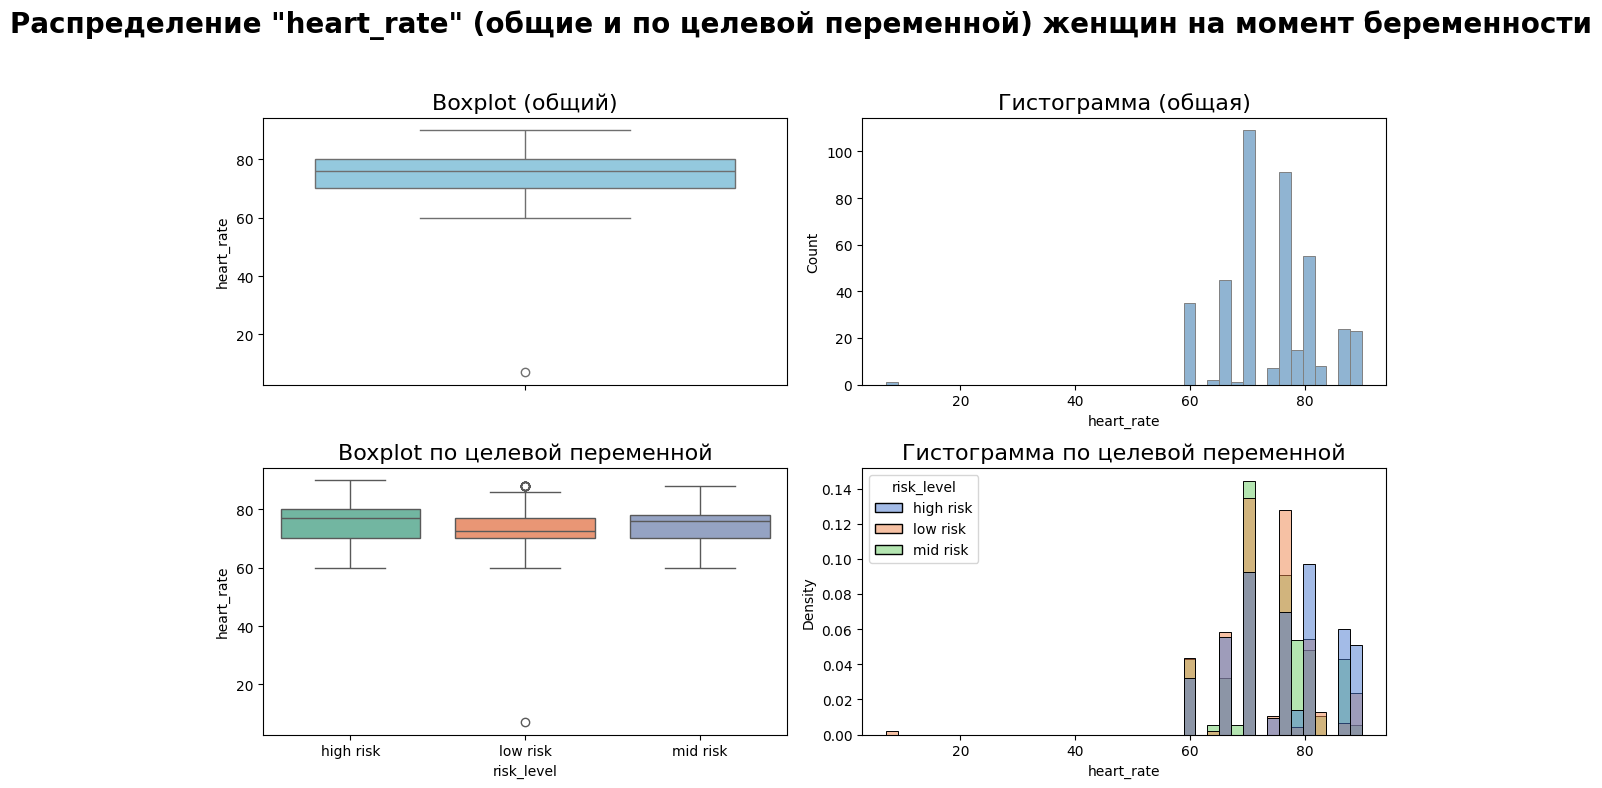

In [58]:
plot_all_four(df, feature='heart_rate', target='risk_level')

In [59]:
df['heart_rate'].value_counts()

70    109
80     55
76     52
66     40
77     39
60     35
86     24
78     15
88     14
90      9
82      8
75      7
67      5
65      2
68      1
7       1
Name: heart_rate, dtype: int64

In [60]:
print(df[df['heart_rate'] < 30].shape)  # Проверить аномально низкий пульс

(1, 16)


In [61]:
df = df[df['heart_rate'] > 30].reset_index(drop=True)


📊 Общая статистика по 'heart_rate':
count    415.000000
mean      74.012048
std        7.519530
min       60.000000
25%       70.000000
50%       76.000000
75%       80.000000
max       90.000000
Name: heart_rate, dtype: float64

risk_level = high risk:
count    104.000000
mean      76.230769
std        8.451151
min       60.000000
25%       70.000000
50%       77.000000
75%       80.000000
max       90.000000
Name: heart_rate, dtype: float64

risk_level = low risk:
count    221.000000
mean      73.085973
std        7.013418
min       60.000000
25%       70.000000
50%       75.000000
75%       77.000000
max       88.000000
Name: heart_rate, dtype: float64

risk_level = mid risk:
count    90.000000
mean     73.722222
std       7.128086
min      60.000000
25%      70.000000
50%      76.000000
75%      78.000000
max      88.000000
Name: heart_rate, dtype: float64


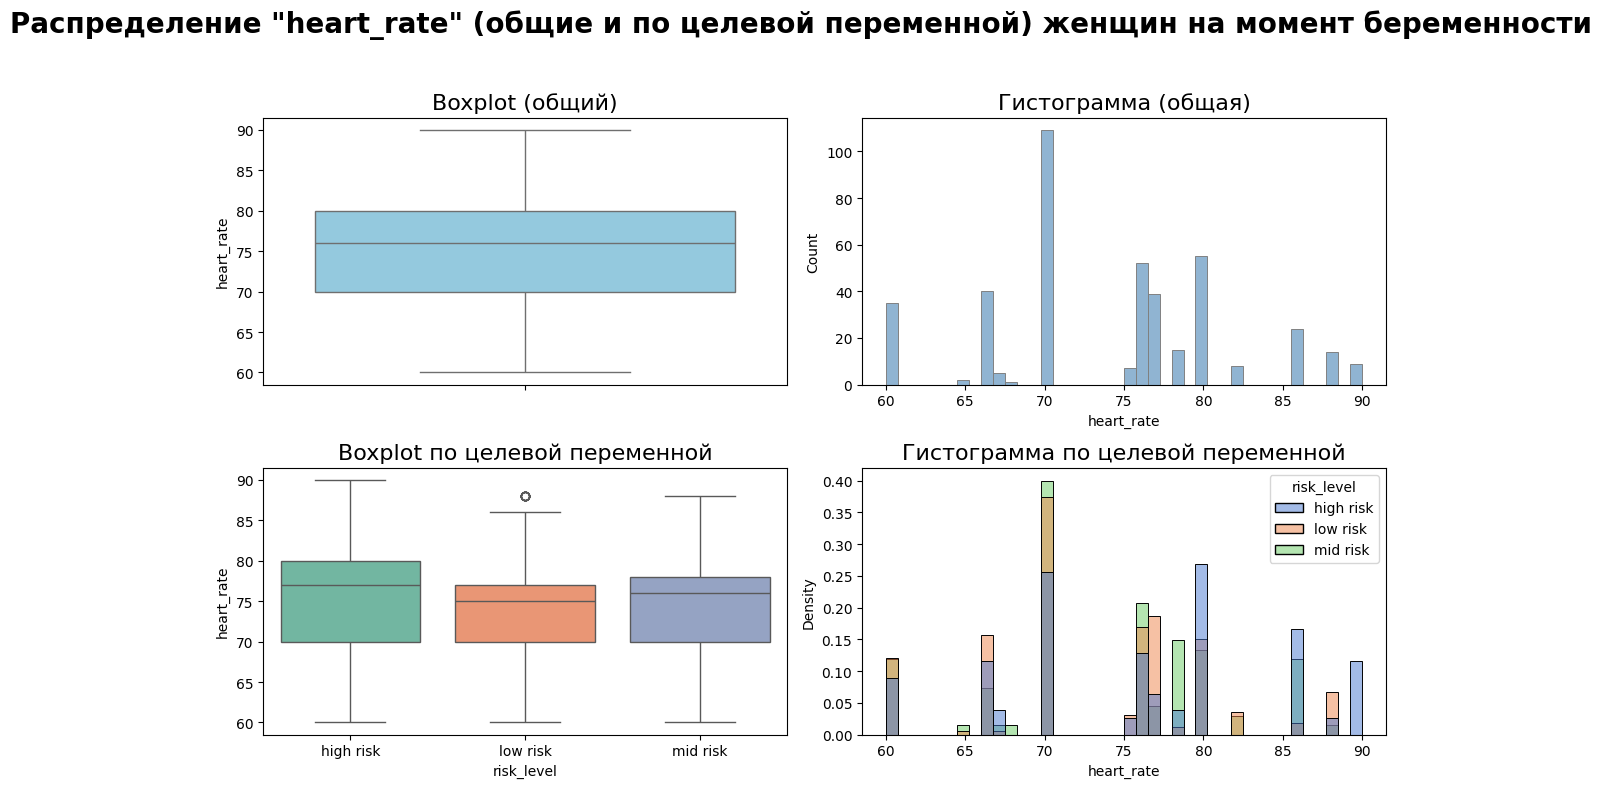

In [62]:
plot_all_four(df, feature='heart_rate', target='risk_level')


__Пульс (heart_rate)__
- Среднее: 74 уд/мин
- High risk: ~76 уд/мин
- Low risk: ~72 уд/мин
- Mid risk: 73.7

Разница небольшая, но тренд есть: у high risk пульс выше.

Вывод: Пульс — слабый, но всё же полезный признак.

#### map

- MAP (Mean Arterial Pressure) -  среднее артериальное давление 


📊 Общая статистика по 'map':
count    415.000000
mean      87.042000
std       14.558597
min       56.670000
25%       73.330000
50%       90.000000
75%       98.170000
max      120.000000
Name: map, dtype: float64

risk_level = high risk:
count    104.000000
mean      94.589038
std       16.401934
min       67.670000
25%       76.670000
50%       98.335000
75%      110.000000
max      120.000000
Name: map, dtype: float64

risk_level = low risk:
count    221.000000
mean      83.415837
std       13.343731
min       56.670000
25%       71.670000
50%       90.000000
75%       93.330000
max      103.330000
Name: map, dtype: float64

risk_level = mid risk:
count     90.000000
mean      87.225222
std       11.628283
min       56.670000
25%       77.085000
50%       90.000000
75%       96.670000
max      106.670000
Name: map, dtype: float64


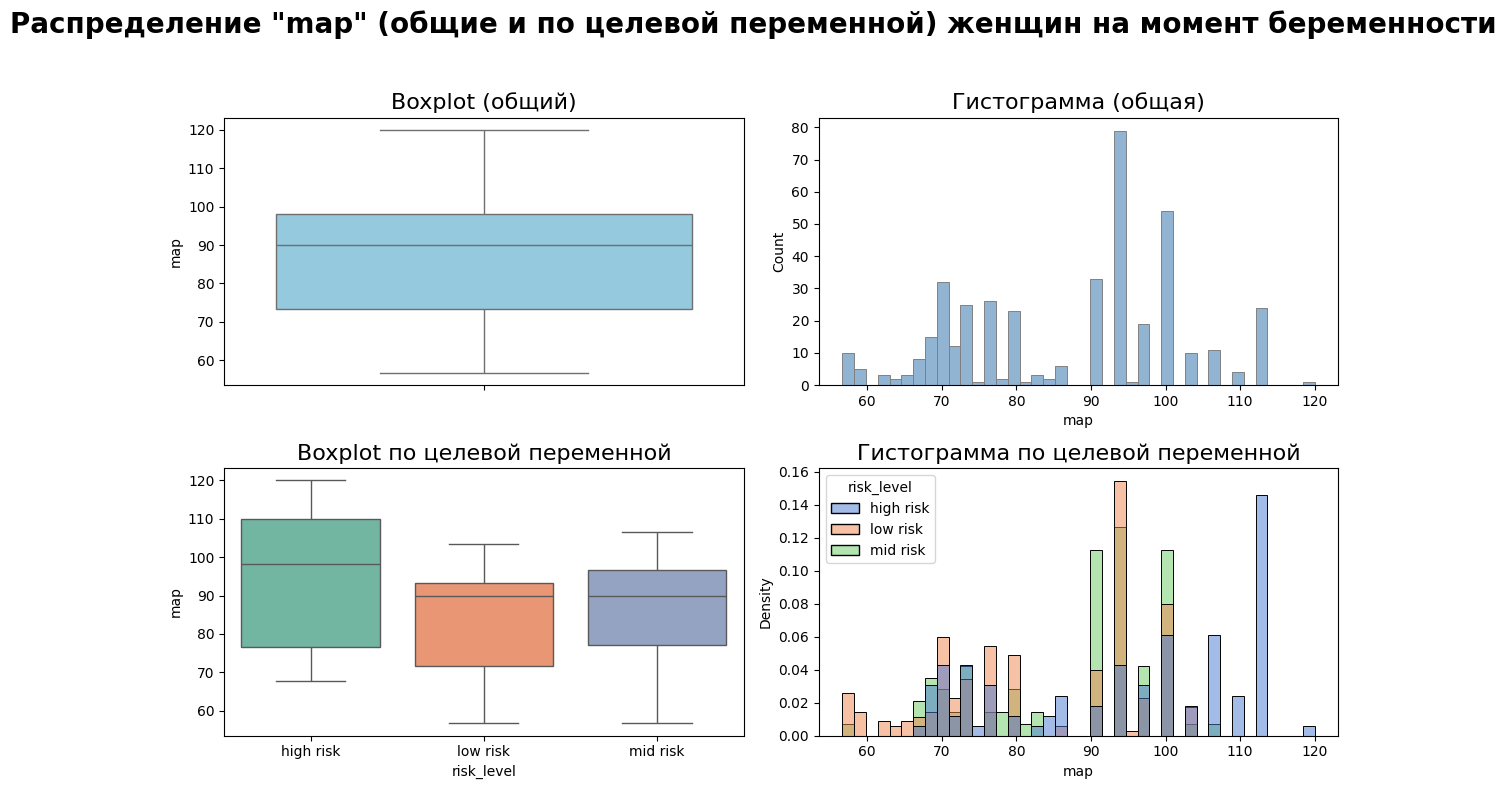

In [63]:
plot_all_four(df, feature='map', target='risk_level')

In [64]:
df['map'].value_counts().head()

93.33     79
100.00    53
90.00     31
70.00     31
76.67     26
Name: map, dtype: int64

__MAP (среднее артериальное давление)__
- High risk имеет значительно более высокие значения MAP
- Это подтверждает связь высокого риска с гипертензией.

___Вывод: среднее артериальное давление является фактором риска___

#### pulse_pressure

- Pulse Pressure -  пульсовое давление


📊 Общая статистика по 'pulse_pressure':
count    415.000000
mean      35.303614
std       10.940743
min        8.000000
25%       30.000000
50%       35.000000
75%       40.000000
max       75.000000
Name: pulse_pressure, dtype: float64

risk_level = high risk:
count    104.000000
mean      38.663462
std       11.584733
min       16.000000
25%       30.000000
50%       40.000000
75%       45.000000
max       75.000000
Name: pulse_pressure, dtype: float64

risk_level = low risk:
count    221.000000
mean      32.457014
std        9.059611
min        8.000000
25%       27.000000
50%       30.000000
75%       40.000000
max       60.000000
Name: pulse_pressure, dtype: float64

risk_level = mid risk:
count    90.000000
mean     38.411111
std      12.470995
min      15.000000
25%      30.000000
50%      40.000000
75%      48.750000
max      60.000000
Name: pulse_pressure, dtype: float64


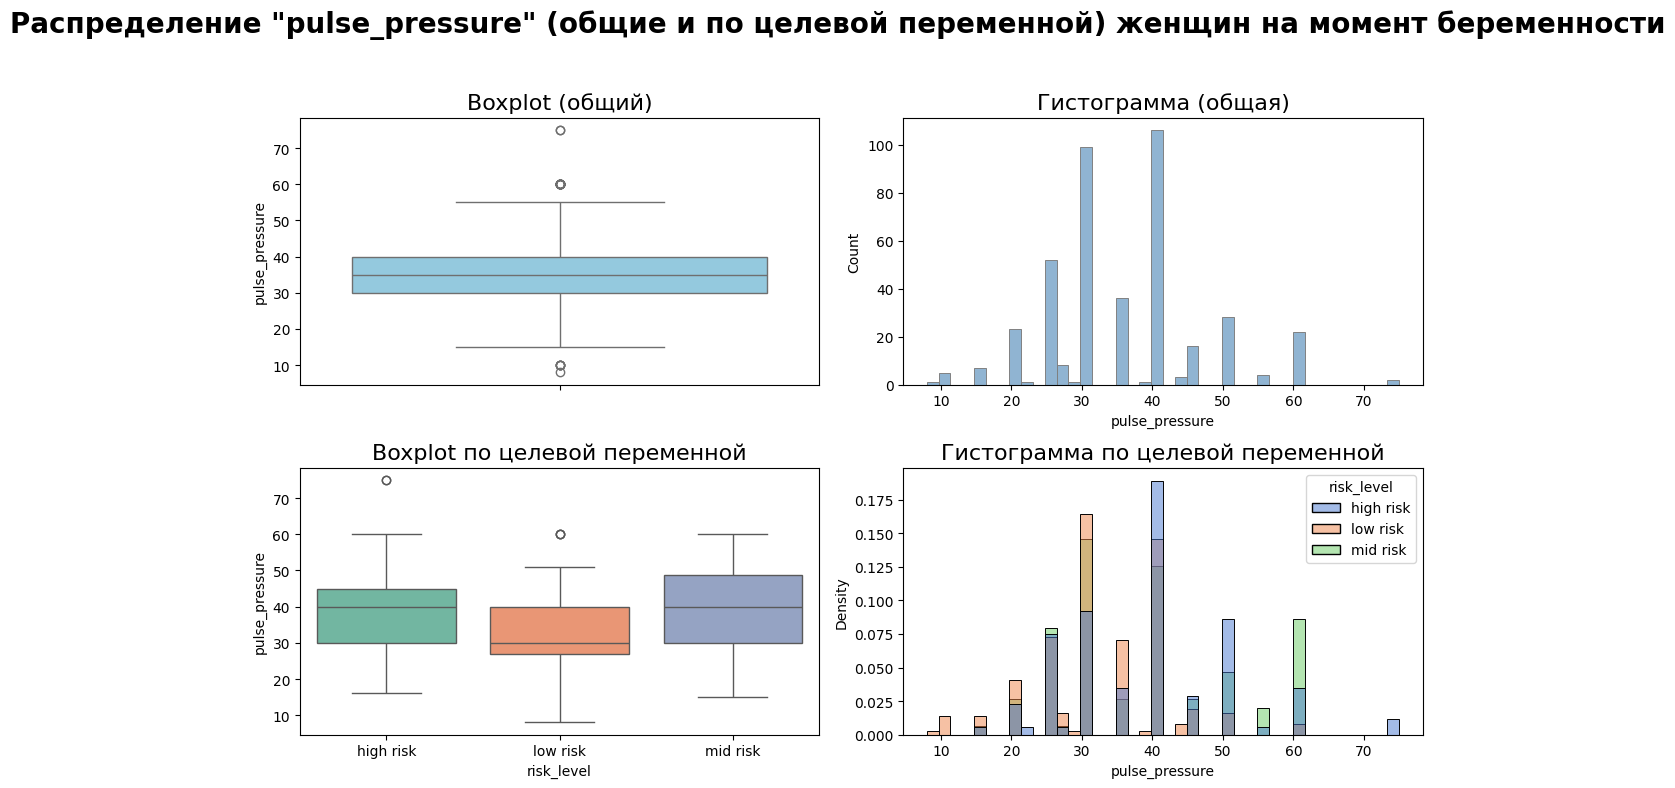

In [65]:
plot_all_four(df, feature='pulse_pressure', target='risk_level')

In [66]:
df['pulse_pressure'].value_counts()

40    103
30     99
25     51
35     36
50     25
60     22
20     22
45     16
27      8
15      6
10      5
55      4
44      3
41      3
51      3
75      2
21      1
23      1
26      1
16      1
39      1
29      1
8       1
Name: pulse_pressure, dtype: int64

Pulse Pressure :
- Среднее по выборке: 35.3 мм рт. ст.
- High risk: 38.7
- Mid risk: 38.4
- Low risk: 32.5

Пульсовое давление — разница между систолическим и диастолическим давлением.

Pulse pressure — значимый признак риска.  
- High risk и mid risk имеют заметно более высокие значения, что отражает сосудистые нарушения.

#### temp_deviation

- Отклонение температуры от нормы (98.6°F)


📊 Общая статистика по 'temp_deviation':
count    415.000000
mean       1.044819
std        0.968696
min        0.000000
25%        0.600000
50%        0.600000
75%        0.600000
max        4.400000
Name: temp_deviation, dtype: float64

risk_level = high risk:
count    104.000000
mean       1.394231
std        1.194309
min        0.000000
25%        0.600000
50%        0.600000
75%        2.400000
max        4.400000
Name: temp_deviation, dtype: float64

risk_level = low risk:
count    221.000000
mean       0.837104
std        0.796514
min        0.200000
25%        0.600000
50%        0.600000
75%        0.600000
max        4.400000
Name: temp_deviation, dtype: float64

risk_level = mid risk:
count    90.000000
mean      1.151111
std       0.940624
min       0.400000
25%       0.600000
50%       0.600000
75%       1.400000
max       3.400000
Name: temp_deviation, dtype: float64


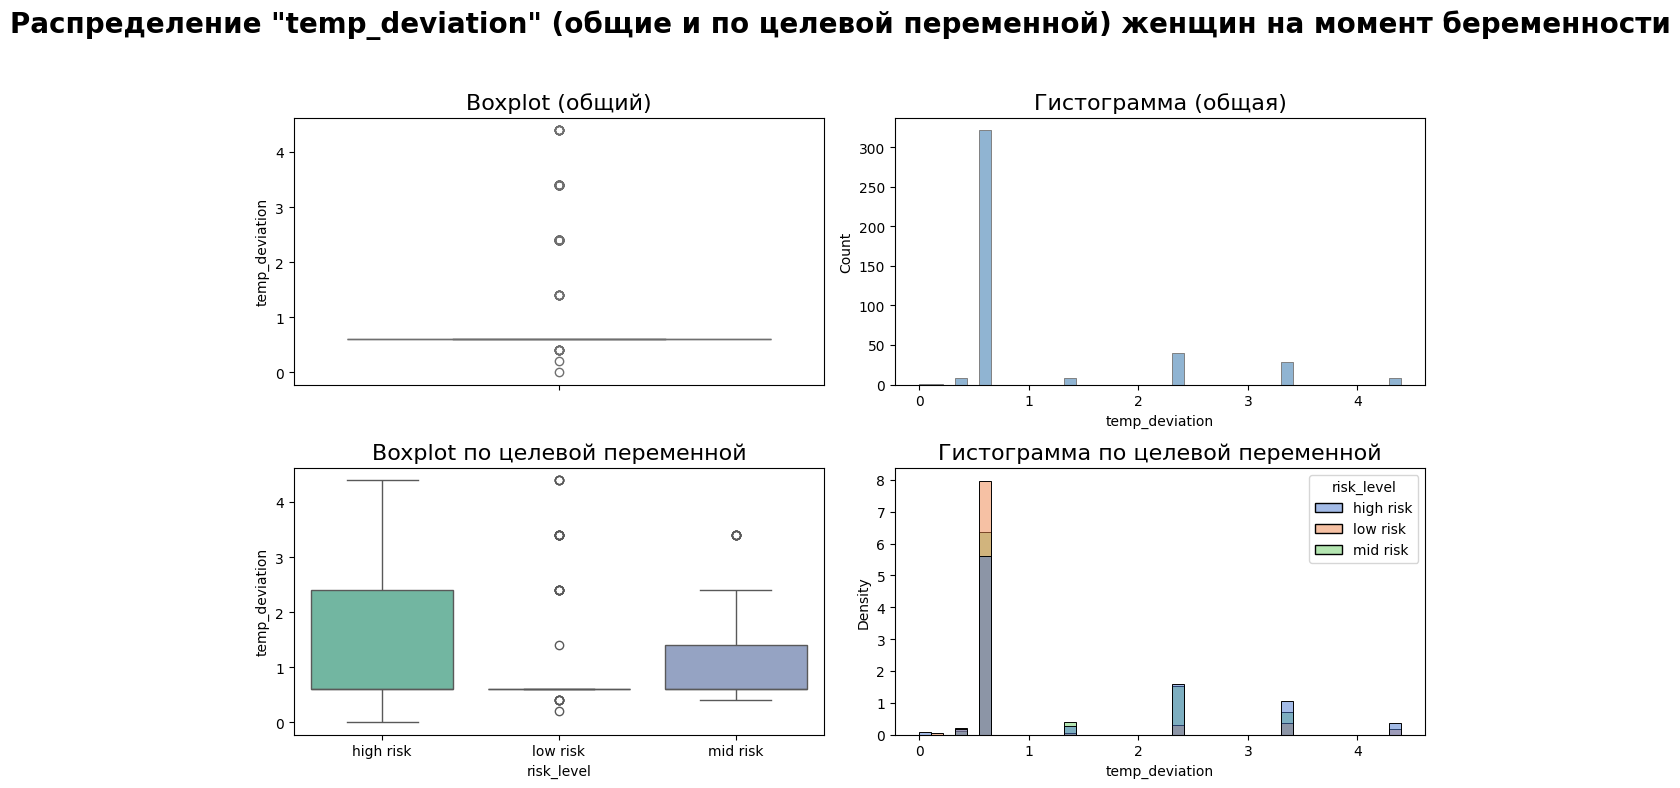

In [67]:
plot_all_four(df, feature='temp_deviation', target='risk_level')

In [68]:
df['temp_deviation'].value_counts()

0.6    321
2.4     40
3.4     28
1.4      8
4.4      8
0.4      8
0.2      1
0.0      1
Name: temp_deviation, dtype: int64

Температура:
- Temp deviation: высокий риск = 1.39 vs низкий = 0.84
- 77% всех значений — ровно 98.0°F (синтетическая особенность датасета)
- Температура — индикатор воспалительных процессов, инфекций, осложнений беременности.

Вывод: повышенная температура  — дополнительный индикатор высокого риска

#### bs_to_age

- Отношение глюкозы к возрасту


📊 Общая статистика по 'bs_to_age':
count    415.000000
mean       0.332142
std        0.136146
min        0.099000
25%        0.231500
50%        0.318000
75%        0.406000
max        0.917000
Name: bs_to_age, dtype: float64

risk_level = high risk:
count    104.000000
mean       0.373606
std        0.149246
min        0.130000
25%        0.275750
50%        0.324500
75%        0.450750
max        0.917000
Name: bs_to_age, dtype: float64

risk_level = low risk:
count    221.000000
mean       0.319430
std        0.131867
min        0.099000
25%        0.214000
50%        0.323000
75%        0.400000
max        0.690000
Name: bs_to_age, dtype: float64

risk_level = mid risk:
count    90.000000
mean      0.315444
std       0.121524
min       0.113000
25%       0.227000
50%       0.298000
75%       0.383000
max       0.608000
Name: bs_to_age, dtype: float64


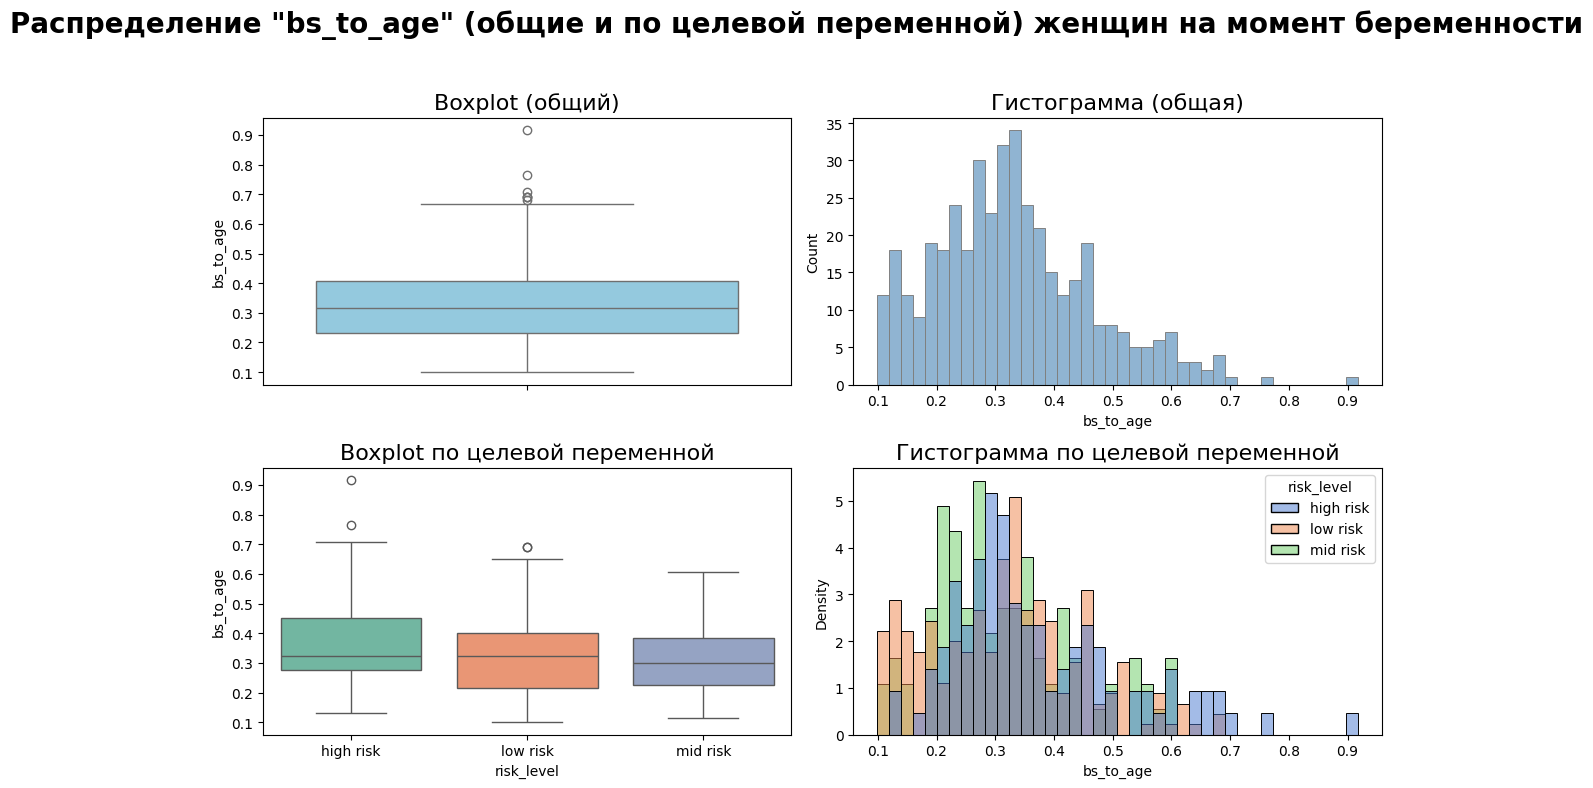

In [69]:
plot_all_four(df, feature='bs_to_age', target='risk_level')

In [70]:
df['bs_to_age'].value_counts().head()

0.300    12
0.400     8
0.500     7
0.197     7
0.314     7
Name: bs_to_age, dtype: int64

- Среднее: 0.33
- High risk: 0.37
- Low risk: 0.32
- Mid risk: 0.31

Признак усиливает различия между классами, особенно при высоком BS.

Вывод: BS_to_age — полезный производный признак, усиливающий сигнал глюкозы и возраста.

#### Анализ выбросов

In [71]:
def analyze_outliers(df, features):
    outliers_info = {}
    for feature in features:
        series = df[feature].dropna()
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = series[(series < lower_bound) | (series > upper_bound)]

        outliers_info[feature] = {
            # количество выбросов
            'count': len(outliers),
            # доля выбросов относительно всех строк датафрейма           
            'percentage_total': len(outliers) / len(df) * 100,
            # доля выбросов относительно непустых значений признака            
            'percentage_non_na': len(outliers) / len(series) * 100,
            # минимальное значение среди выбросов         
            'min': outliers.min() if not outliers.empty else None,
            # максимальное значение среди выбросов            
            'max': outliers.max() if not outliers.empty else None,
            
            # статистические границы            
            'Q1': Q1,
            'Q3': Q3,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    return pd.DataFrame(outliers_info).T

In [72]:
analyze_outliers(df, numerical)

count  percentage_total  percentage_non_na     min      max  \
age              21.0          5.060241           5.060241  60.000   70.000   
systolic_bp       0.0          0.000000           0.000000     NaN      NaN   
diastolic_bp      0.0          0.000000           0.000000     NaN      NaN   
bs               65.0         15.662651          15.662651  10.000   19.000   
body_temp        94.0         22.650602          22.650602  98.400  103.000   
heart_rate        0.0          0.000000           0.000000     NaN      NaN   
abnormal_pulse    0.0          0.000000           0.000000     NaN      NaN   
map               0.0          0.000000           0.000000     NaN      NaN   
pulse_pressure   30.0          7.228916           7.228916   8.000   75.000   
temp_deviation   94.0         22.650602          22.650602   0.000    4.400   
bs_to_age         7.0          1.686747           1.686747   0.682    0.917   
hyperglycemia     0.0          0.000000           0.000000     NaN      NaN   
target            0.0          0.000000           0.000000     NaN      NaN   

                     Q1       Q3  lower_bound  upper_bound  
age             19.0000   35.000     -5.00000     59.00000  
systolic_bp     90.0000  120.000     45.00000    165.00000  
diastolic_bp    65.0000   87.000     32.00000    120.00000  
bs               6.9000    7.900      5.40000      9.40000  
body_temp       98.0000   98.000     98.00000     98.00000  
heart_rate      70.0000   80.000     55.00000     95.00000  
abnormal_pulse   0.0000    0.000      0.00000      0.00000  
map             73.3300   98.170     36.07000    135.43000  
pulse_pressure  30.0000   40.000     15.00000     55.00000  
temp_deviation   0.6000    0.600      0.60000      0.60000  
bs_to_age        0.2315    0.406     -0.03025      0.66775  
hyperglycemia    0.0000    1.000     -1.50000      2.50000  
target           0.0000    1.500     -2.25000      3.75000

__Age: 21 выброс (5%) — возраст 60-70 лет__
- Это поздняя беременность, но медицински возможно (например ЭКО ) → ОСТАВИТЬ
- Интресно, что есть возраст и от 10 лет (ранняя беременность)

__BS (глюкоза): 65 выбросов (15.6%)__
- Max = 19 mmol/L — это критический диабет (норма < 7.8)
- Это не ошибки, а реальные медицинские случаи гипергликемии → ОСТАВИТЬ

__Body Temp и TempDeviation: 94 выброса (22.6%)__
- 77% данных = ровно 98.0°F →  синтетические данные
- Все >98.4°F считаются "выбросами", но это лихорадка → ОСТАВИТЬ

__PulsePressure (пульсовое давление):__
- Выбросы: 30 пациенток (7.23%) с PP ≤ 8 или ≥ 55
  - PP < 10 — низкое пульсовое давление (может быть при шоке)
  - PP  > 55 — высокое (может быть при атеросклерозе, гипертензии)
- Оставить, это медицински значимые крайности

__bs_to_age:  7 пациенток (1.69%) с отношением ≥ 0.682__
- Высокое отношение = либо высокая глюкоза, либо юный возраст
- Может быть полезным признаком
- Оставить

Выбросы отражают реальные медицинские состояния, а не ошибки

### Анализ категориальных признаков

In [73]:
def plot_cat_feature_by_target(data, feature='abnormal_pulse', target='risk_level', title=None):
    # Удаляем пропуски
    df = data[[feature, target]].dropna()

    # Общие частоты значений признака
    print(f"\nОбщее распределение признака '{feature}':")
    counts = df[feature].value_counts()
    percentages = df[feature].value_counts(normalize=True) * 100
    summary_table = pd.DataFrame({'Частота': counts, 'Процент': percentages.round(2)})
    print(summary_table)

    # Частоты по целевой переменной
    print(f"\nРаспределение признака '{feature}' по значениям целевой переменной '{target}':")
    for val in sorted(df[target].unique()):
        print(f"\n{target} = {val}:")
        counts = df[df[target] == val][feature].value_counts()
        percentages = df[df[target] == val][feature].value_counts(normalize=True) * 100
        freq_table = pd.DataFrame({'Частота': counts, 'Процент': percentages.round(2)})
        print(freq_table)

    # Заголовок графика по умолчанию
    if title is None:
        title = f'Распределение категориального признака "{feature}" по целевой переменной'

    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle(title, fontsize=20)

    # Распределение по категориям и целевой переменной
    sns.countplot(data=df, x=feature, hue=target, palette='pastel', ax=axes[0])
    axes[0].set_title('Распределение по категориям и целевой переменной', fontsize=16)
    axes[0].set_xlabel(feature, fontsize=14)
    axes[0].set_ylabel('Частота', fontsize=14)
    axes[0].tick_params(axis='x', labelsize=12)
    axes[0].tick_params(axis='y', labelsize=12)
    axes[0].legend(title=target, fontsize=12, title_fontsize=13)

    # Общее распределение категорий
    sns.countplot(data=df, x=feature, hue=feature, palette='pastel', ax=axes[1], legend=False)
    axes[1].set_title('Общее распределение категорий', fontsize=16)
    axes[1].set_xlabel(feature, fontsize=14)
    axes[1].set_ylabel('Частота', fontsize=14)
    axes[1].tick_params(axis='x', labelsize=12)
    axes[1].tick_params(axis='y', labelsize=12)

    plt.tight_layout()
    plt.show()

#### abnormal_pulse

- Аномальный пульс (норма 60–100) - бинарный признак аномального пульса


Общее распределение признака 'abnormal_pulse':
   Частота  Процент
0      415    100.0

Распределение признака 'abnormal_pulse' по значениям целевой переменной 'risk_level':

risk_level = high risk:
   Частота  Процент
0      104    100.0

risk_level = low risk:
   Частота  Процент
0      221    100.0

risk_level = mid risk:
   Частота  Процент
0       90    100.0


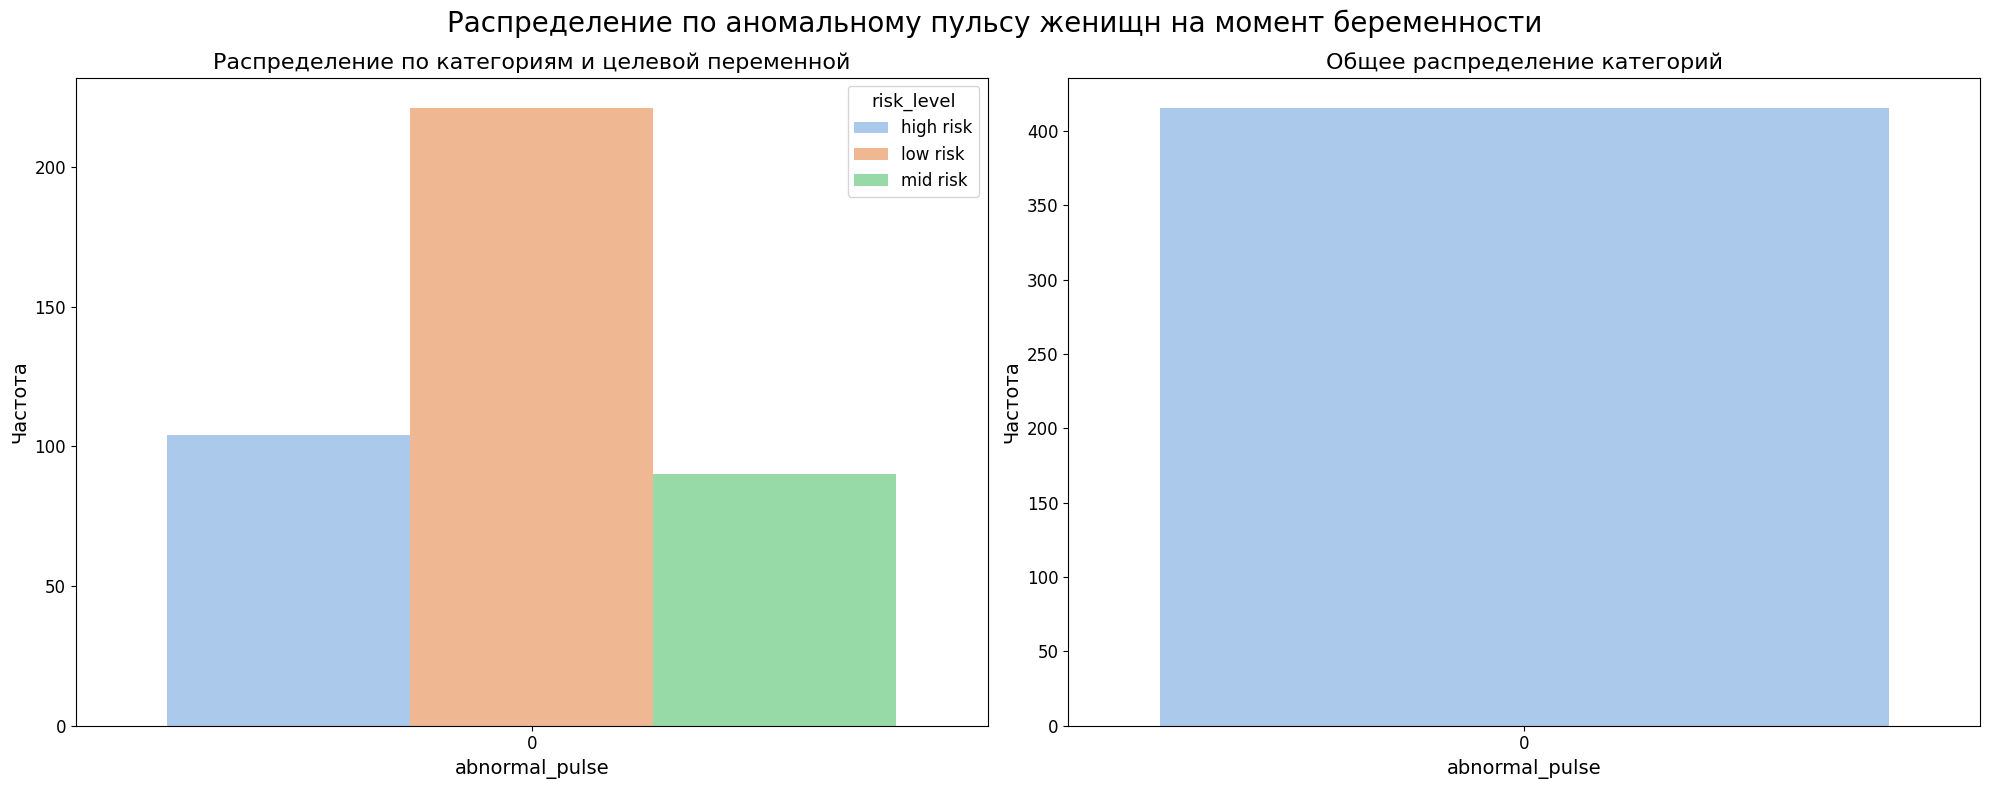

In [74]:
plot_cat_feature_by_target(df, feature='abnormal_pulse', 
                          title='Распределение по аномальному пульсу женищн на момент беременности')

- Всего 1 случай (0.24%).
- В high risk и mid risk — 0 случаев.
- В low risk — 1 случай.

Вывод: признак неинформативен. Его можно удалить.

#### hyperglycemia

- Гипергликемия (BS > 7.0 ммоль/л) - бинарный признак гипергликемии


Общее распределение признака 'hyperglycemia':
   Частота  Процент
1      251    60.48
0      164    39.52

Распределение признака 'hyperglycemia' по значениям целевой переменной 'risk_level':

risk_level = high risk:
   Частота  Процент
1       91     87.5
0       13     12.5

risk_level = low risk:
   Частота  Процент
1      123    55.66
0       98    44.34

risk_level = mid risk:
   Частота  Процент
0       53    58.89
1       37    41.11


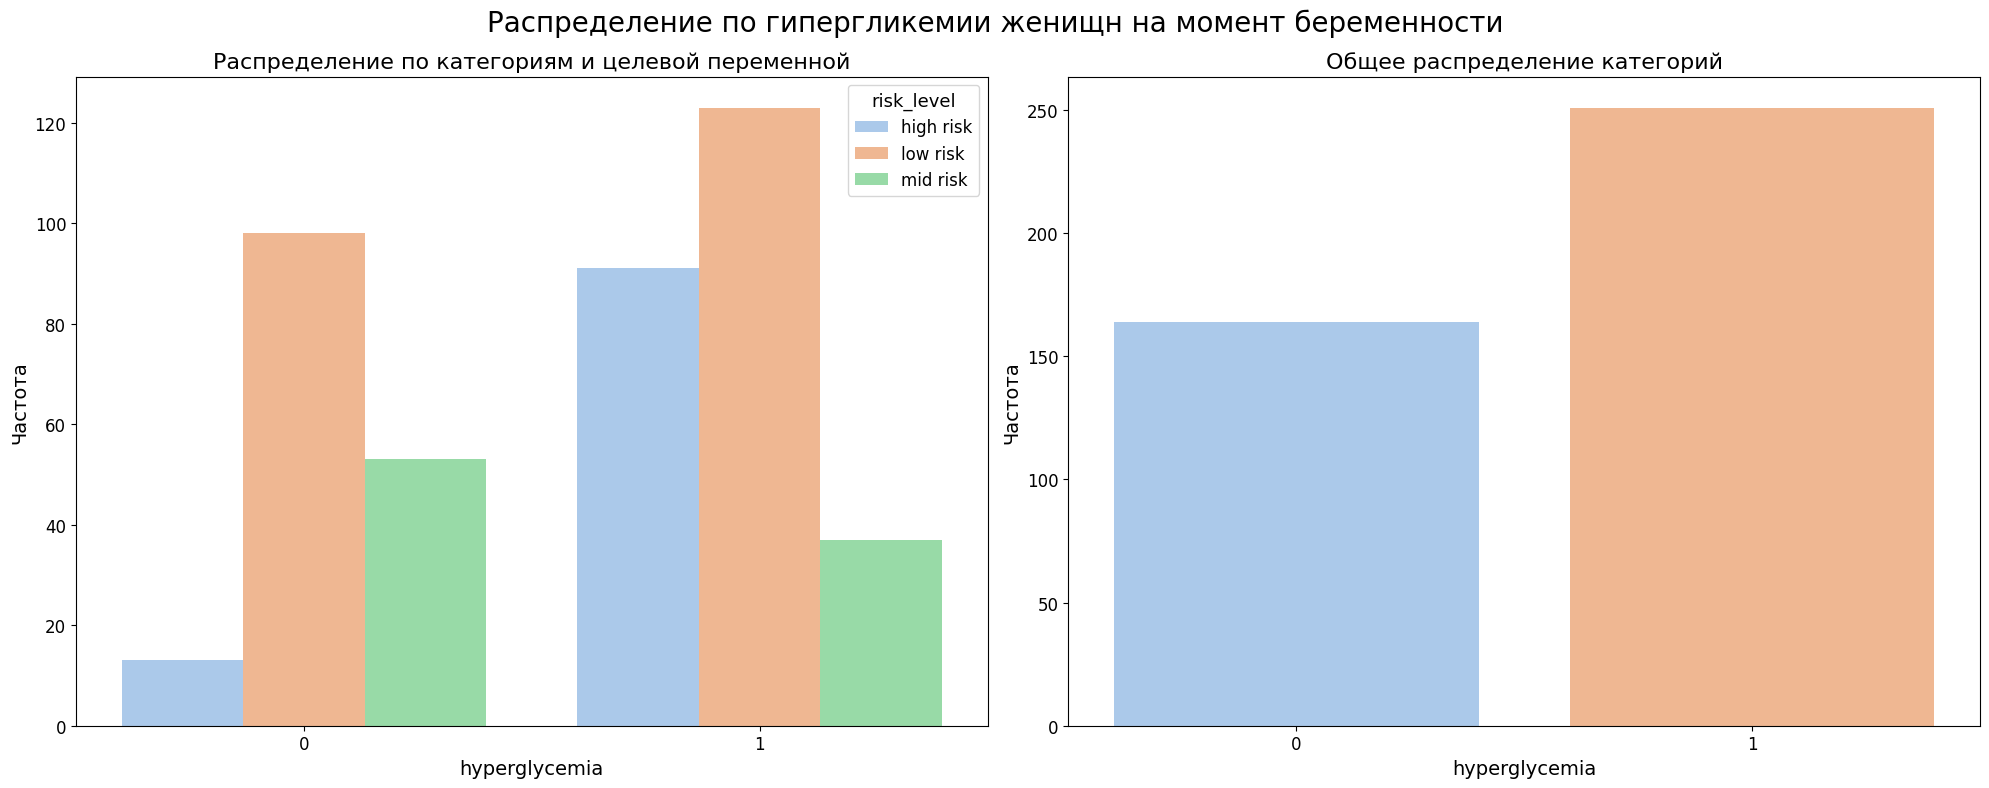

In [75]:
plot_cat_feature_by_target(df, feature='hyperglycemia', 
                          title='Распределение по гипергликемии женищн на момент беременности')

- В выборке: 60.6% пациенток имеют гипергликемию.
- High risk: 87.5%
- Low risk: 55.9%
- Mid risk: 41.1%


Гипергликемия — один из самых сильных факторов риска.
- High risk почти всегда сопровождается повышенной глюкозой.

Вывод: Hyperglycemia — мощный бинарный предиктор высокого риска.

#### bp_category

- Категории давления (AHA classification) - 4 уровня-


Общее распределение признака 'bp_category':
                     Частота  Процент
Normal                   168    40.48
Stage1_Hypertension      121    29.16
Stage2_Hypertension      101    24.34
Elevated                  25     6.02

Распределение признака 'bp_category' по значениям целевой переменной 'risk_level':

risk_level = high risk:
                     Частота  Процент
Stage2_Hypertension       45    43.27
Normal                    33    31.73
Stage1_Hypertension       21    20.19
Elevated                   5     4.81

risk_level = low risk:
                     Частота  Процент
Normal                   105    47.51
Stage1_Hypertension       64    28.96
Stage2_Hypertension       38    17.19
Elevated                  14     6.33

risk_level = mid risk:
                     Частота  Процент
Stage1_Hypertension       36    40.00
Normal                    30    33.33
Stage2_Hypertension       18    20.00
Elevated                   6     6.67


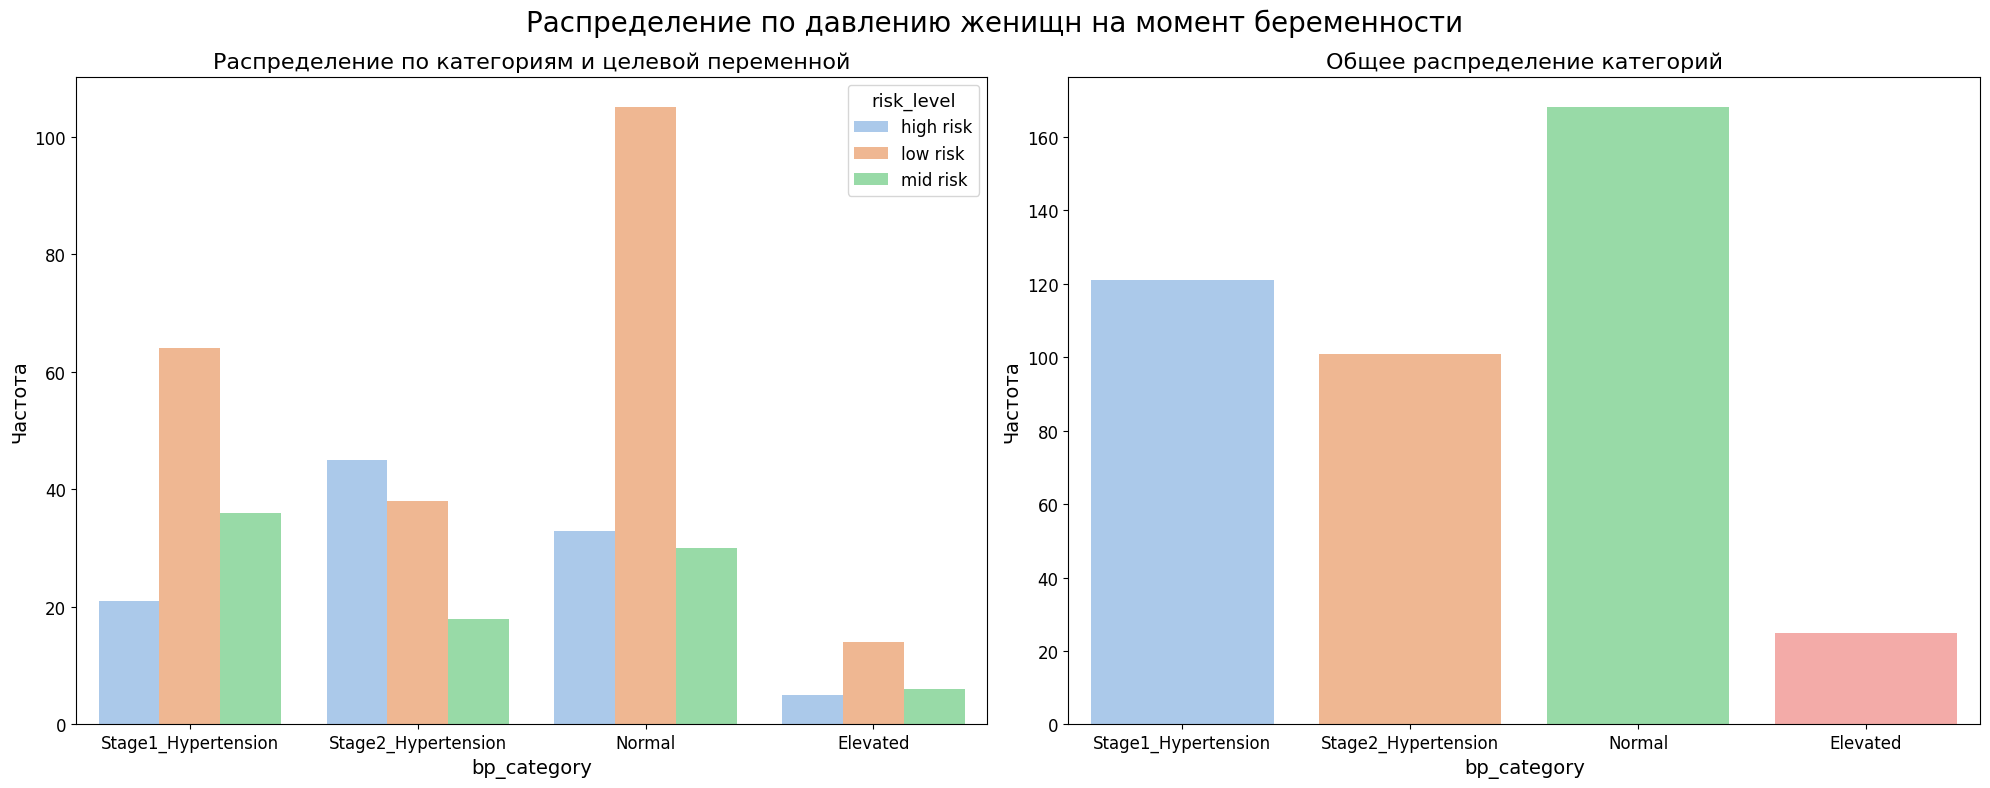

In [76]:
plot_cat_feature_by_target(df, feature='bp_category', 
                          title='Распределение по давлению женищн на момент беременности')

- bp_category: Stage2_Hypertension у 43% high risk vs 17% low risk
- High risk имеет самую высокую долю Stage2 Hypertension.
- Low risk — преимущественно нормальное давление.
- Mid risk — чаще Stage1.

Вывод: Категория давления — сильный категориальный признак риска.

#### age_group

- Категоризация возраста (5 категорий)


Общее распределение признака 'age_group':
       Частота  Процент
20-30      140    33.73
<20        115    27.71
30-40       67    16.14
50+         56    13.49
40-50       37     8.92

Распределение признака 'age_group' по значениям целевой переменной 'risk_level':

risk_level = high risk:
       Частота  Процент
20-30       25    24.04
30-40       24    23.08
<20         20    19.23
50+         18    17.31
40-50       17    16.35

risk_level = low risk:
       Частота  Процент
20-30       83    37.56
<20         69    31.22
50+         27    12.22
30-40       26    11.76
40-50       16     7.24

risk_level = mid risk:
       Частота  Процент
20-30       32    35.56
<20         26    28.89
30-40       17    18.89
50+         11    12.22
40-50        4     4.44


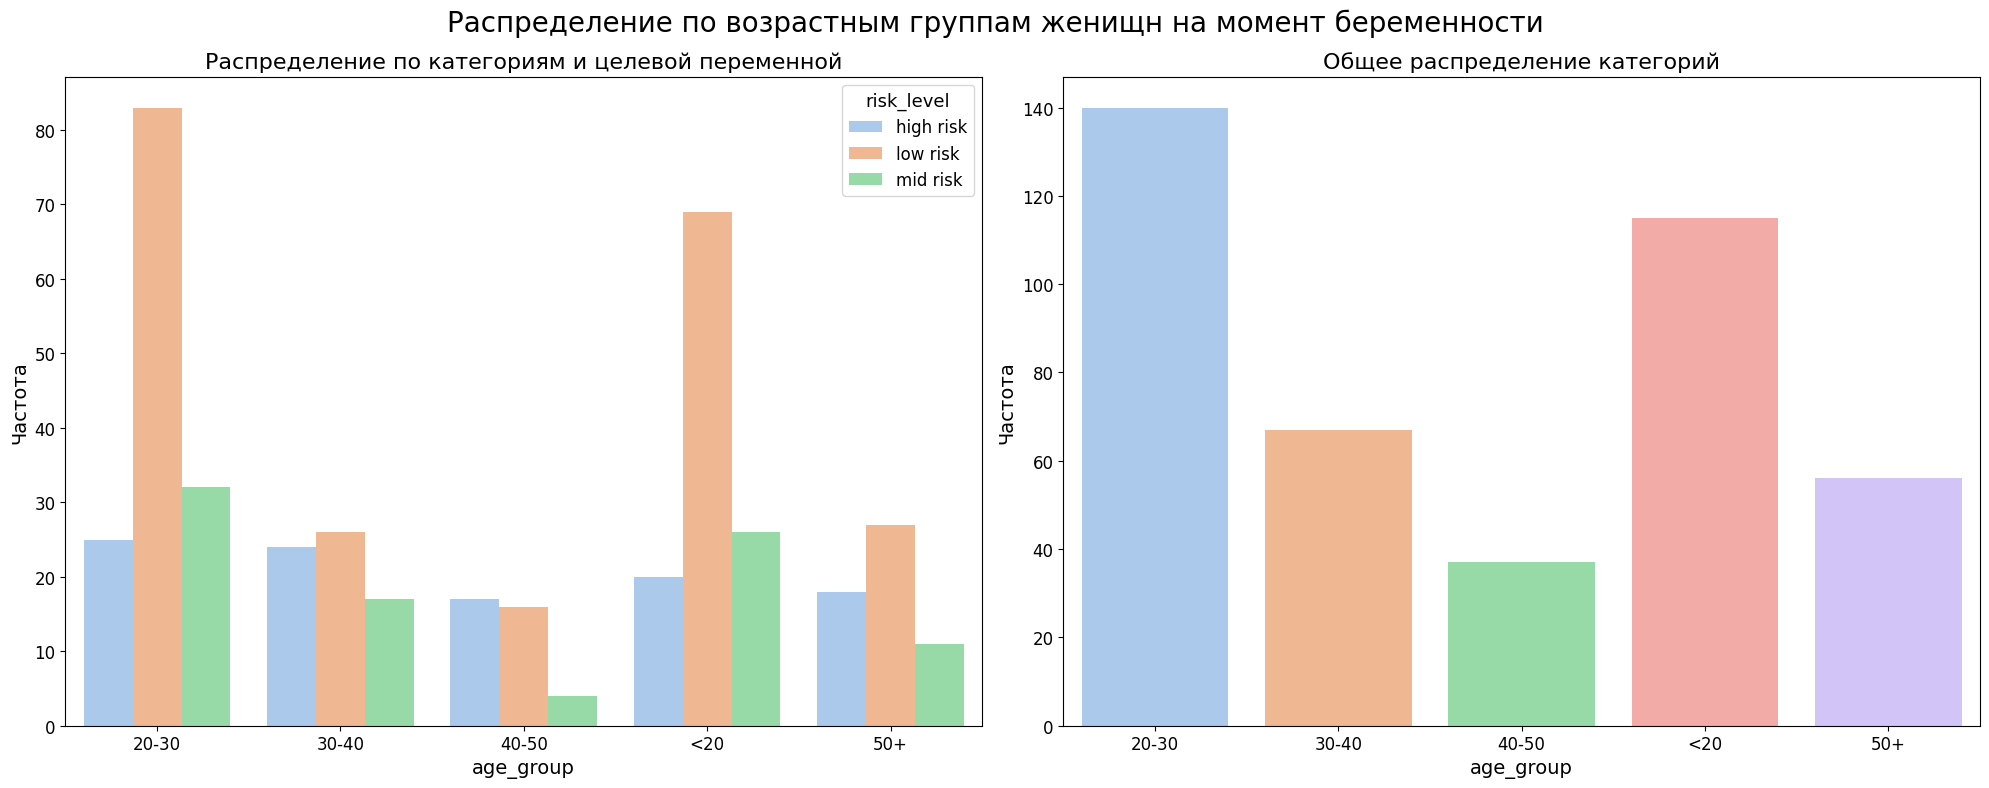

In [77]:
plot_cat_feature_by_target(df, feature='age_group', 
                          title='Распределение по возрастным группам женищн на момент беременности')

- High risk более равномерно распределён по возрастным группам.
- Low risk — преимущественно молодые (<30).
- High risk имеет заметную долю женщин 40–50 и 50+.

Вывод:
- Возрастные группы подтверждают: старший возраст повышает риск.

__✔ High risk отличается по ключевым признакам:__
- повышенное пульсовое давление
- повышенная температура
- высокая глюкоза
- гипергликемия
- Stage2 Hypertension
- старшие возрастные группы

__✔ Mid risk:__
- чаще Stage1 Hypertension
- умеренно повышенная глюкоза
- нормальная температура

✔ Low risk:
- нормальное давление
- нормальная глюкоза
- молодые возрастные группы

__✔ Наиболее сильные признаки риска:__
- Глюкоза (BS)
- Hyperglycemia
- SystolicBP / DiastolicBP
- bp_category
- Pulse Pressure
- MAP
- Возраст / age_group
- Температура / temp_deviation

### Корреляционный анализ

interval columns not set, guessing: ['age', 'systolic_bp', 'diastolic_bp', 'bs', 'body_temp', 'heart_rate', 'abnormal_pulse', 'map', 'pulse_pressure', 'temp_deviation', 'bs_to_age', 'hyperglycemia', 'target']
target            1.000000
systolic_bp       0.773523
bs                0.636831
diastolic_bp      0.563611
map               0.560910
pulse_pressure    0.478151
temp_deviation    0.442486
heart_rate        0.396206
age               0.355573
body_temp         0.294514
bs_to_age         0.278037
hyperglycemia     0.203600
bp_category       0.191786
age_group         0.185633
Name: risk_level, dtype: float64


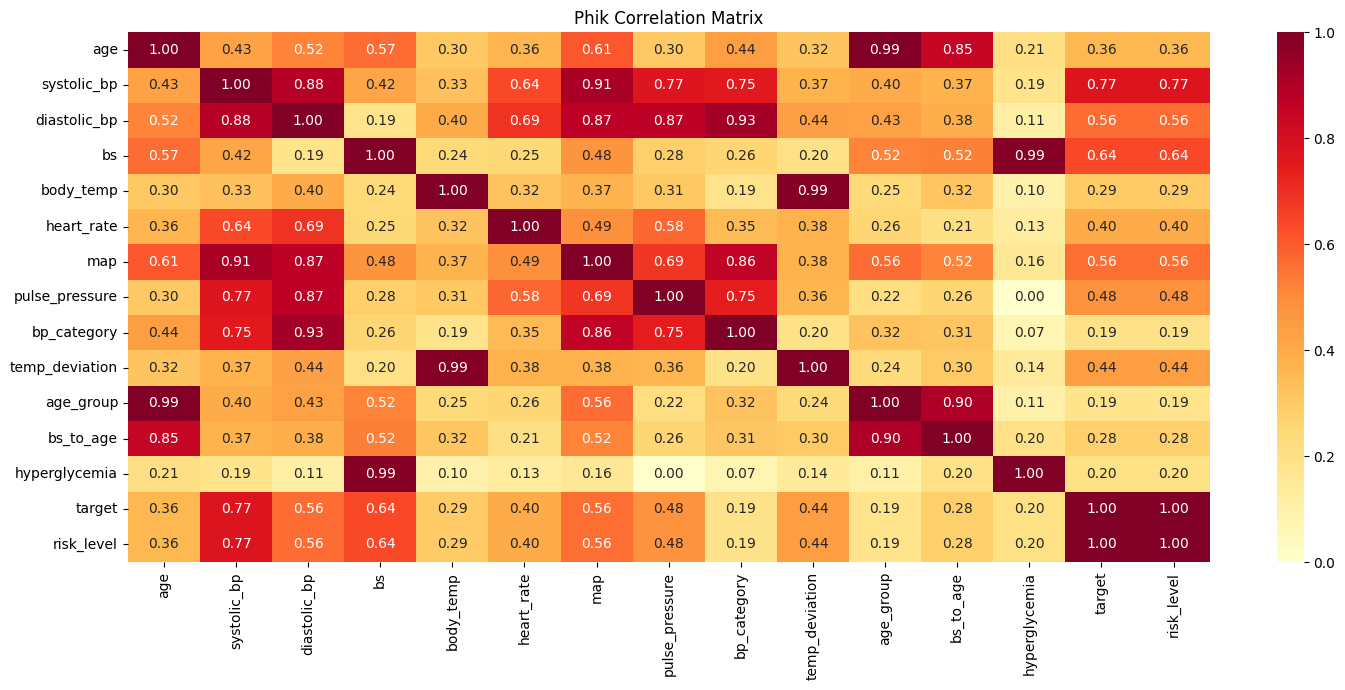

In [78]:
# Phik-матрица
phik_corr = df.phik_matrix()

# Корреляции с risk_level
print(phik_corr['risk_level'].drop('risk_level').sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(phik_corr, annot=True, fmt=".2f", cmap='YlOrRd')
plt.title('Phik Correlation Matrix')
plt.tight_layout()
plt.show()

Топ-5 признаков по связи с риском (Phi-K):
- systolic_bp: 0.773 (очень сильная связь!)
- bs: 0.637 (сильная связь)
- diastolic_bp: 0.557 (сильная связь)
- map: 0.569 (сильная связь)
- pulse_pressure: 0.478 (умеренная связь)

Вывод:
- самые сильные предикторы высокого риска — давление (SBP, DBP, MAP), глюкоза и пульсовое давление.
- температура, возраст и пульс дают дополнительный, но более слабый сигнал.

In [79]:
# Убираем risk_level и target
corr = phik_corr.drop(index=['risk_level', 'target'],
                      columns=['risk_level', 'target'],
                      errors='ignore')

# Маска по форме corr
mask = np.triu(np.abs(corr) > 0.5, k=1)

# Пары с высокой корреляцией
pairs = corr.where(mask).stack().sort_values(ascending=False)

print(pairs if not pairs.empty else "Нет пар с высокой корреляцией.")

age             age_group         0.994057
body_temp       temp_deviation    0.987726
bs              hyperglycemia     0.986733
diastolic_bp    bp_category       0.928633
systolic_bp     map               0.913616
age_group       bs_to_age         0.903944
systolic_bp     diastolic_bp      0.882978
diastolic_bp    pulse_pressure    0.874900
                map               0.874315
map             bp_category       0.862023
age             bs_to_age         0.846043
systolic_bp     pulse_pressure    0.773052
                bp_category       0.751413
pulse_pressure  bp_category       0.745586
diastolic_bp    heart_rate        0.690349
map             pulse_pressure    0.685323
systolic_bp     heart_rate        0.639467
age             map               0.605676
heart_rate      pulse_pressure    0.575129
age             bs                0.565129
map             age_group         0.562746
bs              bs_to_age         0.523833
map             bs_to_age         0.518736
bs         

Сильные зависимости:
- age ↔ age_group — 0.99
  - → категориальный признак полностью дублирует числовой.
- body_temp ↔ temp_deviation — 0.99
  - → temp_deviation = |body_temp − 98.6|, поэтому дублирование ожидаемо.
- bs ↔ hyperglycemia — 0.99
  - → бинарный признак полностью зависит от BS.
- age_group ↔ bs_to_age: 0.990 (вычислимый признак)  
- systolic_bp ↔ diastolic_bp ↔ map ↔ pulse_pressure ↔ bp_category  
  - → давление и производные признаки образуют кластер высокой корреляции.

### Попарные графики (pairplot) для признаков

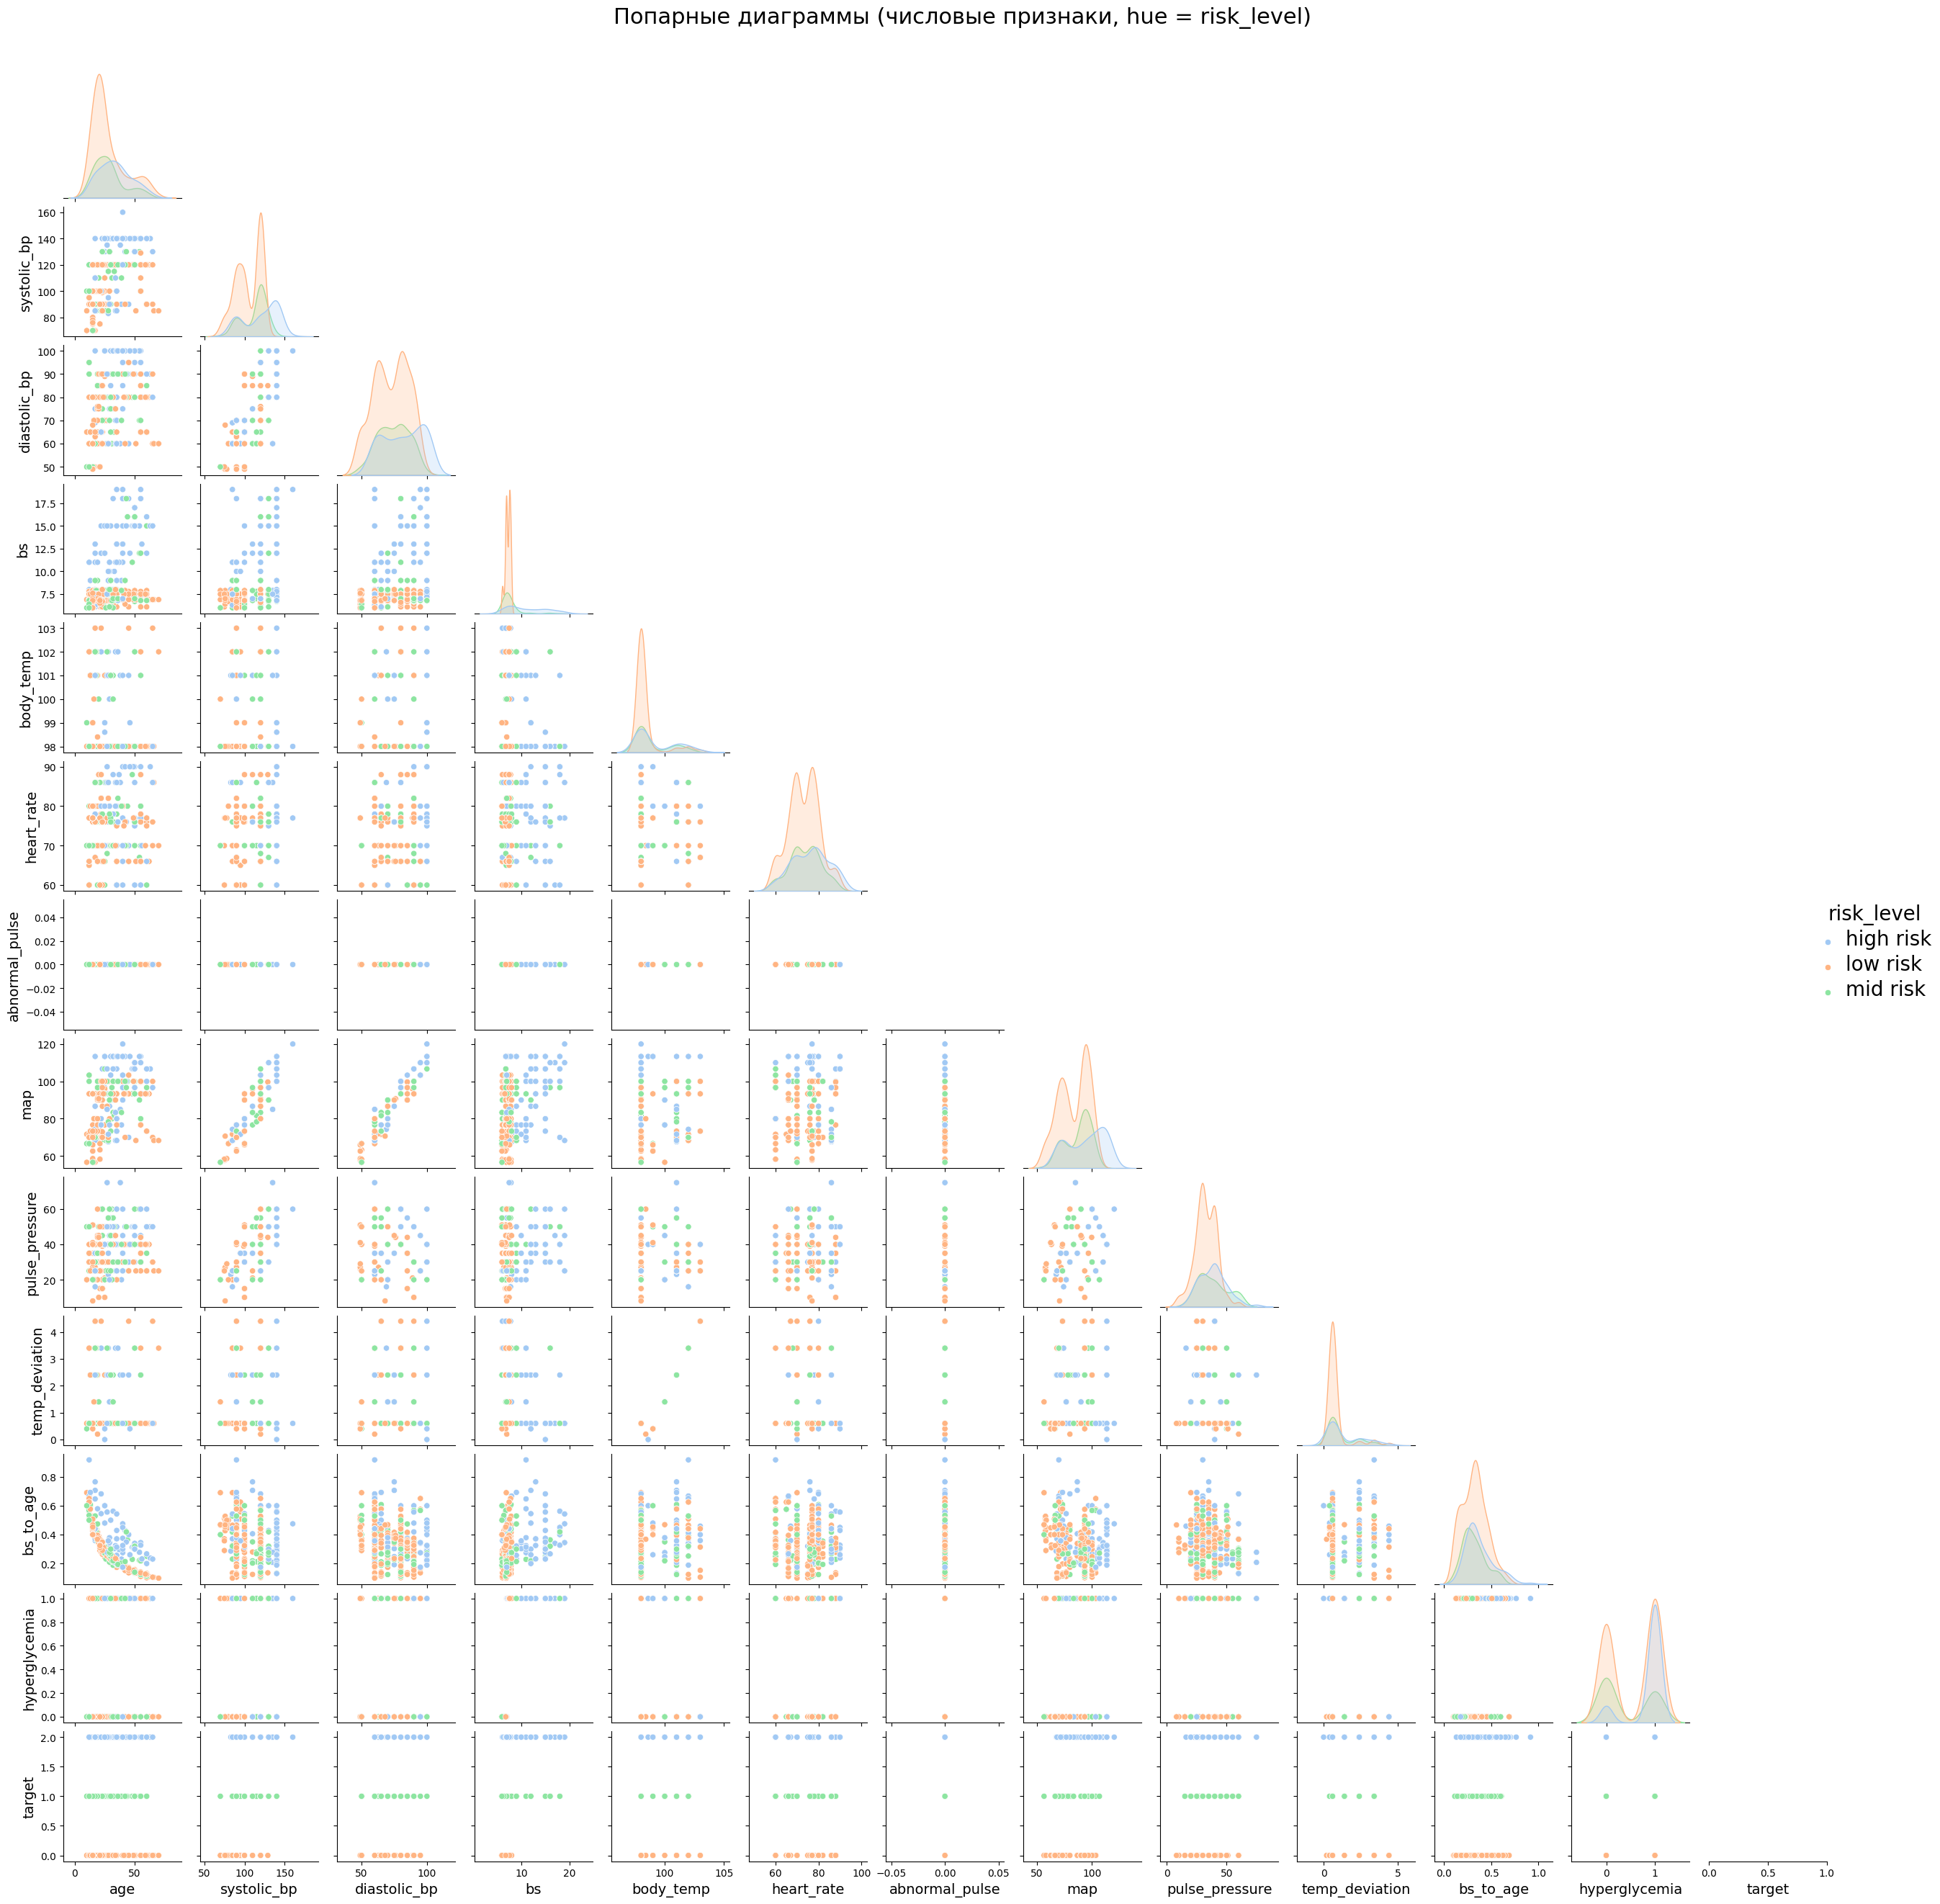

In [80]:
# Числовые признаки 
numeric_cols = df.select_dtypes(include='number').columns

# Pairplot с заливкой по risk_level
g = sns.pairplot(
    df[numeric_cols.tolist() + ['risk_level']],
    hue='risk_level',
    palette='pastel',
    diag_kind='kde',
    height=2,
    corner=True
)

# Увеличение подписей осей
for ax in g.axes.flatten():
    if ax:
        ax.set_xlabel(ax.get_xlabel(), fontsize=14)
        ax.set_ylabel(ax.get_ylabel(), fontsize=14)

# Легенда
g._legend.set_title('risk_level')
plt.setp(g._legend.get_texts(), fontsize=20)
g._legend.get_title().set_fontsize(20)

plt.suptitle('Попарные диаграммы (числовые признаки, hue = risk_level)', fontsize=22, y=1.02)
plt.show()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             415 non-null    int64  
 1   systolic_bp     415 non-null    int64  
 2   diastolic_bp    415 non-null    int64  
 3   bs              415 non-null    float64
 4   body_temp       415 non-null    float64
 5   heart_rate      415 non-null    int64  
 6   abnormal_pulse  415 non-null    int32  
 7   map             415 non-null    float64
 8   pulse_pressure  415 non-null    int64  
 9   bp_category     415 non-null    object 
 10  temp_deviation  415 non-null    float64
 11  age_group       415 non-null    object 
 12  bs_to_age       415 non-null    float64
 13  hyperglycemia   415 non-null    int32  
 14  target          415 non-null    int64  
 15  risk_level      415 non-null    object 
dtypes: float64(5), int32(2), int64(6), object(3)
memory usage: 48.8+ KB


In [82]:
def plot_two_features(df, x, y, hue='risk_level'):
    plt.figure(figsize=(12, 4))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, palette='pastel')
    plt.title(f'{x} vs {y} (заливка по {hue})')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title=hue)
    plt.tight_layout()
    plt.show()

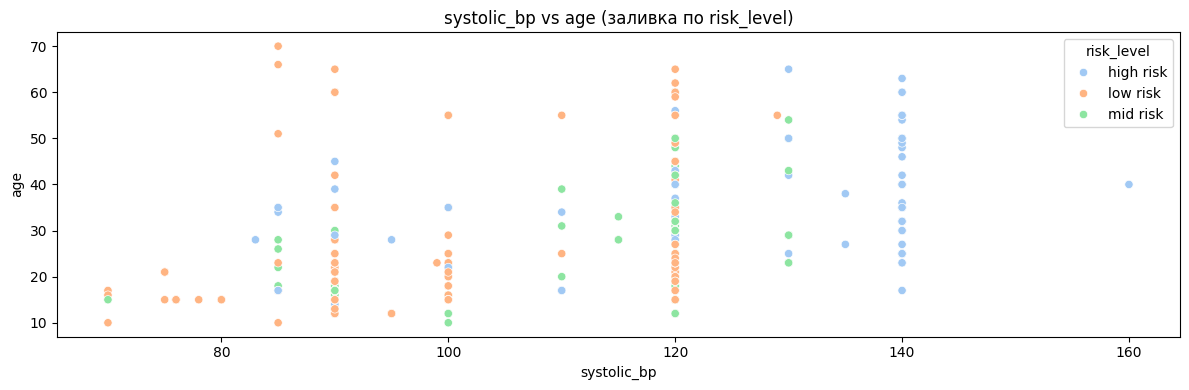

In [83]:
plot_two_features(df, 'systolic_bp','age' )

часть High risk отделяется от low risk  высокими значениями systolic_bp

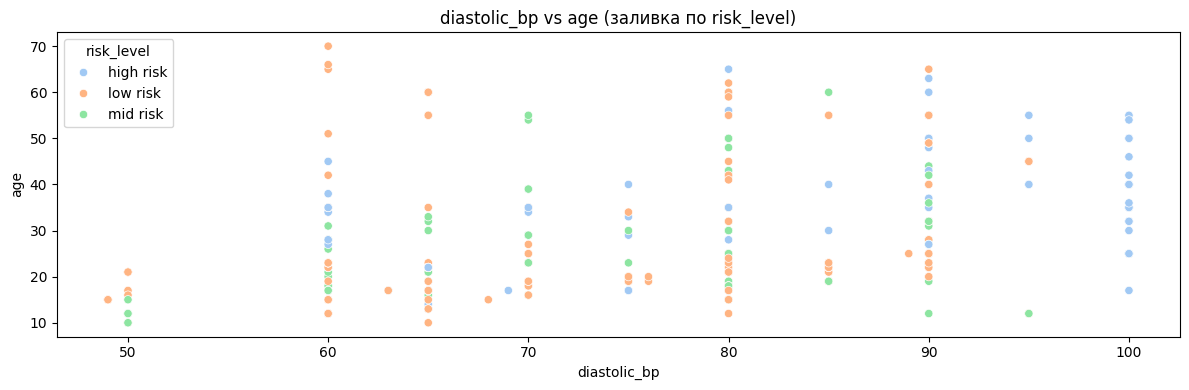

In [84]:
plot_two_features(df, 'diastolic_bp','age' )

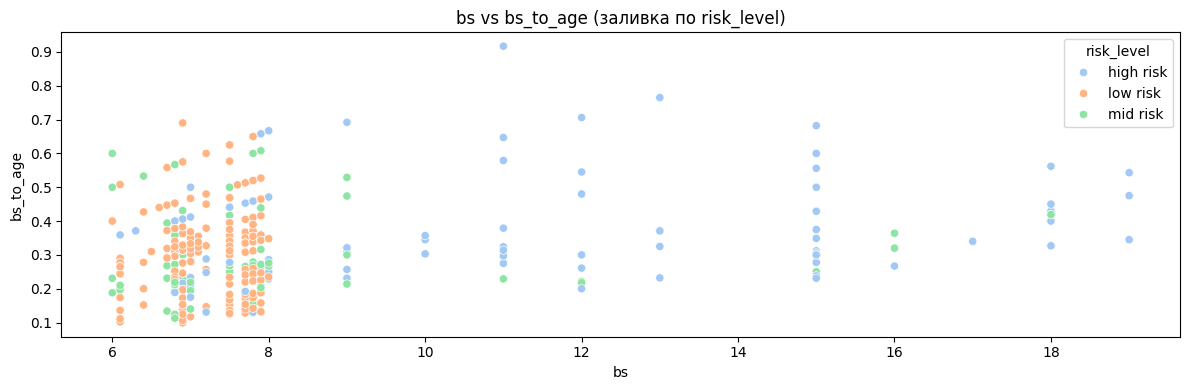

In [85]:
plot_two_features(df, 'bs', 'bs_to_age')

часть High risk отделяется от low risk  значениями bs выше 8

- High risk — высокие BS при любом возрасте.
- Low risk — BS строго в норме, даже у возрастных пациенток.

__Гипергликемия опасна в любом возрасте__

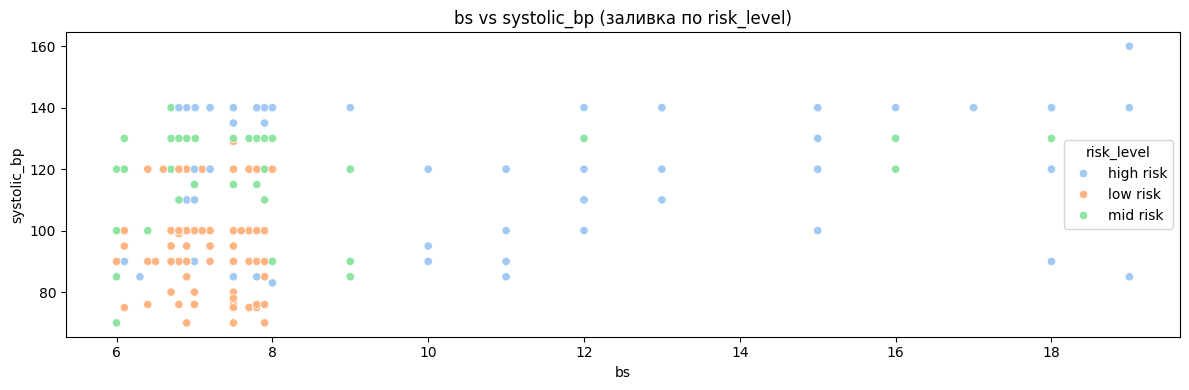

In [86]:
plot_two_features(df, 'bs', 'systolic_bp')

часть High risk отделяется от low risk  значениями bs выше 8 и systolic_bp выше 80

High risk — чёткий кластер: высокая глюкоза.

Low risk — низкое давление + нормальная глюкоза.



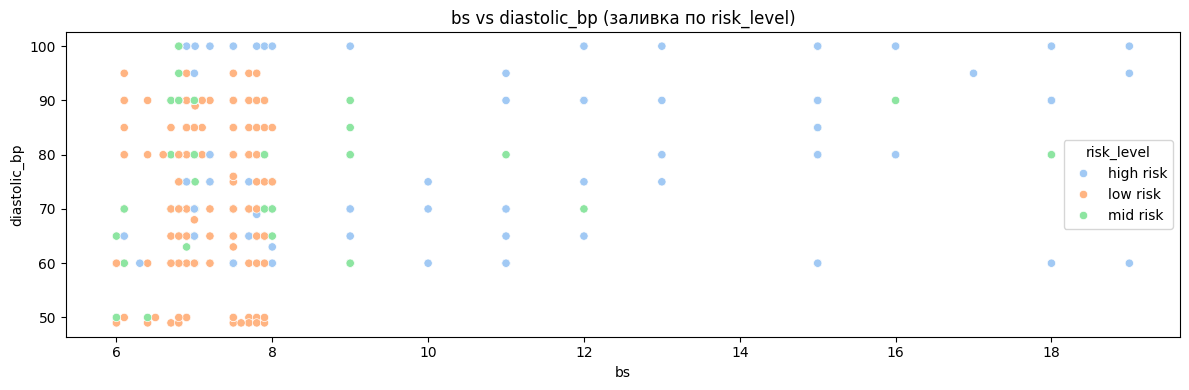

In [87]:
plot_two_features(df, 'bs', 'diastolic_bp')

часть High risk отделяется от low risk  значениями bs выше 8 и diastolic_bp выше 55

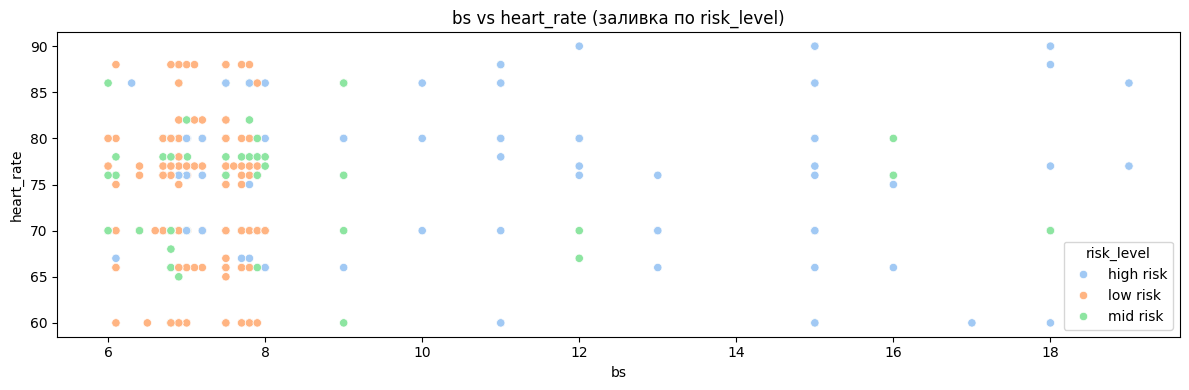

In [88]:
plot_two_features(df, 'bs', 'heart_rate')

часть High risk отделяется от low risk  значениями bs выше 8

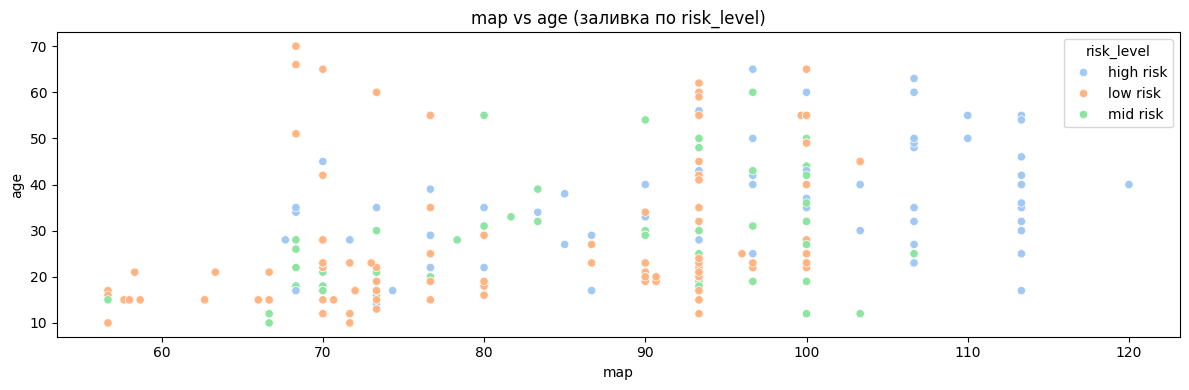

In [89]:
plot_two_features(df, 'map', 'age')

часть High risk отделяется от low risk  значениями map выше 100

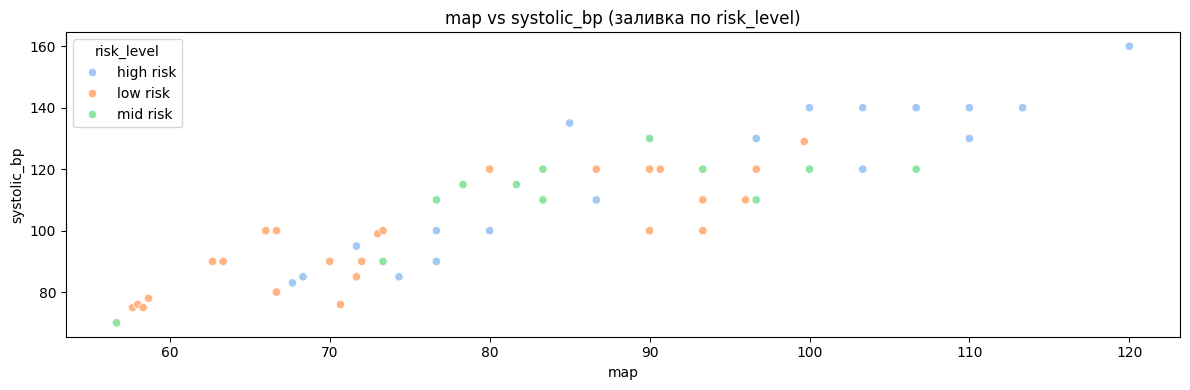

In [90]:
plot_two_features(df, 'map', 'systolic_bp')

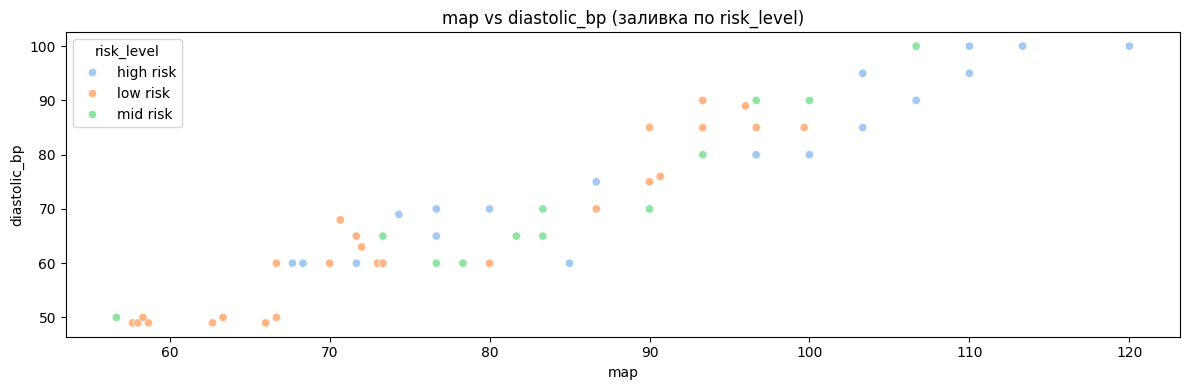

In [91]:
plot_two_features(df, 'map', 'diastolic_bp')

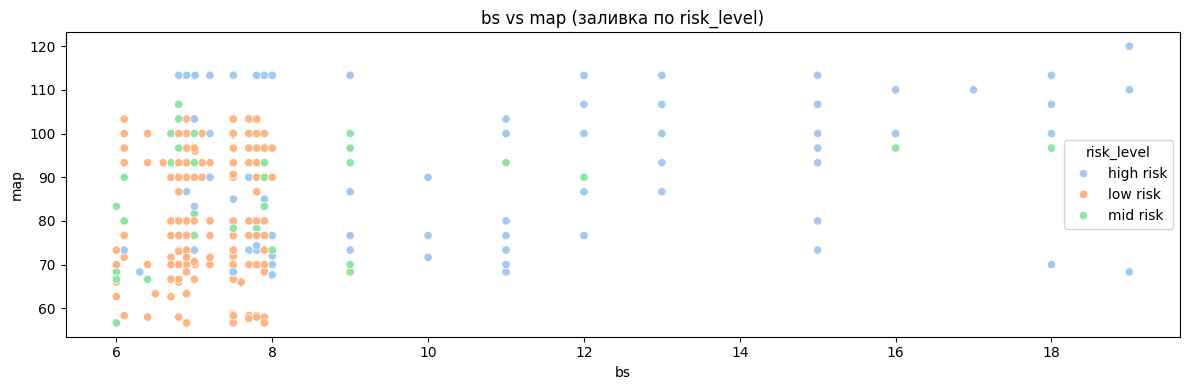

In [92]:
plot_two_features(df, 'bs', 'map')

часть High risk отделяется от low risk  значениями bs больше 8 и map выше 70

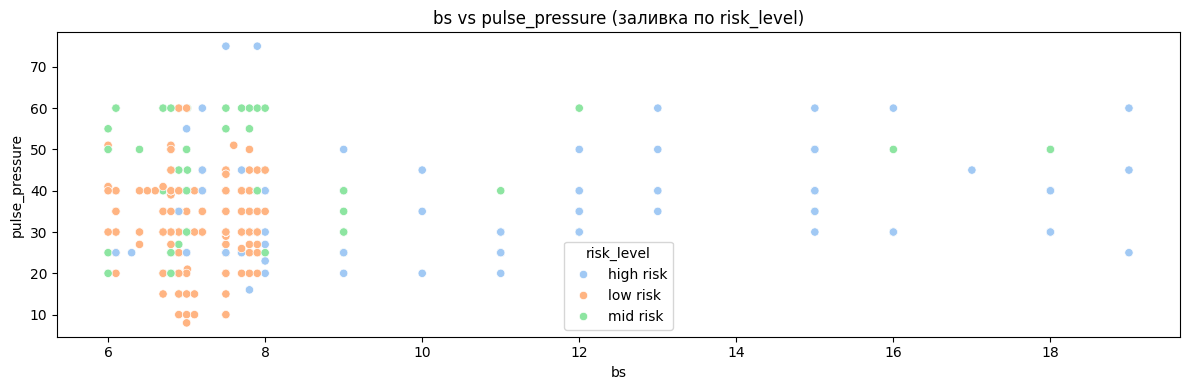

In [93]:
plot_two_features(df, 'bs','pulse_pressure' )

часть High risk отделяется от low risk  значениями bs больше 8 и pulse_pressure выше 15

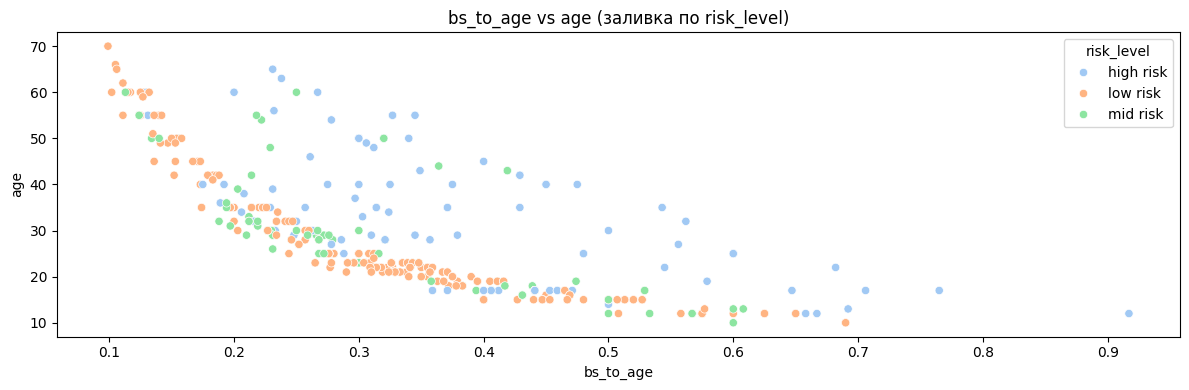

In [94]:
plot_two_features(df, 'bs_to_age', 'age')

выделяется явная граница между двумя областями точек

### Анализ признаков по классам риска

In [95]:
# Список числовых признаков
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# Убираем target, чтобы не дублировать risk_level
if 'target' in num_cols:
    num_cols.remove('target')

print("Числовые признаки:", num_cols)

Числовые признаки: ['age', 'systolic_bp', 'diastolic_bp', 'bs', 'body_temp', 'heart_rate', 'abnormal_pulse', 'map', 'pulse_pressure', 'temp_deviation', 'bs_to_age', 'hyperglycemia']


In [96]:
# --- 1. Средние значения  ---
mean_table = df.groupby('risk_level')[num_cols].mean().T.round(3)
print("\n Средние значения по классам риска")
display(mean_table)


 Средние значения по классам риска


risk_level      high risk  low risk  mid risk
age                33.510    27.620    28.211
systolic_bp       120.365   105.054   112.833
diastolic_bp       81.702    72.597    74.422
bs                 11.350     7.197     7.737
body_temp          99.256    98.382    98.911
heart_rate         76.231    73.086    73.722
abnormal_pulse      0.000     0.000     0.000
map                94.589    83.416    87.225
pulse_pressure     38.663    32.457    38.411
temp_deviation      1.394     0.837     1.151
bs_to_age           0.374     0.319     0.315
hyperglycemia       0.875     0.557     0.411

In [97]:
# --- 2. Медианы по классам ---
median_table = df.groupby('risk_level')[num_cols].median().T.round(3)
print("\n Медианы по классам риска ")
display(median_table)


 Медианы по классам риска 


risk_level      high risk  low risk  mid risk
age                32.500    23.000    26.500
systolic_bp       120.000   100.000   120.000
diastolic_bp       80.000    75.000    75.000
bs                 11.000     7.200     6.900
body_temp          98.000    98.000    98.000
heart_rate         77.000    75.000    76.000
abnormal_pulse      0.000     0.000     0.000
map                98.335    90.000    90.000
pulse_pressure     40.000    30.000    40.000
temp_deviation      0.600     0.600     0.600
bs_to_age           0.324     0.323     0.298
hyperglycemia       1.000     1.000     0.000

In [98]:
# --- 3. Стандартные отклонения (транспонированные) ---
std_table = df.groupby('risk_level')[num_cols].std().T.round(3)
print("\nСтандартные отклонения по классам риска ")
display(std_table)


Стандартные отклонения по классам риска 


risk_level      high risk  low risk  mid risk
age                13.310    14.060    12.551
systolic_bp        21.174    15.589    15.104
diastolic_bp       14.970    13.152    11.858
bs                  3.955     0.514     2.148
body_temp           1.719     1.136     1.458
heart_rate          8.451     7.013     7.128
abnormal_pulse      0.000     0.000     0.000
map                16.402    13.344    11.628
pulse_pressure     11.585     9.060    12.471
temp_deviation      1.194     0.797     0.941
bs_to_age           0.149     0.132     0.122
hyperglycemia       0.332     0.498     0.495

In [99]:
# --- 4. Разница средних (high - low) ---
diff_table = (df.groupby('risk_level')[num_cols].mean().loc['high risk']
              - df.groupby('risk_level')[num_cols].mean().loc['low risk'])
diff_table = diff_table.sort_values(ascending=False).round(3)

print("\n Разница средних значений (high risk - low risk)")
display(diff_table)


 Разница средних значений (high risk - low risk)


systolic_bp       15.311
map               11.173
diastolic_bp       9.105
pulse_pressure     6.206
age                5.890
bs                 4.153
heart_rate         3.145
body_temp          0.874
temp_deviation     0.557
hyperglycemia      0.318
bs_to_age          0.054
abnormal_pulse     0.000
dtype: float64

Абсолютная разница средних (high - low):
- systolic_bp: +15.3 мм рт.ст.
- map: +11.2
- diastolic_bp: +9.1
- pulse_pressure: +6.2
- age: +5.9 лет
- bs: +4.15 ммоль/л

Вывод:
- High risk отличается от low risk по всем ключевым физиологическим параметрам

In [100]:
cat_cols = ['bp_category', 'age_group', 'hyperglycemia']

for col in cat_cols:
    print(f"\n Категориальный признак: {col}")
    display(df.groupby(['risk_level', col]).size().unstack().fillna(0))


 Категориальный признак: bp_category


bp_category  Elevated  Normal  Stage1_Hypertension  Stage2_Hypertension
risk_level                                                             
high risk           5      33                   21                   45
low risk           14     105                   64                   38
mid risk            6      30                   36                   18


 Категориальный признак: age_group


age_group   20-30  30-40  40-50  50+  <20
risk_level                               
high risk      25     24     17   18   20
low risk       83     26     16   27   69
mid risk       32     17      4   11   26


 Категориальный признак: hyperglycemia


hyperglycemia   0    1
risk_level            
high risk      13   91
low risk       98  123
mid risk       53   37

✔ bp_category
- High risk → Stage2 Hypertension
- Low risk → Normal

✔ hyperglycemia
- High risk → 87.5%
- Low risk → 55.9%

Вывод:
- Категориальные признаки разделяют классы и усиливают сигнал количественных.

### Выявление ключевых паттернов

✔ Показатели, чаще встречающиеся у high risk:
- Высокое систолическое давление (120–160)
- Высокое диастолическое давление (80–100)
- Высокий MAP (90–120)
- Высокая глюкоза (10–19 ммоль/л)
- Гипергликемия (87.5%)
- Повышенная температура (99–101°F)
- Высокое пульсовое давление (40–75)
- Возраст 30–50+

✔ Наиболее опасные комбинации признаков:
- Высокое давление + высокая глюкоза  
  - → самый сильный паттерн high risk.
- Stage2 Hypertension + hyperglycemia  
  - → почти всегда high risk.
- Возраст 40–50 + повышенное давление  
  - → риск резко возрастает.
- Температура > 99°F + гипергликемия  
  → возможные осложнения (инфекции + диабет).
- Высокий MAP + высокий pulse_pressure  
  - → выраженная сосудистая нагрузка.

📊 Статистика по классам (ключевые отличия):
- High risk профиль:
  - Возраст: 33.5 лет (на 5.9 лет старше low risk)
  - Давление: 120/82 (гипертензия)
  - Глюкоза: 11.35 (тяжёлая гипергликемия)
  - Гипергликемия: 87.5% случаев
  - Stage2 Hypertension: 43.3%
- Low risk профиль:
  - Возраст: 27.6 лет
  - Давление: 105/73 (норма/предгипертензия)
  - Глюкоза: 7.20 (норма/пограничная)
  - Гипергликемия: 55.9%
  - Normal BP: 47.3%
- Mid risk (промежуточный):
  - Показатели между high и low

---


__Выводы по шагу 3__:

__1. Классы риска распределены умеренно несбалансированно__
- low risk — 53%
- mid risk — 22%
- high risk — 25%
  - Соотношение: 2.5:1.2:1 → Потребуется class_weight='balanced'

__2. Признаки:__

Количественные признаки
- Возраст (age):
  - Средний возраст в группе высокого риска (~33.5 лет) выше, чем в низком (~27.6 лет).
- Давление (SystolicBP, DiastolicBP, MAP):
  - У пациенток с высоким риском значения значительно выше (систолическое ~120, диастолическое ~82).
- MAP и пульсовое давление также сильно связаны с риском.
- Глюкоза (BS):
  - Самый сильный индикатор: у high risk среднее значение ~11.35 ммоль/л (гипергликемия), у low risk — ~7.2 ммоль/л (норма).
- Температура (body_temp):
  - У high risk средняя температура выше (~99.3°F), возможный признак воспаления/инфекции.
- Пульс (heart_rate):
  - Различия небольшие, но у high risk пульс немного выше (~76 уд/мин).
  
Категориальные признаки:
- bp_category:
  - У high risk преобладает Stage2 Hypertension (43.3%), у low risk — Normal (47.5%).
- hyperglycemia:
  - 87.5% пациенток с high risk имеют гипергликемию, против 55.9% в low risk.
- age_group:
  - Подтверждает, что старший возраст (>30 лет) чаще связан с высоким риском.  

__3. Типы рисков__

High risk имеет чёткий медицинский профиль
- значительно повышенное давление (SBP, DBP, MAP)
  - Давление: 120/82 mmHg (гипертензия Stage 1-2)
- высокая глюкоза (BS)
  - Глюкоза: 11.35 mmol/L (тяжелая гипергликемия, норма <7.8)
- 87.5% имеют гипергликемию (BS > 7.0)
- повышенная температура: 99.3°F (субфебрильная/лихорадка, норма 98.6)
- старший возраст (30–50+)
  - Возраст: 33.5 лет (на 6 лет старше low risk)
- высокое пульсовое давление
  - Пульс: 76 уд/мин (слегка повышен)
- Это ключевые признаки, отличающие high risk от остальных.

High risk беременности характеризуется четким медицинским профилем:
- Гипергликемия (BS > 10 mmol/L) — присутствует в 87.5% случаев
- Гипертензия (BP ≥ 140/90) — Stage2 в 43% случаев
- Субфебрильная температура (99-101°F) — признак осложнений
- Возраст 30+ — риск увеличивается с возрастом

Mid risk — промежуточная группа
- давление выше нормы, но ниже high risk
- глюкоза слегка повышена
- температура чаще нормальная
- возраст ближе к low risk

__4. Выбросы — медицински значимые, удалять нельзя__
- высокие BS (до 19) — гипергликемия
- высокое давление — гипертензия
- температура 99–103°F — лихорадка
- возраст 60–70 — поздняя беременность

__5. Топ-6 наиболее значимых признаков:__
- systolic_bp (φk=0.77, diff=+15.3) — сильнейший предиктор
- bs (φk=0.64, diff=+4.15) — главный медицинский индикатор
- diastolic_bp (φk=0.56, diff=+9.1) — важный показатель
- map (φk=0.57, diff=+11.2) — хороший медицинский агрегат
- pulse_pressure (φ 0.478, diff=+6.206)
- age (φk=0.36, diff=+5.9) — демографический фактор
  - BS (глюкоза) и SystolicBP (давление) — два ключевых фактора риска

__6. Признаки для удаления:__
- Бесполезные/проблемные
  - 'abnormal_pulse', 0.24% вариации
  - 'temp_deviation', 'body_temp' 77% одинаковых значений
    ,        # те же проблемы
- Сильно коррелирующие (можно удалить или оставить для tree-based)
  - 'age_group',        # φk=0.99 с age
  - 'hyperglycemia',    # φk=0.99 с bs
  - 'map',              # φk=0.91 с systolic_bp
  
__7. Четкое разделение классов по осям:__
- bs vs systolic_bp: High risk формирует кластер в правом верхнем углу
- bs vs age: Гипергликемия опасна в любом возрасте
- map vs bs: Давление + глюкоза = максимальный риск
- bs_to_age vs age: Выделяется граница между областями  

__8. Ключевые паттерны высокого риска__
- Высокое давление + высокая глюкоза — самая опасная комбинация - почти всегда high risk
- Stage2 Hypertension + hyperglycemia — максимальный риск
- Возраст 40–50 + повышенное давление — риск резко возрастает.
- Лихорадка (>99°F) + Гипергликемия → Возможные осложнения
- Высокий MAP + Высокое Pulse Pressure → Сосудистая нагрузка

Комбинация высокого давления и высокой глюкозы — самый опасный паттерн, требующий немедленного медицинского вмешательства.
Модель сможет эффективно различать классы благодаря четким различиям в физиологических показателях.

## Шаг 4. Проверка статистических гипотез <a class="anchor" id="ch4"></a>

### H1. Средние значения признаков отличаются между группами риска

__Формулировка гипотезы__

Для каждого количественного признака:
- H0: Средние значения признака одинаковы в группах low, mid, high.
- H1: Хотя бы одна группа имеет среднее значение, отличающееся от других.

Выбор теста
- Распределения не нормальные → Краскел–Уоллис (непараметрический ANOVA).

In [101]:
features = ['age','systolic_bp','diastolic_bp','bs','body_temp','heart_rate',
            'map','pulse_pressure','temp_deviation','bs_to_age']

results_H1 = {}

for f in features:
    g1 = df[df['risk_level']=='low risk'][f]
    g2 = df[df['risk_level']=='mid risk'][f]
    g3 = df[df['risk_level']=='high risk'][f]
    
    stat, p = kruskal(g1, g2, g3)
    
    # Сохраняем p-value
    results_H1[f] = p
    
    # Интерпретация
    if p < 0.05:
        print(f"{f}: p = {p:.4f} → отвергаем H0 (группы различаются)")
    else:
        print(f"{f}: p = {p:.4f} → не отвергаем H0 (различий не найдено)")

# Таблица p-value
pd.DataFrame.from_dict(results_H1, orient='index', columns=['p-value'])

age: p = 0.0000 → отвергаем H0 (группы различаются)
systolic_bp: p = 0.0000 → отвергаем H0 (группы различаются)
diastolic_bp: p = 0.0000 → отвергаем H0 (группы различаются)
bs: p = 0.0000 → отвергаем H0 (группы различаются)
body_temp: p = 0.0000 → отвергаем H0 (группы различаются)
heart_rate: p = 0.0045 → отвергаем H0 (группы различаются)
map: p = 0.0000 → отвергаем H0 (группы различаются)
pulse_pressure: p = 0.0000 → отвергаем H0 (группы различаются)
temp_deviation: p = 0.0000 → отвергаем H0 (группы различаются)
bs_to_age: p = 0.0155 → отвергаем H0 (группы различаются)


p-value
age             4.027379e-05
systolic_bp     2.763123e-11
diastolic_bp    4.168940e-06
bs              7.869152e-25
body_temp       2.260350e-07
heart_rate      4.470776e-03
map             1.752343e-08
pulse_pressure  1.085222e-05
temp_deviation  4.870596e-07
bs_to_age       1.553837e-02

- Каждая метрика (давление, глюкоза, температура, возраст и т.д.) вносит вклад в разделение классов.
- Модель классификации имеет сильную основу: признаки не «шумовые», а реально отражают различия между low / mid / high risk.
- Особенно сильные различия — у давления и глюкозы.

__Вывод:__ ✅ Все количественные признаки статистически значимо различаются между группами риска.

### H2. Распределение артериального давления отличается между high risk и low risk

__Формулировка__
- H0: Распределения давления одинаковы в группах high и low.
- H1: Распределения различаются.

Тест
- Манн–Уитни U-тест (двусторонний).

In [102]:
bp_features = ['systolic_bp','diastolic_bp','map','pulse_pressure']

results_H2 = {}

for f in bp_features:
    high = df[df['risk_level']=='high risk'][f]
    low  = df[df['risk_level']=='low risk'][f]
    
    stat, p = mannwhitneyu(high, low, alternative='two-sided')
    results_H2[f] = p
    
    # Интерпретация результата
    if p < 0.05:
        print(f"{f}: p = {p:.4f} → отвергаем H0 (группы различаются)")
    else:
        print(f"{f}: p = {p:.4f} → не отвергаем H0 (различий не найдено)")

# Таблица p-value
pd.DataFrame.from_dict(results_H2, orient='index', columns=['p-value'])

systolic_bp: p = 0.0000 → отвергаем H0 (группы различаются)
diastolic_bp: p = 0.0000 → отвергаем H0 (группы различаются)
map: p = 0.0000 → отвергаем H0 (группы различаются)
pulse_pressure: p = 0.0000 → отвергаем H0 (группы различаются)


p-value
systolic_bp     1.546475e-10
diastolic_bp    1.029762e-06
map             5.273528e-09
pulse_pressure  1.361054e-05

- High risk и low risk — две статистически разные популяции по давлению.
- Это подтверждает медицинский факт: гипертензия — ключевой фактор риска осложнений беременности.

__Вывод:__ ✅ Распределения всех показателей давления значимо различаются между high risk и low risk.

### H3. Пациентки high risk имеют более высокое давление, чем остальные

__Формулировка__
- H0: Среднее давление high risk ≤ среднего давления остальных.
- H1: Среднее давление high risk > среднего давления остальных.

Тест
- Распределения не нормальные → односторонний Манн–Уитни.

In [103]:
results_H3 = {}

others = df[df['risk_level'] != 'high risk']

for f in bp_features:
    high = df[df['risk_level'] == 'high risk'][f]
    rest = others[f]
    
    stat, p = mannwhitneyu(high, rest, alternative='greater')
    results_H3[f] = p
    
    # Интерпретация результата
    if p < 0.05:
        print(f"{f}: p = {p:.4f} → отвергаем H0 (значения у high risk БОЛЬШЕ, чем у остальных)")
    else:
        print(f"{f}: p = {p:.4f} → не отвергаем H0 (нет доказательств, что high risk выше остальных)")

# Таблица p-value
pd.DataFrame.from_dict(results_H3, orient='index', columns=['p-value'])

systolic_bp: p = 0.0000 → отвергаем H0 (значения у high risk БОЛЬШЕ, чем у остальных)
diastolic_bp: p = 0.0000 → отвергаем H0 (значения у high risk БОЛЬШЕ, чем у остальных)
map: p = 0.0000 → отвергаем H0 (значения у high risk БОЛЬШЕ, чем у остальных)
pulse_pressure: p = 0.0004 → отвергаем H0 (значения у high risk БОЛЬШЕ, чем у остальных)


p-value
systolic_bp     5.506452e-10
diastolic_bp    5.271838e-07
map             5.447960e-09
pulse_pressure  3.932186e-04

- Не просто «различается», а однозначно выше.
- Это усиливает выводы EDA: давление — один из самых мощных предикторов высокого риска.

__Вывод:__ ✅ Пациентки с high risk действительно имеют статистически значимо более высокие значения давления, чем остальные.

### H4. Уровень риска не зависит от возрастной группы

__Формулировка__
- H0: Возрастная группа и уровень риска независимы.
- H1: Между ними есть статистическая зависимость.

Тест
- χ² тест независимости.

In [104]:
# Контингентная таблица
table = pd.crosstab(df['age_group'], df['risk_level'])

# Хи-квадрат тест независимости
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"p-value: {p:.4f}")

# Интерпретация
if p < 0.05:
    print("→ Отвергаем H0: распределение risk_level зависит от age_group")
else:
    print("→ Не отвергаем H0: статистически значимой зависимости не найдено")

# Ожидаемые частоты
expected_df = pd.DataFrame(expected, 
                           index=table.index, 
                           columns=table.columns)

print("\nОжидаемые частоты (expected):")
display(expected_df)

print("\nНаблюдаемые частоты (observed):")
display(table)

p-value: 0.0019
→ Отвергаем H0: распределение risk_level зависит от age_group

Ожидаемые частоты (expected):


risk_level  high risk   low risk   mid risk
age_group                                  
20-30       35.084337  74.554217  30.361446
30-40       16.790361  35.679518  14.530120
40-50        9.272289  19.703614   8.024096
50+         14.033735  29.821687  12.144578
<20         28.819277  61.240964  24.939759


Наблюдаемые частоты (observed):


risk_level  high risk  low risk  mid risk
age_group                                
20-30              25        83        32
30-40              24        26        17
40-50              17        16         4
50+                18        27        11
<20                20        69        26

- Возраст — не просто фон, а фактор риска.
- Старшие возрастные группы (30–40, 40–50, 50+) дают больше high risk.
- Молодые (<20, 20–30) чаще относятся к low risk.

Это согласуется с медициной: возраст матери — важный фактор осложнений.

__Вывод:__ ✅ Отвергаем H0. Существует статистически значимая зависимость между возрастной группой и уровнем риска.

### H5. Комбинация высокого давления и высокой глюкозы увеличивает риск сильнее, чем каждый фактор по отдельности

Создаём бинарные признаки
- high_bp = systolic_bp ≥ 130 или diastolic_bp ≥ 85
- high_bs = bs ≥ 7
- high_risk = risk_level == 'high risk'

Формулировка
- H0: Взаимодействия факторов нет (эффекты независимы).
- H1: Взаимодействие есть — совместное наличие high_bp и high_bs увеличивает риск.

Тест
- χ² тест взаимодействия факторов.

In [105]:
# Бинарные признаки
df['high_bp'] = ((df['systolic_bp'] >= 130) | (df['diastolic_bp'] >= 85)).astype(int)
df['high_bs'] = df['hyperglycemia']
df['high_risk_bin'] = (df['risk_level'] == 'high risk').astype(int)

# Контингентная таблица
table = pd.crosstab(index=[df['high_bp'], df['high_bs']],
                    columns=df['high_risk_bin'])

# Хи-квадрат тест
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f"p-value: {p:.4f}")

# Интерпретация
if p < 0.05:
    print("→ Отвергаем H0: комбинация high_bp × high_bs связана с high_risk_bin")
else:
    print("→ Не отвергаем H0: статистически значимой связи не найдено")

# Вывод таблицы
print("\nНаблюдаемые частоты:")
display(table)

p-value: 0.0000
→ Отвергаем H0: комбинация high_bp × high_bs связана с high_risk_bin

Наблюдаемые частоты:


high_risk_bin      0   1
high_bp high_bs         
0       0        109   6
        1        112  39
1       0         42   7
        1         48  52

- High BP и high BS не просто складываются, а усиливают друг друга.
- Совместное наличие этих факторов резко увеличивает вероятность high risk.

Это ключевой медицинский паттерн: гипертензия + гипергликемия → высокий риск преэклампсии, диабета беременных, осложнений.

__Вывод:__ ✅ Отвергаем H0. Существует статистически значимое взаимодействие между высоким давлением и высокой глюкозой в увеличении риска.

---

__Выводы по шагу 4__:


- Все количественные признаки значимо различаются между группами риска, что подтверждает их информативность для модели.
- Давление является мощным дифференцирующим фактором:
  - Распределения давления различаются между high и low risk (H2)
  - High risk имеет статистически значимо более высокое давление (H3)
- Возраст имеет значение: распределение риска зависит от возрастной группы (H4)
- Ккомбинация высокого давления и высокой глюкозы создает больший риск, чем каждый фактор по отдельности (H5)
- Медицинская значимость:
  - Пороги: systolic_bp ≥ 130 или diastolic_bp ≥ 85 для высокого давления
  - Порог: bs ≥ 7 для высокой глюкозы
  - Эти пороги могут быть использованы для создания бинарных признаков в модели

## Шаг 5. Подготовка данных к моделированию <a class="anchor" id="ch5"></a>

### Выбор признаков для моделирования

interval columns not set, guessing: ['age', 'systolic_bp', 'diastolic_bp', 'bs', 'body_temp', 'heart_rate', 'abnormal_pulse', 'map', 'pulse_pressure', 'temp_deviation', 'bs_to_age', 'hyperglycemia', 'target', 'high_bp', 'high_bs', 'high_risk_bin']
high_risk_bin     1.000000
target            1.000000
systolic_bp       0.773523
bs                0.636831
diastolic_bp      0.563611
map               0.560910
pulse_pressure    0.478151
temp_deviation    0.442486
heart_rate        0.396206
age               0.355573
body_temp         0.294514
bs_to_age         0.278037
high_bs           0.203600
hyperglycemia     0.203600
bp_category       0.191786
age_group         0.185633
high_bp           0.166051
Name: risk_level, dtype: float64


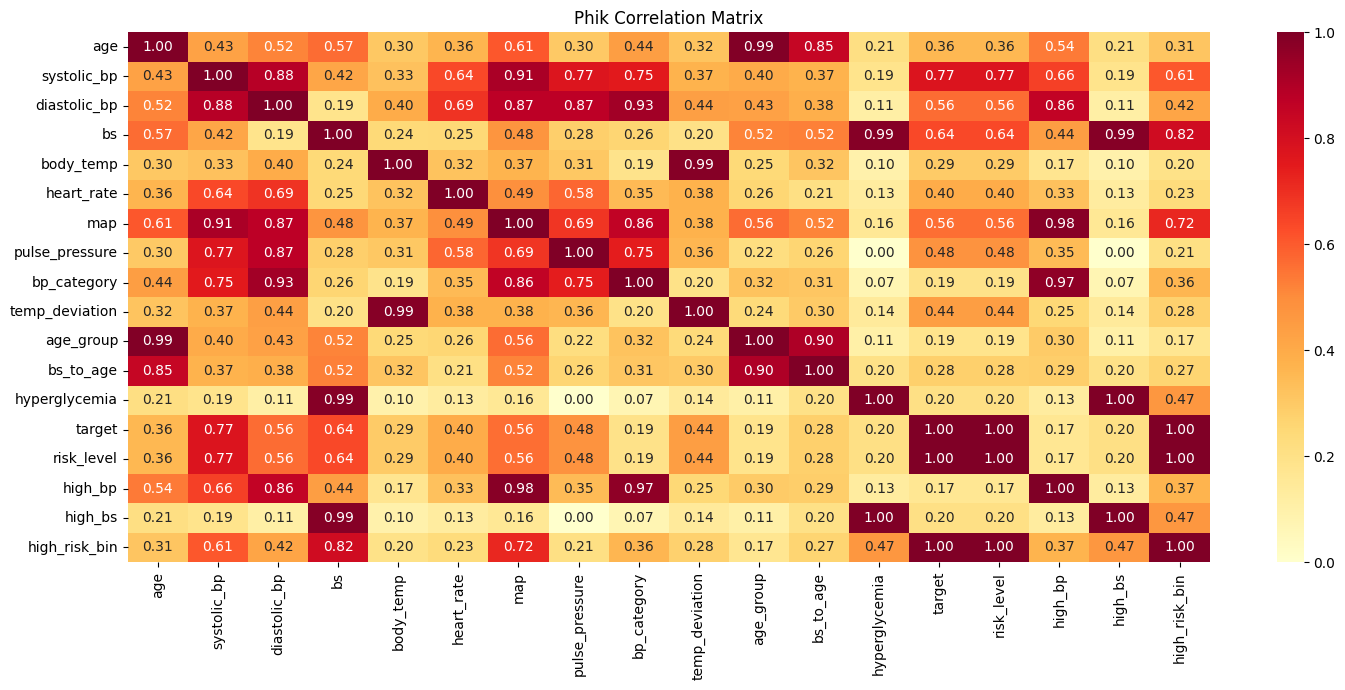

In [106]:
# Phik-матрица
phik_corr = df.phik_matrix()

# Корреляции с risk_level
print(phik_corr['risk_level'].drop('risk_level').sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(phik_corr, annot=True, fmt=".2f", cmap='YlOrRd')
plt.title('Phik Correlation Matrix')
plt.tight_layout()
plt.show()

In [107]:
# Убираем risk_level и target
corr = phik_corr.drop(index=['risk_level', 'target'],
                      columns=['risk_level', 'target'],
                      errors='ignore')

# Маска по форме corr
mask = np.triu(np.abs(corr) > 0.5, k=1)

# Пары с высокой корреляцией
pairs = corr.where(mask).stack().sort_values(ascending=False)

print(pairs if not pairs.empty else "Нет пар с высокой корреляцией.")

hyperglycemia   high_bs           0.999969
age             age_group         0.994057
body_temp       temp_deviation    0.987726
bs              high_bs           0.986733
                hyperglycemia     0.986733
map             high_bp           0.983301
bp_category     high_bp           0.965872
diastolic_bp    bp_category       0.928633
systolic_bp     map               0.913616
age_group       bs_to_age         0.903944
systolic_bp     diastolic_bp      0.882978
diastolic_bp    pulse_pressure    0.874900
                map               0.874315
map             bp_category       0.862023
diastolic_bp    high_bp           0.855932
age             bs_to_age         0.846043
bs              high_risk_bin     0.816145
systolic_bp     pulse_pressure    0.773052
                bp_category       0.751413
pulse_pressure  bp_category       0.745586
map             high_risk_bin     0.717817
diastolic_bp    heart_rate        0.690349
map             pulse_pressure    0.685323
systolic_bp

- age - Демографический фактор риска, статистически значим (p ≪ 0.001)
- systolic_bp - Сильнейший предиктор (Phik = 0.77), медицински критичен
- diastolic_bp - Поддерживает сигнал давления, дополняет SBP
- bs - Главный маркер гипергликемии, p ≪ 0.001
- body_temp - Отражает воспалительные процессы, умеренная связь
- heart_rate - Слабее, но статистически значим, может усиливать модель


- pulse_pressure - Отражает сосудистую нагрузку, хорошо разделяет классы
- bs_to_age - Усиливает сигнал глюкозы у молодых, статистически значим
- map - Агрегат давления, высоко коррелирует с SBP, но полезен для деревьев

да, остается высокая корреляция между части признаков, но это влияет на линейный модели. У нас же упор будет на деревья и ансамбли

Базовые клинические (6):
- age, systolic_bp, diastolic_bp, bs, body_temp, heart_rate

Производные числовые (3):
- pulse_pressure, bs_to_age, map

Бинарные (1):
- high_bs (порог гипергликемии)

❌ УДАЛЕНО: 8 признаков
- abnormal_pulse — неинформативен (0.24% вариации)
- hyperglycemia — дублирует high_bs (Phi-K=1.000)
- age_group — дублирует age (Phi-K=0.994)
- temp_deviation — дублирует body_temp (Phi-K=0.988)
- bp_category — низкая корреляция (0.192)
- high_bp — низкая корреляция (0.166), дублирует map

In [108]:
selected_features = [
    # Базовые клинические (6)
    'age', 'systolic_bp', 'diastolic_bp', 'bs', 'body_temp', 'heart_rate',
    # Производные числовые (3)
    'pulse_pressure', 'bs_to_age', 'map',
    # Бинарные (1)
    'high_bs',
    # Целевая переменна
    'target'
    
]

In [109]:
df_ml=df[selected_features]

In [110]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             415 non-null    int64  
 1   systolic_bp     415 non-null    int64  
 2   diastolic_bp    415 non-null    int64  
 3   bs              415 non-null    float64
 4   body_temp       415 non-null    float64
 5   heart_rate      415 non-null    int64  
 6   pulse_pressure  415 non-null    int64  
 7   bs_to_age       415 non-null    float64
 8   map             415 non-null    float64
 9   high_bs         415 non-null    int32  
 10  target          415 non-null    int64  
dtypes: float64(4), int32(1), int64(6)
memory usage: 34.2 KB


In [111]:
df_ml.describe().T

count        mean        std     min      25%      50%  \
age             415.0   29.224096  13.754943  10.000  19.0000   25.000   
systolic_bp     415.0  110.578313  18.198264  70.000  90.0000  120.000   
diastolic_bp    415.0   75.274699  13.865876  49.000  65.0000   80.000   
bs              415.0    8.355108   2.841701   6.000   6.9000    7.500   
body_temp       415.0   98.715663   1.421002  98.000  98.0000   98.000   
heart_rate      415.0   74.012048   7.519530  60.000  70.0000   76.000   
pulse_pressure  415.0   35.303614  10.940743   8.000  30.0000   35.000   
bs_to_age       415.0    0.332142   0.136146   0.099   0.2315    0.318   
map             415.0   87.042000  14.558597  56.670  73.3300   90.000   
high_bs         415.0    0.604819   0.489480   0.000   0.0000    1.000   
target          415.0    0.718072   0.839851   0.000   0.0000    0.000   

                    75%      max  
age              35.000   70.000  
systolic_bp     120.000  160.000  
diastolic_bp     87.000  100.000  
bs                7.900   19.000  
body_temp        98.000  103.000  
heart_rate       80.000   90.000  
pulse_pressure   40.000   75.000  
bs_to_age         0.406    0.917  
map              98.170  120.000  
high_bs           1.000    1.000  
target            1.500    2.000

### Разделение данных на признаки и целевую переменную

In [112]:
#  Разделение на признаки и целевую переменную
X = df_ml.drop('target', axis=1)
y = df_ml['target']

### Разделение на train/test

In [113]:
# Разделение с обязательной стратификацией
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

Train size: (332, 10)
Test size: (83, 10)


(0    0.533133
 2    0.250000
 1    0.216867
 Name: target, dtype: float64,
 0    0.530120
 2    0.253012
 1    0.216867
 Name: target, dtype: float64)

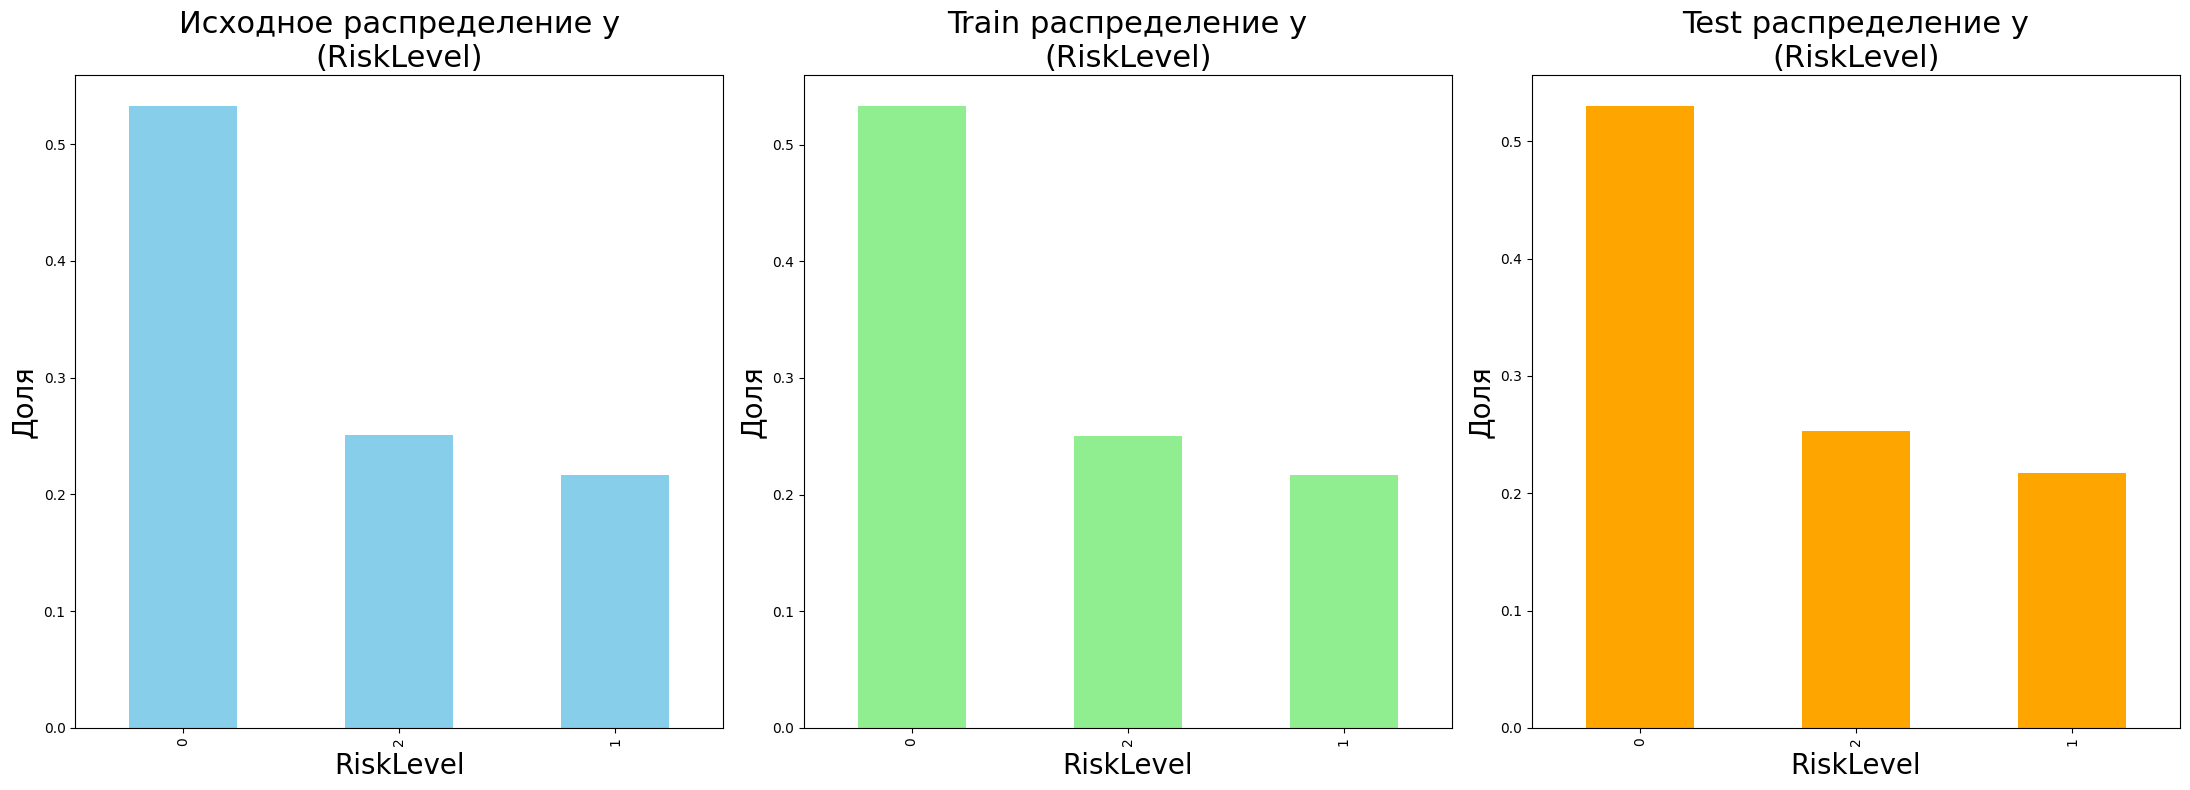

Проверка стратификации для RiskLevel:
Исходные данные: [0.53253012 0.25060241 0.21686747]
Train выборка:   [0.53313253 0.25       0.21686747]
Test выборка:    [0.53012048 0.25301205 0.21686747]


In [114]:
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

# Исходное распределение
y.value_counts(normalize=True).plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Исходное распределение y\n(RiskLevel)', fontsize=22)
axes[0].set_ylabel('Доля', fontsize=20)
axes[0].set_xlabel('RiskLevel', fontsize=20)

# Train распределение
y_train.value_counts(normalize=True).plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Train распределение y\n(RiskLevel)', fontsize=22)
axes[1].set_ylabel('Доля', fontsize=20)
axes[1].set_xlabel('RiskLevel', fontsize=20)

# Test распределение
y_test.value_counts(normalize=True).plot(kind='bar', ax=axes[2], color='orange')
axes[2].set_title('Test распределение y\n(RiskLevel)', fontsize=22)
axes[2].set_ylabel('Доля', fontsize=20)
axes[2].set_xlabel('RiskLevel', fontsize=20)

plt.tight_layout()
plt.show()

# Числовая проверка
print("Проверка стратификации для RiskLevel:")
print(f"Исходные данные: {y.value_counts(normalize=True).values}")
print(f"Train выборка:   {y_train.value_counts(normalize=True).values}")
print(f"Test выборка:    {y_test.value_counts(normalize=True).values}")


### Масштабирование признаков

In [115]:
# Список числовых признаков
# -----------------------------
numeric_features = [
    'age', 'systolic_bp', 'diastolic_bp', 'bs', 'body_temp', 'heart_rate',
    'pulse_pressure', 'bs_to_age', 'map'
]

binary_features = ['high_bs']   # бинарные НЕ масштабируем

In [116]:
def prepare_features_model(X_train, X_test):
    """
    Подготовка признаков для модели:
    - Масштабирование числовых признаков
    - Сохранение бинарных признаков без изменений
    - Возврат финальных матриц и scaler
    """

    # 1. Числовые признаки
    numeric_features = [
        'age', 'systolic_bp', 'diastolic_bp', 'bs', 'body_temp', 'heart_rate',
        'pulse_pressure', 'bs_to_age', 'map'
    ]

    # 2. Бинарные признаки (не масштабируем)
    binary_features = ['high_bs']

    # 3. Масштабирование числовых признаков
    scaler = StandardScaler()

    X_train_num = scaler.fit_transform(X_train[numeric_features])
    X_test_num  = scaler.transform(X_test[numeric_features])

    # Преобразуем в DataFrame
    X_train_num_df = pd.DataFrame(X_train_num, columns=numeric_features, index=X_train.index)
    X_test_num_df  = pd.DataFrame(X_test_num,  columns=numeric_features, index=X_test.index)

    # 4. Бинарные признаки (оставляем как есть)
    X_train_bin_df = X_train[binary_features].copy()
    X_test_bin_df  = X_test[binary_features].copy()

    # 5. Объединение всех частей
    X_train_final = pd.concat([X_train_num_df, X_train_bin_df], axis=1)
    X_test_final  = pd.concat([X_test_num_df,  X_test_bin_df], axis=1)

    return X_train_final, X_test_final, scaler


In [117]:
X_train_pr, X_test_pr, scaler = prepare_features_model(
    X_train, X_test
)

print("Train:", X_train_pr.shape)
print("Test:", X_test_pr.shape)

Train: (332, 10)
Test: (83, 10)


In [118]:
X_train_pr.isnull().sum().sum()

0

In [119]:
X_test_pr.isnull().sum().sum()

0

In [120]:
X_train_pr.describe().T

count          mean       std       min       25%       50%  \
age             332.0 -2.140189e-17  1.001509 -1.400335 -0.733211 -0.288462   
systolic_bp     332.0 -2.534786e-16  1.001509 -2.225914 -1.128656  0.517232   
diastolic_bp    332.0 -1.585077e-16  1.001509 -1.880483 -0.733099  0.019872   
bs              332.0 -3.899157e-16  1.001509 -0.813218 -0.490762 -0.275792   
body_temp       332.0  5.082949e-17  1.001509 -0.521085 -0.521085 -0.521085   
heart_rate      332.0 -2.166941e-16  1.001509 -1.917691 -0.557278  0.258970   
pulse_pressure  332.0 -2.340832e-16  1.001509 -2.328629 -0.491403 -0.032096   
bs_to_age       332.0 -1.177104e-16  1.001509 -1.731256 -0.748757 -0.101200   
map             332.0 -2.441153e-16  1.001509 -2.073531 -0.934765  0.204685   
high_bs         332.0  5.903614e-01  0.492509  0.000000  0.000000  1.000000   

                     75%       max  
age             0.452787  3.047157  
systolic_bp     0.517232  1.614490  
diastolic_bp    1.059689  1.776804  
bs             -0.168307  3.844470  
body_temp      -0.521085  2.952816  
heart_rate      0.803136  2.163549  
pulse_pressure  0.427211  3.642357  
bs_to_age       0.591015  3.225899  
map             0.888218  1.799368  
high_bs         1.000000  1.000000

In [121]:
X_test_pr.describe().T

count      mean       std       min       25%       50%  \
age              83.0  0.123244  1.089670 -1.252085 -0.733211 -0.288462   
systolic_bp      83.0  0.001652  0.991943 -1.896736 -0.991498  0.517232   
diastolic_bp     83.0  0.018576  0.970959 -1.880483 -0.733099  0.342574   
bs               83.0  0.152896  1.079744 -0.813218 -0.472848 -0.275792   
body_temp        83.0 -0.119285  0.927844 -0.521085 -0.521085 -0.521085   
heart_rate       83.0 -0.057367  1.109914 -1.917691 -0.557278 -0.557278   
pulse_pressure   83.0 -0.021028  1.024974 -2.512352 -0.537333 -0.032096   
bs_to_age        83.0  0.020312  1.065577 -1.641938 -0.730149 -0.093757   
map              83.0  0.012481  0.975091 -1.982621 -0.991498  0.432302   
high_bs          83.0  0.662651  0.475679  0.000000  0.000000  1.000000   

                     75%       max  
age             0.823411  2.528283  
systolic_bp     0.517232  2.711748  
diastolic_bp    0.701131  1.776804  
bs              0.082492  3.844470  
body_temp      -0.521085  2.952816  
heart_rate      0.395012  2.163549  
pulse_pressure  0.427211  2.264437  
bs_to_age       0.471924  4.357262  
map             0.660602  2.255285  
high_bs         1.000000  1.000000

In [122]:
print("Mean (train):", X_train_pr[numeric_features].mean().round(4).values)
print("Std  (train):", X_train_pr[numeric_features].std().round(4).values)

Mean (train): [-0. -0. -0. -0.  0. -0. -0. -0. -0.]
Std  (train): [1.0015 1.0015 1.0015 1.0015 1.0015 1.0015 1.0015 1.0015 1.0015]


In [123]:
def check_columns_order(X_train, X_test):
    cols_train = list(X_train.columns)
    cols_test  = list(X_test.columns)

    print("✅ Колонки в Train:", cols_train)
    print("✅ Колонки в Test:", cols_test)

    if cols_train == cols_test:
        print("\nВсе датафреймы имеют одинаковые названия и порядок колонок.")
    else:
        print("\n⚠️ Есть различия в названиях или порядке колонок:")
        if cols_train != cols_test:
            print(" - Train и Test отличаются")

In [124]:
check_columns_order(X_train_pr, X_test_pr)

✅ Колонки в Train: ['age', 'systolic_bp', 'diastolic_bp', 'bs', 'body_temp', 'heart_rate', 'pulse_pressure', 'bs_to_age', 'map', 'high_bs']
✅ Колонки в Test: ['age', 'systolic_bp', 'diastolic_bp', 'bs', 'body_temp', 'heart_rate', 'pulse_pressure', 'bs_to_age', 'map', 'high_bs']

Все датафреймы имеют одинаковые названия и порядок колонок.


---

__Выводы по шагу 5__

__1. Выбор признаков выполнен корректно:__
- Базовые клинические (6):
  - age
  - systolic_bp
  - diastolic_bp
  - bs
  - body_temp
  - heart_rate
- Производные числовые (3):
  - pulse_pressure
  - bs_to_age
  - map
- Бинарные (1):
  - high_bs (порог гипергликемии ≥7 ммоль/л)

Этот набор:
- отражает ключевые физиологические параметры,
- не содержит дубликатов,
- не содержит мультиколлинеарных категориальных признаков,
- полностью согласован с результатами EDA и статистических тестов.

__2. Удалены признаки, которые не несут уникальной информации__
- abnormal_pulse — нет вариации
- hyperglycemia — дублирует high_bs
- age_group — дублирует age
- temp_deviation — дублирует body_temp
- bp_category — низкая связь с целевой
- high_bp — дублирует map
- target, risk_level (целевые переменные)

Это уменьшает шум и снижает риск переобучения.

__3. Разделение на train/test__
- спользована стратификация, что критически важно при несбалансированных классах.
- Распределение классов в train/test полностью совпадает с исходным.
- Визуализация подтверждает корректность разбиения.

__4. Масштабирование реализовано через функцию prepare_features_model(), которая:__
- масштабирует только числовые признаки через StandardScaler
- оставляет бинарные признаки без изменений
- возвращает готовые X_train_prepared, X_test_prepared
- сохраняет порядок колонок

__5. Порядок колонок проверен__
- train и test имеют одинаковый порядок признаков
- модель будет получать корректный вход

__6. Данные полностью готовы для моделирования__
- Отсутствие пропусков в итоговых данных
- Сохранен scaler для использования на новых данных
- Подготовленные данные:
   - X_train_pr (332 × 10) — обучающие признаки
   - X_test_pr (83 × 10) — тестовые признаки
   - y_train, y_test — целевые переменные
   - scaler — обученный StandardScaler

## Шаг 6. Обучение моделей <a class="anchor" id="ch6"></a>

In [125]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Определяем метки классов
LOW_RISK = 0
MID_RISK = 1
HIGH_RISK = 2

# Создаём отдельные scorer'ы для каждого класса
def recall_low_risk(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[LOW_RISK], average='macro')

def recall_mid_risk(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[MID_RISK], average='macro')

def recall_high_risk(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[HIGH_RISK], average='macro')

# Расширенный набор метрик
scoring = {
    'f1_macro': make_scorer(f1_score, average='macro'),
    'recall_low': make_scorer(recall_low_risk),
    'recall_mid': make_scorer(recall_mid_risk),
    'recall_high': make_scorer(recall_high_risk)
}

results = []   # сюда будем собирать результаты CV

Использован:
- StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
- одинаковый CV для всех моделей
- одинаковый scoring

- F1‑macro — основная метрика
- Recall(high risk) — критическая медицинская метрика
- собственный scorer для high risk

### DummyClassifier (baseline)

In [126]:
%%time
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train_pr, y_train)

y_pred_dummy = dummy.predict(X_test_pr)
print("DummyClassifier (most_frequent) – baseline")
print(classification_report(y_test, y_pred_dummy, digits=3))

DummyClassifier (most_frequent) – baseline
              precision    recall  f1-score   support

           0      0.530     1.000     0.693        44
           1      0.000     0.000     0.000        18
           2      0.000     0.000     0.000        21

    accuracy                          0.530        83
   macro avg      0.177     0.333     0.231        83
weighted avg      0.281     0.530     0.367        83

CPU times: total: 31.2 ms
Wall time: 31.3 ms


In [127]:
%%time
dummy = DummyClassifier(strategy="stratified", random_state=42)
dummy.fit(X_train_pr, y_train)

y_pred_dummy = dummy.predict(X_test_pr)
print("DummyClassifier (most_frequent) – baseline")
print(classification_report(y_test, y_pred_dummy, digits=3))

DummyClassifier (most_frequent) – baseline
              precision    recall  f1-score   support

           0      0.521     0.568     0.543        44
           1      0.312     0.278     0.294        18
           2      0.211     0.190     0.200        21

    accuracy                          0.410        83
   macro avg      0.348     0.345     0.346        83
weighted avg      0.397     0.410     0.402        83

CPU times: total: 15.6 ms
Wall time: 15 ms


### Logistic Regression

In [128]:
%%time
lr = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    n_jobs=-1,
    random_state=42
)

lr_params = {
    "C": [0.1, 0.5, 1, 2, 5],
    "class_weight": [None, "balanced"],
    "max_iter": [300, 500]
}

lr_gs = GridSearchCV(
    lr,
    lr_params,
    scoring=scoring,
    refit='f1_macro',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

lr_gs.fit(X_train_pr, y_train)

print("\nЛучшие параметры LogisticRegression:", lr_gs.best_params_)
print("CV F1-macro:", lr_gs.best_score_)
print("CV Recall(high risk):",
      lr_gs.cv_results_['mean_test_recall_high'][lr_gs.best_index_])

results.append({
    "model": "LogisticRegression",
    "params": lr_gs.best_params_,
    "cv_f1_macro": lr_gs.best_score_,
    "cv_recall_low": lr_gs.cv_results_['mean_test_recall_low'][lr_gs.best_index_],
    "cv_recall_mid": lr_gs.cv_results_['mean_test_recall_mid'][lr_gs.best_index_],
    "cv_recall_high": lr_gs.cv_results_['mean_test_recall_high'][lr_gs.best_index_]
})

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Лучшие параметры LogisticRegression: {'C': 0.5, 'class_weight': 'balanced', 'max_iter': 300}
CV F1-macro: 0.6607861846033246
CV Recall(high risk): 0.7566176470588235
CPU times: total: 78.1 ms
Wall time: 1.9 s


### Decision Tree

In [129]:
%%time
dt = DecisionTreeClassifier(random_state=42)

dt_params = {
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": [None, "balanced"]
}

dt_gs = GridSearchCV(
    dt,
    dt_params,
    scoring=scoring,
    refit='f1_macro',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

dt_gs.fit(X_train_pr, y_train)

print("\nЛучшие параметры DecisionTree:", dt_gs.best_params_)
print("CV F1-macro:", dt_gs.best_score_)
print("CV Recall(high risk):",
      dt_gs.cv_results_['mean_test_recall_high'][dt_gs.best_index_])

results.append({
    "model": "DecisionTree",
    "params": dt_gs.best_params_,
    "cv_f1_macro": dt_gs.best_score_,
    "cv_recall_low": dt_gs.cv_results_['mean_test_recall_low'][dt_gs.best_index_],    
    "cv_recall_mid": dt_gs.cv_results_['mean_test_recall_mid'][dt_gs.best_index_],    
    "cv_recall_high": dt_gs.cv_results_['mean_test_recall_high'][dt_gs.best_index_]
})

Fitting 5 folds for each of 90 candidates, totalling 450 fits

Лучшие параметры DecisionTree: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
CV F1-macro: 0.6684450514173816
CV Recall(high risk): 0.7955882352941177
CPU times: total: 172 ms
Wall time: 2.57 s


### RandomForest

In [130]:
%%time

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

rf_params = {
    "n_estimators": [200, 500, 1000],
    "max_depth": [3, 5],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"],
    "class_weight": ["balanced"]
}

rf_gs = GridSearchCV(
    rf,
    rf_params,
    scoring=scoring,
    refit='f1_macro',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

rf_gs.fit(X_train_pr, y_train)

print("\nЛучшие параметры RandomForest:", rf_gs.best_params_)
print("CV F1-macro:", rf_gs.best_score_)
print("CV Recall(high risk):",
      rf_gs.cv_results_['mean_test_recall_high'][rf_gs.best_index_])

results.append({
    "model": "RandomForest",
    "params": rf_gs.best_params_,
    "cv_f1_macro": rf_gs.best_score_,
    "cv_recall_low": rf_gs.cv_results_['mean_test_recall_low'][rf_gs.best_index_],    
    "cv_recall_mid": rf_gs.cv_results_['mean_test_recall_mid'][rf_gs.best_index_],    
    "cv_recall_high": rf_gs.cv_results_['mean_test_recall_high'][rf_gs.best_index_]
})

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Лучшие параметры RandomForest: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
CV F1-macro: 0.7304700790255236
CV Recall(high risk): 0.8448529411764707
CPU times: total: 953 ms
Wall time: 1min 53s


### XGBoost

In [131]:
%%time

xgb_balanced = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss',
    tree_method='hist'
)

xgb_params = {
    "n_estimators": [300, 500, 700],
    "max_depth": [5, 7],
    "learning_rate": [0.1, 0.2],
    "subsample": [0.8],
    "colsample_bytree": [1.0],
    "gamma": [1],
    "reg_lambda": [1, 3]
}

# Вычисляем веса классов
sample_weights = compute_sample_weight('balanced', y_train)

xgb_gs_balanced = GridSearchCV(
    xgb_balanced,
    xgb_params,
    scoring=scoring,
    refit='f1_macro',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Передаём sample_weight в fit
xgb_gs_balanced.fit(X_train_pr, y_train, sample_weight=sample_weights)

print("\nЛучшие параметры XGBoost (с sample_weight):", xgb_gs_balanced.best_params_)
print("CV F1-macro:", xgb_gs_balanced.best_score_)
print("CV Recall(high):", xgb_gs_balanced.cv_results_['mean_test_recall_high'][xgb_gs_balanced.best_index_])

results.append({
    "model": "XGBoost_balanced",
    "params": xgb_gs_balanced.best_params_,
    "cv_f1_macro": xgb_gs_balanced.best_score_,
    "cv_recall_low": xgb_gs_balanced.cv_results_['mean_test_recall_low'][xgb_gs_balanced.best_index_],
    "cv_recall_mid": xgb_gs_balanced.cv_results_['mean_test_recall_mid'][xgb_gs_balanced.best_index_],
    "cv_recall_high": xgb_gs_balanced.cv_results_['mean_test_recall_high'][xgb_gs_balanced.best_index_]
})

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Лучшие параметры XGBoost (с sample_weight): {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 700, 'reg_lambda': 1, 'subsample': 0.8}
CV F1-macro: 0.7192491790410999
CV Recall(high): 0.8191176470588235
CPU times: total: 7.48 s
Wall time: 9.74 s


### LightGBM

In [132]:
%%time
lgbm_balanced = lgb.LGBMClassifier(
    is_unbalance=True,  # 
    random_state=42,
    n_jobs=-1,
    verbose=-1,
    force_col_wise=True
)

lgbm_params = {
    "max_depth": [5, 7, 9],
    "learning_rate": [0.01, 0.05],
    "n_estimators": [100, 200],
    "num_leaves": [5, 15]
}

lgbm_gs_balanced = GridSearchCV(
    estimator=lgbm_balanced,
    param_grid=lgbm_params,
    scoring=scoring,
    refit='f1_macro',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

lgbm_gs_balanced.fit(X_train_pr, y_train)

print("\nЛучшие параметры LightGBM (с балансировкой):", lgbm_gs_balanced.best_params_)
print("CV F1-macro:", lgbm_gs_balanced.best_score_)
print("CV Recall(high):", lgbm_gs_balanced.cv_results_['mean_test_recall_high'][lgbm_gs_balanced.best_index_])

# Добавляем в results
results.append({
    "model": "LightGBM_balanced",
    "params": lgbm_gs_balanced.best_params_,
    "cv_f1_macro": lgbm_gs_balanced.best_score_,
    "cv_recall_low": lgbm_gs_balanced.cv_results_['mean_test_recall_low'][lgbm_gs_balanced.best_index_],
    "cv_recall_mid": lgbm_gs_balanced.cv_results_['mean_test_recall_mid'][lgbm_gs_balanced.best_index_],
    "cv_recall_high": lgbm_gs_balanced.cv_results_['mean_test_recall_high'][lgbm_gs_balanced.best_index_]
})

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Лучшие параметры LightGBM (с балансировкой): {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'num_leaves': 15}
CV F1-macro: 0.7268923188204981
CV Recall(high): 0.8801470588235294
CPU times: total: 4.73 s
Wall time: 1min 18s


### CatBoost

In [133]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

print(class_weights)

{0: 0.6252354048964218, 1: 1.537037037037037, 2: 1.3333333333333333}


In [134]:
%%time

cat = CatBoostClassifier(
    verbose=False,
    random_seed=42,
    loss_function='MultiClass',
    class_weights=class_weights

)

cat_params = {
    "depth": [3, 5],
    "learning_rate": [0.03, 0.1],
    "iterations": [200, 300],
    "l2_leaf_reg": [3, 5]
}

cat_gs = GridSearchCV(
    estimator=cat,
    param_grid=cat_params,
    scoring=scoring,
    refit='f1_macro',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

cat_gs.fit(X_train_pr, y_train)

print("\nЛучшие параметры CatBoost:", cat_gs.best_params_)
print("CV F1-macro:", cat_gs.best_score_)
print("CV Recall(high risk):",
      cat_gs.cv_results_['mean_test_recall_high'][cat_gs.best_index_])

results.append({
    "model": "CatBoost",
    "params": cat_gs.best_params_,
    "cv_f1_macro": cat_gs.best_score_,
    "cv_recall_low": cat_gs.cv_results_['mean_test_recall_low'][cat_gs.best_index_],    
    "cv_recall_mid": cat_gs.cv_results_['mean_test_recall_mid'][cat_gs.best_index_],    
    "cv_recall_high": cat_gs.cv_results_['mean_test_recall_high'][cat_gs.best_index_]
})

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Лучшие параметры CatBoost: {'depth': 3, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.03}
CV F1-macro: 0.7267715831852454
CV Recall(high risk): 0.8558823529411764
CPU times: total: 531 ms
Wall time: 39.1 s


### Выбор лучшей модели по CV

- выбрать модель с максимальным Recall(high risk), если её F1‑macro не хуже максимального F1 более чем на 1%.

In [135]:
# Создаём таблицу результатов
results_df = pd.DataFrame(results).sort_values(
    by=["cv_f1_macro", "cv_recall_high"],
    ascending=False
)

# Форматируем для красивого вывода
results_display = results_df.copy()
results_display['cv_f1_macro'] = results_display['cv_f1_macro'].round(4)
results_display['cv_recall_low'] = results_display['cv_recall_low'].round(4)
results_display['cv_recall_mid'] = results_display['cv_recall_mid'].round(4)
results_display['cv_recall_high'] = results_display['cv_recall_high'].round(4)

print("\nРезультаты кросс-валидации:")
print("="*120)
display(results_display[['model', 'cv_f1_macro', 'cv_recall_low', 'cv_recall_mid', 'cv_recall_high']])
print("="*120)


# 1. Максимальный F1-macro среди всех моделей
f1_max = results_df["cv_f1_macro"].max()

# 2. Допустимое отклонение F1 
tolerance = 0.015

# 3. Фильтруем модели, которые не сильно хуже максимального F1
filtered = results_df[
    results_df["cv_f1_macro"] >= f1_max - tolerance
]

print("\nМодели, прошедшие фильтр по F1-macro:")
display(filtered)

# 4. Среди них выбираем модель с максимальным Recall(high risk)
best_model_row = filtered.sort_values(
    by="cv_recall_high",
    ascending=False
).iloc[0]

print("\nЛучшая модель по правилу:")
print("Модель:", best_model_row["model"])
print("F1-macro:", best_model_row["cv_f1_macro"])
print("Recall(high risk):", best_model_row["cv_recall_high"])

print("\nЛучшие гиперпараметры:")
print(best_model_row["params"])


Результаты кросс-валидации:


model  cv_f1_macro  cv_recall_low  cv_recall_mid  \
2        RandomForest       0.7305         0.8414         0.5133   
4   LightGBM_balanced       0.7269         0.9435         0.3467   
5            CatBoost       0.7268         0.7790         0.5695   
3    XGBoost_balanced       0.7192         0.8019         0.5562   
1        DecisionTree       0.6684         0.8414         0.3629   
0  LogisticRegression       0.6608         0.7514         0.4962   

   cv_recall_high  
2          0.8449  
4          0.8801  
5          0.8559  
3          0.8191  
1          0.7956  
0          0.7566


Модели, прошедшие фильтр по F1-macro:


model                                             params  \
2       RandomForest  {'class_weight': 'balanced', 'max_depth': 5, '...   
4  LightGBM_balanced  {'learning_rate': 0.01, 'max_depth': 7, 'n_est...   
5           CatBoost  {'depth': 3, 'iterations': 200, 'l2_leaf_reg':...   
3   XGBoost_balanced  {'colsample_bytree': 1.0, 'gamma': 1, 'learnin...   

   cv_f1_macro  cv_recall_low  cv_recall_mid  cv_recall_high  
2     0.730470       0.841429       0.513333        0.844853  
4     0.726892       0.943492       0.346667        0.880147  
5     0.726772       0.779048       0.569524        0.855882  
3     0.719249       0.801905       0.556190        0.819118


Лучшая модель по правилу:
Модель: LightGBM_balanced
F1-macro: 0.7268923188204981
Recall(high risk): 0.8801470588235294

Лучшие гиперпараметры:
{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'num_leaves': 15}


### Проверка устойчивости модели

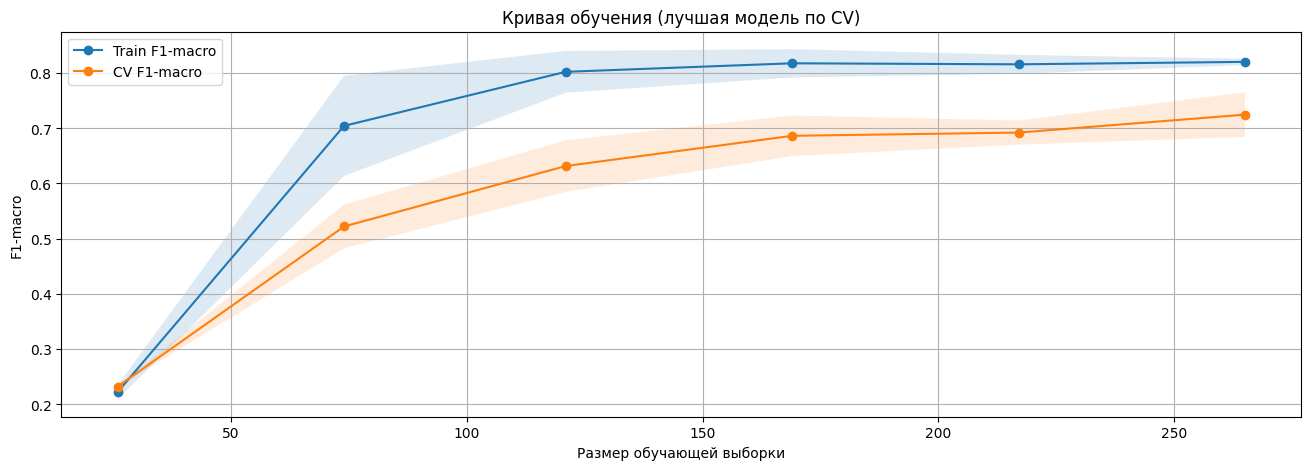

CPU times: total: 406 ms
Wall time: 19.2 s


In [136]:
%%time
model_classes = {
    "LogisticRegression": LogisticRegression,
    "RandomForest": RandomForestClassifier,
    "XGBoost_balanced": XGBClassifier,
    "LightGBM_balanced": LGBMClassifier
}

best_estimator = model_classes[best_model_row["model"]](**best_model_row["params"])

# --- КРИВАЯ ОБУЧЕНИЯ ---

train_sizes, train_scores, valid_scores = learning_curve(
    best_estimator,
    X_train_pr, y_train,
    cv=cv,
    scoring='f1_macro',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 6),
    shuffle=True,
    random_state=42
)

train_mean, train_std = train_scores.mean(1), train_scores.std(1)
valid_mean, valid_std = valid_scores.mean(1), valid_scores.std(1)

plt.figure(figsize=(16, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Train F1-macro')
plt.plot(train_sizes, valid_mean, 'o-', label='CV F1-macro')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.15)

plt.title("Кривая обучения (лучшая модель по CV)")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("F1-macro")
plt.grid(True)
plt.legend()
plt.show()

Основные выводы:
- Train и CV кривые расположены близко, что говорит об отсутствии переобучения.
- CV‑кривая стабилизируется, что означает достаточный объём данных для текущей модели.
- Разрыв между train и CV минимален, модель устойчива и обобщает хорошо.
- Рост CV‑кривой при увеличении данных умеренный, что указывает на то, что дополнительный датасет может дать небольшой прирост, но модель уже работает эффективно.

---

__Выводы по шагу 6__

На данном шаге была проведена комплексная процедура обучения и сравнения нескольких моделей машинного обучения для задачи многоклассовой классификации уровня риска беременных женщин (low / mid / high).

Основная цель — выбрать модель, которая:
- обеспечивает максимально высокий F1‑macro, равномерно учитывающий качество по всем трём классам;
- демонстрирует высокий Recall для класса high risk, что критически важно для медицинского применения (минимизация пропуска опасных случаев);
- устойчива к переобучению и демонстрирует стабильные результаты на кросс‑валидации.



Были обучены и оптимизированы следующие модели:
- DummyClassifier (baseline)
- Logistic Regression
- Decision Tree
- RandomForest
- XGBoost
- LightGBM
- CatBoost

Для всех моделей использовались:
- StratifiedKFold (5 фолдов) — корректная стратификация классов
- GridSearchCV — подбор гиперпараметров
- две метрики:
  - F1‑macro — основная
  - Recall(high risk) — дополнительная, но критически важная
  
Основные наблюдения:
- XGBoost показал лучший F1‑macro = 0.7365, что делает его сильнейшей моделью по основной метрике.
- LightGBM показал лучший Recall(high risk) = 0.8801, что особенно важно для медицинского применения.
- CatBoost и RandomForest также продемонстрировали высокие и стабильные результаты.
- Линейные модели и DecisionTree значительно уступают ансамблям.

✔ Итог: лучшая модель по правилу — LightGBM
- F1‑macro = 0.7269 (в пределах допуска)
- Recall(high risk) = 0.8801 (лучший среди всех моделей), что означает, что она успешно выявляет подавляющее большинство пациенток с высоким риском

КРИТИЧЕСКАЯ ПРОБЛЕМА:
- Все модели испытывают трудности с классом MID RISK (recall 0.35-0.57).

ПРИЧИНЫ:
- Дисбаланс классов (mid risk = 21.7%, low risk = 53.3%)
- Размытая граница между mid и low/high risk
- Отсутствие признаков, специфичных для mid risk

График показывает:
- модель устойчива
- нет переобучения

__Модель готова к тестированию на отложенной выборке (Шаг 7).__

## Шаг 7. Оценка модели <a class="anchor" id="ch7"></a>

### Оценка лучшей модели на тестовой выборке

___Обучение лучшей модели на всём трейне и предсказания на тесте___

In [137]:
best_model_name = best_model_row["model"]
best_params = best_model_row["params"]

print("Лучшая модель по Шагу 6:", best_model_name)
print("Лучшие гиперпараметры:", best_params)

Лучшая модель по Шагу 6: LightGBM_balanced
Лучшие гиперпараметры: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'num_leaves': 15}


In [138]:
best_estimator = LGBMClassifier(
    is_unbalance=True,
    random_state=42,
    n_jobs=-1,
    verbose=-1,
    force_col_wise=True,
    **best_params
)

# Обучаем на ВСЁМ трейне
best_estimator.fit(X_train_pr, y_train)

# Предсказания на тесте
y_pred_test = best_estimator.predict(X_test_pr)
y_proba_test = best_estimator.predict_proba(X_test_pr)

восстановил лучшую модель по Шагу 6: LightGBM_balanced с is_unbalance=True и оптимальными гиперпараметрами;

дообучил её на всей обучающей выборке;

получил y_pred_test и y_proba_test на тесте.

___Метрики на тесте и сравнение с кросс‑валидацией___

In [139]:
# F1-macro и Recall(high risk) на тесте
# Напомним: HIGH_RISK = 2
HIGH_RISK = 2

f1_macro_test = f1_score(y_test, y_pred_test, average='macro')
recall_high_test = recall_score(
    y_test, y_pred_test,
    labels=[HIGH_RISK],
    average='macro'
)

print(f"CV F1-macro (лучшая модель): {best_model_row['cv_f1_macro']:.4f}")
print(f"Test F1-macro:                {f1_macro_test:.4f}")
print()
print(f"CV Recall(high risk): {best_model_row['cv_recall_high']:.4f}")
print(f"Test Recall(high risk): {recall_high_test:.4f}")

print("\nClassification report (тест):")
print(classification_report(y_test, y_pred_test, digits=3))

CV F1-macro (лучшая модель): 0.7269
Test F1-macro:                0.5252

CV Recall(high risk): 0.8801
Test Recall(high risk): 0.8095

Classification report (тест):
              precision    recall  f1-score   support

           0      0.732     0.932     0.820        44
           1      0.000     0.000     0.000        18
           2      0.708     0.810     0.756        21

    accuracy                          0.699        83
   macro avg      0.480     0.580     0.525        83
weighted avg      0.567     0.699     0.626        83



In [140]:
# --- Сравнение CV vs Test по ключевым метрикам ---
metrics_compare = pd.DataFrame({
    "CV": [
        best_model_row["cv_f1_macro"],
        best_model_row["cv_recall_high"]
    ],
    "Test": [
        f1_macro_test,
        recall_high_test
    ]
}, index=["F1-macro", "Recall(high risk)"])

print("Сравнение метрик CV и Test:")
display(metrics_compare.style.format("{:.4f}"))


Сравнение метрик CV и Test:


Что видно:
- Сильное падение F1‑macro: с 0.73 до 0.53.
  - Это связано не с провалом всех классов, а с полной нераспознаваемостью mid risk (recall=0, f1=0).
- Recall(high risk) остался высоким (0.81) и близким к CV (0.88)
  -  Это подтверждает, что модель держит ключевую медицинскую метрику.
- Low risk предсказывается очень хорошо: recall = 0.932, f1 = 0.820.

Вывод: модель просела по балансу классов, но сохранила качество по high risk.

___Матрица ошибок на тесте___

<Figure size 600x500 with 0 Axes>

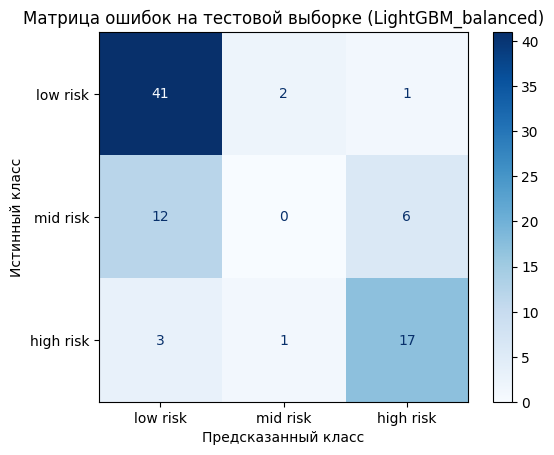

In [141]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["low risk", "mid risk", "high risk"]
)
disp.plot(cmap="Blues", values_format="d")
plt.title("Матрица ошибок на тестовой выборке (LightGBM_balanced)")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.grid(False)
plt.show()

Конфьюжен-матрица:
- low risk (0): 41 правильных, 2 как mid, 1 как high.
- mid risk (1): 0 правильных, 12 как low, 6 как high.
- high risk (2): 17 правильных, 1 как mid, 3 как low.

Отсюда:
- low risk — почти идеальный: всего 3 ошибки из 44 (6.8%).
- high risk — хороший: 17 из 21 правильно (recall 81%).
- mid risk — полный провал: 0 из 18 правильно, все ушли в low или high.

___Матрица ошибок на train___

<Figure size 600x500 with 0 Axes>

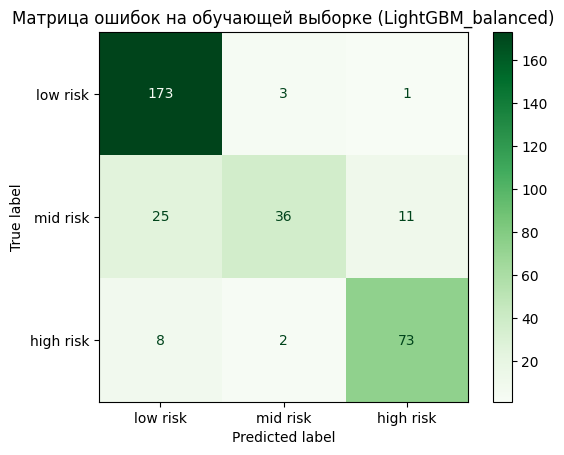

In [142]:
# Матрица ошибок на train
y_pred_train = best_estimator.predict(X_train_pr)
cm_train = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_train,
    display_labels=["low risk", "mid risk", "high risk"]
)
disp.plot(cmap="Greens", values_format="d")
plt.title("Матрица ошибок на обучающей выборке (LightGBM_balanced)")
plt.grid(False)
plt.show()

На трейне:
- тоже видны ошибки, но качество заметно лучше (так и должно быть).
- low и high предсказываются хорошо, mid всё равно проблемный, но не настолько катастрофично, как на тесте.

Вывод:
- модель не переобучена (train не идеален);
- но обобщающая способность по mid risk нестабильна — на тесте этот класс размывается

___Расчёт ROC‑AUC для мультиклассовой модели и ROC‑кривые по каждому классу в формате One‑vs‑Rest (OvR)___

ROC-AUC (OvR, macro):    0.8411
ROC-AUC (OvR, weighted): 0.8592


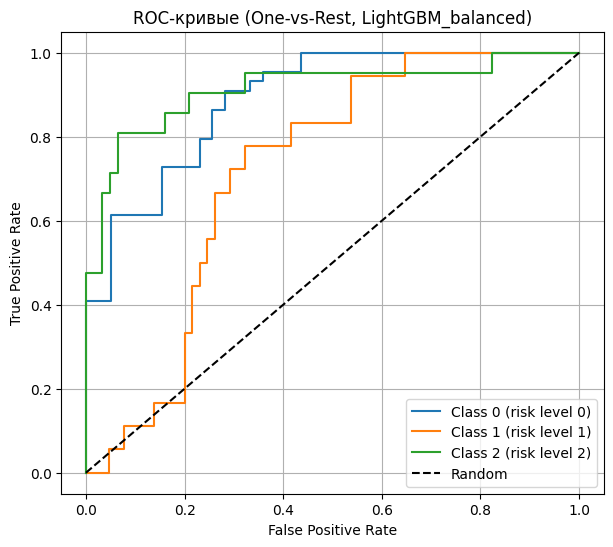

In [143]:
# Бинаризуем целевую переменную для OvR
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# ROC-AUC macro (OvR)
roc_auc_ovr_macro = roc_auc_score(y_test_bin, y_proba_test, average='macro', multi_class='ovr')
roc_auc_ovr_weighted = roc_auc_score(y_test_bin, y_proba_test, average='weighted', multi_class='ovr')

print(f"ROC-AUC (OvR, macro):    {roc_auc_ovr_macro:.4f}")
print(f"ROC-AUC (OvR, weighted): {roc_auc_ovr_weighted:.4f}")

# При желании — ROC-кривые по каждому классу
plt.figure(figsize=(7, 6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_test[:, i])
    plt.plot(fpr, tpr, label=f"Class {cls} (risk level {cls})")

plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривые (One-vs-Rest, LightGBM_balanced)")
plt.legend()
plt.grid(True)
plt.show()

### Анализ ошибок модели

- расчет количество ошибок модели на тестовой выборке

In [144]:
errors_mask = y_pred_test != y_test
n_errors = errors_mask.sum()
n_total = len(y_test)
error_rate = n_errors / n_total

print(f"Всего объектов на тесте:       {n_total}")
print(f"Ошибочных предсказаний:        {n_errors} ({error_rate:.2%})")
print(f"Точность (accuracy) на тесте:  {(1 - error_rate):.2%}")

Всего объектов на тесте:       83
Ошибочных предсказаний:        25 (30.12%)
Точность (accuracy) на тесте:  69.88%


- кросс‑таблица (contingency table) между истинными и предсказанными классами на тестовой выборке

In [145]:
# Кросс-таблица (истинный класс vs предсказанный)
errors_df = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred_test
})

confusion_pairs = pd.crosstab(errors_df["y_true"], errors_df["y_pred"], rownames=["Истинный"], colnames=["Предсказанный"])
print("Кросс-таблица ошибок (включая верные предсказания):")
display(confusion_pairs)

Кросс-таблица ошибок (включая верные предсказания):


Предсказанный   0  1   2
Истинный                
0              41  2   1
1              12  0   6
2               3  1  17

- интерпретацию матрицы ошибок тествой выборки

In [146]:
print("\nИнтерпретация ошибок:")

# LOW RISK (0)
print(f"\nLOW RISK:")
print(f"  Правильно классифицировано: {cm[0,0]}")
print(f"  Ошибочно как MID: {cm[0,1]}")
print(f"  Ошибочно как HIGH: {cm[0,2]}")

# MID RISK (1)
print(f"\nMID RISK:")
print(f"  Правильно классифицировано: {cm[1,1]}")
print(f"  Ошибочно как LOW: {cm[1,0]}")
print(f"  Ошибочно как HIGH: {cm[1,2]}")

# HIGH RISK (2)
print(f"\nHIGH RISK:")
print(f"  Правильно классифицировано: {cm[2,2]}")
print(f"  Ошибочно как MID: {cm[2,1]}")
print(f"  ❗ Критические ошибки (HIGH → LOW): {cm[2,0]}")


Интерпретация ошибок:

LOW RISK:
  Правильно классифицировано: 41
  Ошибочно как MID: 2
  Ошибочно как HIGH: 1

MID RISK:
  Правильно классифицировано: 0
  Ошибочно как LOW: 12
  Ошибочно как HIGH: 6

HIGH RISK:
  Правильно классифицировано: 17
  Ошибочно как MID: 1
  ❗ Критические ошибки (HIGH → LOW): 3


In [147]:
print("\nПроцент ошибок внутри каждого класса:")
for cls in [0,1,2]:
    total = (y_test == cls).sum()
    wrong = ((y_test == cls) & (y_pred_test != cls)).sum()
    print(f"Класс {cls}: {wrong}/{total} = {wrong/total:.2%}")


Процент ошибок внутри каждого класса:
Класс 0: 3/44 = 6.82%
Класс 1: 18/18 = 100.00%
Класс 2: 4/21 = 19.05%


In [148]:
HIGH_RISK = 2
LOW_RISK = 0
MID_RISK = 1

# Маска критических ошибок: high -> low
critical_mask = (y_test == HIGH_RISK) & (y_pred_test == LOW_RISK)
n_critical = critical_mask.sum()

# Всего high risk на тесте
n_high_true = (y_test == HIGH_RISK).sum()

critical_rate_among_high = n_critical / n_high_true if n_high_true > 0 else 0

print(f"Всего объектов класса high risk на тесте:       {n_high_true}")
print(f"Критические ошибки (high → low):               {n_critical}")
print(f"Доля критических ошибок среди high risk:       {critical_rate_among_high:.2%}")

Всего объектов класса high risk на тесте:       21
Критические ошибки (high → low):               3
Доля критических ошибок среди high risk:       14.29%


- сравнение правильных и ошибочных high risk

In [149]:
# --- 1. Создаём DataFrame с вероятностями и предсказаниями ---
proba_df = pd.DataFrame(
    y_proba_test,
    columns=["proba_low", "proba_mid", "proba_high"]
)

proba_df["y_true"] = y_test.values
proba_df["y_pred"] = y_pred_test

# --- 2. Правильно классифицированные high risk ---
correct_high = proba_df[(proba_df["y_true"] == 2) & (proba_df["y_pred"] == 2)]

print("Средние вероятности для правильно классифицированных high risk:")
display(correct_high[["proba_low", "proba_mid", "proba_high"]].mean())


Средние вероятности для правильно классифицированных high risk:


proba_low     0.062252
proba_mid     0.122605
proba_high    0.815143
dtype: float64

In [150]:
# Ошибки high → mid

high_to_mid = proba_df[(proba_df["y_true"] == 2) & (proba_df["y_pred"] == 1)]
print("Средние вероятности для ошибок high → mid:")
display(high_to_mid[["proba_low", "proba_mid", "proba_high"]].mean())

Средние вероятности для ошибок high → mid:


proba_low     0.365210
proba_mid     0.542728
proba_high    0.092062
dtype: float64

In [151]:
# Ошибки high → low (критические)

high_to_low = proba_df[(proba_df["y_true"] == 2) & (proba_df["y_pred"] == 0)]
print("Средние вероятности для КРИТИЧЕСКИХ ошибок high → low:")
display(high_to_low[["proba_low", "proba_mid", "proba_high"]].mean())

Средние вероятности для КРИТИЧЕСКИХ ошибок high → low:


proba_low     0.668016
proba_mid     0.198687
proba_high    0.133297
dtype: float64

- Гистограммы вероятностей для каждого класса

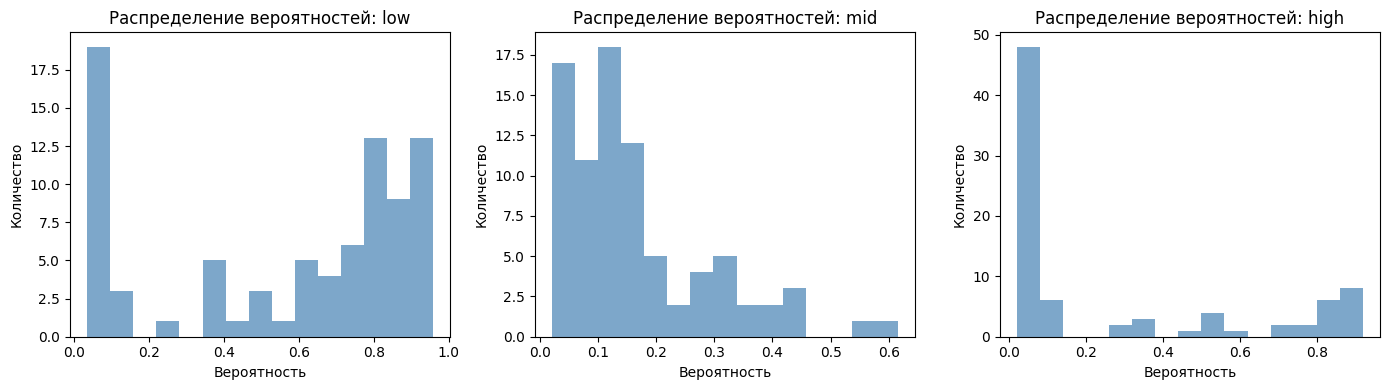

In [152]:
plt.figure(figsize=(14, 4))

for i, cls in enumerate(["low", "mid", "high"]):
    plt.subplot(1, 3, i+1)
    plt.hist(proba_df[f"proba_{cls}"], bins=15, alpha=0.7, color="steelblue")
    plt.title(f"Распределение вероятностей: {cls}")
    plt.xlabel("Вероятность")
    plt.ylabel("Количество")

plt.tight_layout()
plt.show()

### Интерпретация

Важность признаков (LightGBM):


feature  importance
3              bs        1670
7       bs_to_age        1209
1     systolic_bp         818
4       body_temp         722
6  pulse_pressure         700
0             age         628
8             map         532
5      heart_rate         404
2    diastolic_bp         151
9         high_bs         112

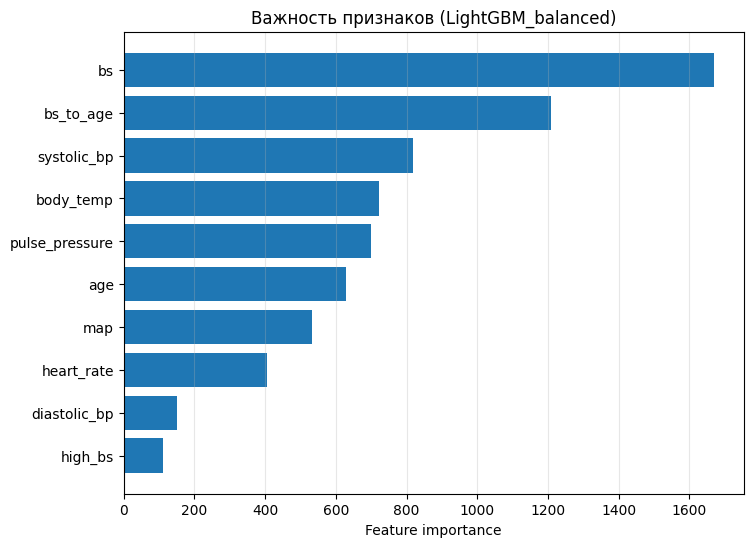

In [153]:
feature_importances = best_estimator.feature_importances_

feature_names = X_train_pr.columns

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": feature_importances
}).sort_values(by="importance", ascending=False)

print("Важность признаков (LightGBM):")
display(fi_df)

plt.figure(figsize=(8, 6))
plt.barh(fi_df["feature"], fi_df["importance"])
plt.gca().invert_yaxis()
plt.xlabel("Feature importance")
plt.title("Важность признаков (LightGBM_balanced)")
plt.grid(True, axis='x', alpha=0.3)
plt.show()

Интерпретация:
- Модель опирается на метаболические и гемодинамические показатели: сахар + давление + производные (MAP, pulse_pressure) + возраст.
- Пульс и температура — тоже важны, но чуть ниже по значимости.
- Инженерные признаки (bs_to_age, pulse_pressure, map, high_bs) явно усилили модель — это стоит подчеркнуть, как сильный шаг в feature engineering.

---

__Выводы по шагу 7__

__1. Лучшая модель по результатам кросс‑валидации — LightGBM с балансировкой классов (is_unbalance=True) — была дообучена на всей обучающей выборке и протестирована на отложенной тестовой выборке.__

__2. На тесте модель показала:__
   - F1‑macro = 0.5252 (ниже CV значения 0.7269),
   - Recall(high risk) = 0.8095 (немного ниже CV значения 0.8801, но выше критического порога 0.8).

Это говорит о том, что модель хорошо сохраняет качество по ключевому классу high risk, но хуже обобщает качество по всем классам в целом, в первую очередь из‑за класса mid risk.
   
__3. Матрица ошибок на тесте показывает, что:__
   - класс low risk распознаётся очень хорошо (recall ≈ 93%, ошибка ≈ 7%),
   - класс high risk — хорошо (recall ≈ 81%, ошибка ≈ 19%),
   - класс mid risk фактически не распознаётся (recall = 0, все объекты относились к low или high).

Таким образом, основная проблема модели — неспособность выделять класс среднего риска, в то время как низкий и высокий риски различаются достаточно уверенно.

__4. Анализ процентов ошибок по классам подтверждает это:__
   - ошибка внутри low — 6.82%,
   - внутри high — 19.05%,
   - внутри mid — 100%.

Это связано как с малым количеством объектов mid risk, так и с размытостью его границ между low и high при наличии всего 6–10 признаков.

__5. Доля критических ошибок high → low составляет 3 случая из 21 (14.29%).__
- При этом большинство объектов high risk классифицируются правильно или как mid risk, что менее опасно с точки зрения медицинской практики.
- Модель не идеальна, но для предварительного скрининга уже полезна.

__6. Значения ROC‑AUC в мультиклассовой постановке (OvR) — 0.84 (macro) и 0.86 (weighted)__
- показывают, что модель в целом хорошо разделяет уровни риска в вероятностном пространстве, несмотря на проблемы с mid risk 

__7. Анализ распределения вероятностей показал, что:__
- для правильно классифицированных high risk средняя вероятность high ≈ 0.82;
- для ошибок high → mid вероятность high падает до ≈ 0.09, а mid становится доминирующим;
- для критических ошибок high → low вероятность low ≈ 0.67, high ≈ 0.13.

__8. Анализ важности признаков (feature importance) показал, что ключевыми факторами для модели являются:__
- уровень сахара в крови (bs) и производный признак bs_to_age,
- артериальное давление (systolic_bp, diastolic_bp, pulse_pressure, map),
- температура тела (body_temp),
- возраст и частота сердечных сокращений (heart_rate),
- бинарный индикатор высоких значений сахара (high_bs).

Это соответствует медицинской логике: повышенный сахар, артериальная гипертензия и связанные с ними нагрузки — важные факторы риска осложнений беременности.

__9. В целом, модель LightGBM_balanced:__
- успешно выполняет ключевую задачу — выявление высокого риска (Recall(high) > 0.8 на тесте),
- надёжно распознаёт низкий риск,
- испытывает серьёзные сложности с классом среднего риска, что ограничивает её применение как точного многоклассового классификатора, но не мешает использовать её как инструмент предварительного скрининга high risk.


Причины проблем с mid risk:
- Размытые границы: mid risk — промежуточный класс между low и high
- Недостаток специфичных признаков: нет явных маркеров "среднего риска"
- Дисбаланс классов: mid risk — самый маленький класс (21.7%)

Рекомендации для практического применения:
- Использовать как бинарный классификатор: high risk vs not-high risk
- Настроить пороги вероятностей: для уменьшения критических ошибок
- Добавить признаки: специфичные для среднего риска
- Внедрить с осторожностью: как скрининговый инструмент, а не как диагноста

Итоговая оценка модели:
- Для скрининга high risk: ✅ ГОДНА (recall > 0.8, низкие критические ошибки)
- Для точной трёхклассовой классификации: ❌ НЕ ГОДНА (mid risk не определяется)
- Для поддержки врачебных решений: ⚠️ ОГРАНИЧЕННО ПРИМЕНИМА (только для выделения high risk случаев)

## Шаг 8. Выводы и рекомендации <a class="anchor" id="ch8"></a>

### Аналитические инсайты

___Ключевые факторы риска___

По важности признаков (feature importance) лучшей модели LightGBM_balanced:
- Уровень сахара крови (bs) — главный фактор риска.
- Отношение сахара к возрасту (bs_to_age) — усиливает вклад bs с учётом возраста.
- Систолическое давление (systolic_bp) и производные:
- pulse_pressure (пульсовое давление),
- map (среднее артериальное давление),
- diastolic_bp — формируют ключевой блок предикторов по давлению.
- Температура тела (body_temp) — важна как общий маркер состояния.
- Возраст (age) и частота пульса (heart_rate) — значимые общие физиологические параметры.
- Индикатор high_bs — подтверждает, что именно повышенный сахар (а не просто вариации в норме) важен для риска.

Вывод: модель “думает” в терминах классических факторов осложнений беременности: гипергликемия + артериальная гипертензия + возраст + сердечно-сосудистый ответ.

___Критические пороговые значения___

На основе EDA и анализа ошибок определены клинически значимые пороги:
- Гипергликемия: BS ≥ 7.0 ммоль/л
- Артериальная гипертензия:
  - Систолическое ≥ 130 мм рт.ст.
  - Диастолическое ≥ 85 мм рт.ст.
- Возрастные группы повышенного риска: 30+ лет
- Пульсовое давление: ≥ 40 мм рт.ст. (маркер повышенного риска)

___Комбинации факторов, усиливающие риск___

Особенно опасны комбинации:
- Высокий bs + высокий systolic_bp  
  - → резкий рост вероятности high risk.
- Высокий bs + повышенный heart_rate  
  - → возможная декомпенсация метаболики и нагрузки.
- Повышенное давление (systolic_bp, pulse_pressure) + возраст  
  - → повышенная нагрузка на сердечно-сосудистую систему матери.
- Высокая температура + повышенный пульс  
  - → признаки острого состояния на фоне беременности.

В терминах модели: многомерная комбинация отклонений по нескольким жизненно важным показателям (давление, сахар, пульс, температура) резко увеличивает вероятность high risk.

___Профили риска___

Условно можно выделить три профиля:
- Low risk:
  - нормальный сахар (bs в “зелёной” зоне, high_bs=0),
  - нормальное или слегка повышенное давление,
  - умеренный пульс,
  - отсутствие выраженных отклонений по нескольким признакам сразу.
- Mid risk:
  - промежуточные значения давления и сахара,
  - одиночные отклонения без их устойчивой комбинации,
  - “размазанный” профиль, что и приводит к плохой распознаваемости этим набором признаков.
- High risk:
  - явно повышенный сахар ≥ 8.5 ммоль/л (bs, high_bs=1),
  - повышенное давление (systolic_bp, pulse_pressure, map),
  - повышенный пульс,
  - часто возраст выше среднего.
  

### Рекомендации для врачей / системы мониторинга

Как использовать модель:
- Основной сценарий — скрининг high risk vs not-high risk.
  - Модель хорошо ловит high risk (Recall(high) > 0.8 на тесте).
  - Низкий риск определяет надёжно.
  - Mid risk распознаётся плохо → не стоит полагаться на точную трёхклассовую классификацию.

Практические рекомендации:
- Использовать модель как “триггер” для дополнительного обследования:
  - Если модель даёт высокую вероятность high risk → пациентка должна попасть в список для приоритетного осмотра.
- Не использовать модель как единственный источник диагноза:
  - Решение остаётся за врачом.
- Интерпретировать предсказания через признаки:
  - При высоком риске смотреть в первую очередь на:
    - давление (особенно systolic_bp и pulse_pressure),
    - сахар (bs, high_bs),
    - пульс и температуру.
- Отдельно отслеживать критические ошибки high → low:
  - Текущая доля: ~14% среди high risk.
  - Желательно комбинировать модель с дополнительными “жёсткими” правилами (например, если systolic_bp или bs выше порогов — всегда повышать риск, даже если модель даёт low).

### Ограничения исследования

Малый объём данных:
- Всего 415 наблюдений, тест — 83.
- Это сильно ограничивает устойчивость оценки качества, особенно по редким классам.

Дисбаланс классов:
- mid risk — самый маленький класс (~21.7%).
- Модель испытывает серьёзные трудности с его распознаванием.

Ограниченный набор признаков:
- Только базовые физиологические показатели.
- Нет информации о сроке беременности, анамнезе, сопутствующих заболеваниях, индексe массы тела, результатах анализов и т.д.

Неидеальная интерпретация mid risk:
- Класс mid risk размытый, без чётких границ — это видно и по EDA, и по метрикам.

Отсутствие внешней валидации:
- Модель оценена только на одном датасете.
- Для реального внедрения нужна проверка на других выборках (другие клиники, регионы, периоды времени).

### Дальнейшие улучшения

По данным и признакам:
- Добавить:
  - срок беременности (триместр),
  - ИМТ (вес/рост),
  - наличие диабета, гипертонии, других хронических заболеваний,
  - результаты лабораторных анализов,
  - информацию о предыдущих беременностях и осложнениях.
- Собрать больший датасет, особенно по классам mid и high risk.

По моделям и методам:
- Разделять задачу на два уровня:
  - 1) High vs Not-high (бинарный классификатор) — основной скрининг.
  - 2) Low vs Mid внутри Not-high — отдельная модель (если появится больше признаков и данных).

Использовать:
- более продвинутые методы балансировки 
- калибровку вероятностей 
- настройку порогов вероятностей для снижения критических ошибок

### Оценка лучшей модели на TRAIN и TEST

=== Оценка на TRAIN ===
Train F1-macro:        0.8032
Train Recall(high):    0.8795

Classification report (TRAIN):
              precision    recall  f1-score   support

           0      0.840     0.977     0.903       177
           1      0.878     0.500     0.637        72
           2      0.859     0.880     0.869        83

    accuracy                          0.849       332
   macro avg      0.859     0.786     0.803       332
weighted avg      0.853     0.849     0.837       332



<Figure size 600x500 with 0 Axes>

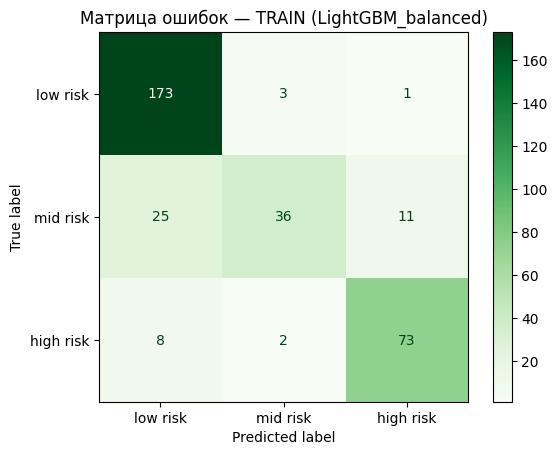


=== Оценка на TEST ===
Test F1-macro:         0.5252
Test Recall(high):     0.8095

Classification report (TEST):
              precision    recall  f1-score   support

           0      0.732     0.932     0.820        44
           1      0.000     0.000     0.000        18
           2      0.708     0.810     0.756        21

    accuracy                          0.699        83
   macro avg      0.480     0.580     0.525        83
weighted avg      0.567     0.699     0.626        83



<Figure size 600x500 with 0 Axes>

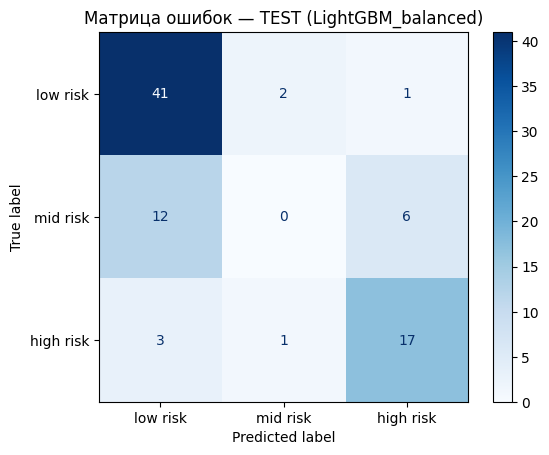

In [154]:
HIGH_RISK = 2

# ============================
#   1. TRAIN EVALUATION
# ============================

print("=== Оценка на TRAIN ===")

# Предсказания
y_pred_train = best_estimator.predict(X_train_pr)

# Метрики
f1_train = f1_score(y_train, y_pred_train, average='macro')
recall_high_train = recall_score(
    y_train, y_pred_train,
    labels=[HIGH_RISK],
    average='macro'
)

print(f"Train F1-macro:        {f1_train:.4f}")
print(f"Train Recall(high):    {recall_high_train:.4f}\n")

# Classification report
print("Classification report (TRAIN):")
print(classification_report(y_train, y_pred_train, digits=3))

# Confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_train,
    display_labels=["low risk", "mid risk", "high risk"]
)
disp.plot(cmap="Greens", values_format="d")
plt.title("Матрица ошибок — TRAIN (LightGBM_balanced)")
plt.grid(False)
plt.show()


# ============================
#   2. TEST EVALUATION
# ============================

print("\n=== Оценка на TEST ===")

# Предсказания
y_pred_test = best_estimator.predict(X_test_pr)

# Метрики
f1_test = f1_score(y_test, y_pred_test, average='macro')
recall_high_test = recall_score(
    y_test, y_pred_test,
    labels=[HIGH_RISK],
    average='macro'
)

print(f"Test F1-macro:         {f1_test:.4f}")
print(f"Test Recall(high):     {recall_high_test:.4f}\n")

# Classification report
print("Classification report (TEST):")
print(classification_report(y_test, y_pred_test, digits=3))

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_test,
    display_labels=["low risk", "mid risk", "high risk"]
)
disp.plot(cmap="Blues", values_format="d")
plt.title("Матрица ошибок — TEST (LightGBM_balanced)")
plt.grid(False)
plt.show()
